***

# Proyecto de innovación tecnológica en Inteligencia Artificial

***

### Proyecto RNN

#### Equipo:

1. Alvaro Acosta
2. Jhonatan Estrada
3. Cristian Gonzalez
4. Danny Martinez

In [2]:
# Importar las bibliotecas de Python requeridas.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
import math

#from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_1samp, shapiro, kstest, anderson, probplot # Test One-Sample 1, Test de Normalidad 2
from statsmodels.stats.stattools import durbin_watson # Test de Independencia 3 (autocorrelación Durbin-Watson)
from statsmodels.stats.diagnostic import het_breuschpagan # Test de Homocedasticidad 4 (varianza constante Test Breusch-Pagan)
from numpy.polynomial.polynomial import Polynomial # Para generar polinomios

In [3]:
# Suprimir warnings.
warnings.simplefilter('ignore')

### Carga del Dataset

In [4]:
# Crear el Data Frame.
df = pd.read_csv('100_Batches_IndPenSim_V3.csv')
#df = pd.read_csv('100_Batches_IndPenSim_Statistics.csv')

# Imprimir los primeros cinco registros del DataFrame.
print('Encabezado del DataFrame:\n')
df.head(5)

Encabezado del DataFrame:



Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
0       0.2                     30                    100   
1       0.4                     30                    100   
2       0.6                     30                    100   
3       0.8                     30                    100   
4       1.0                     30                    100   

   Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  Base flow rate(Fb:L/h)  \
0                        8                  0.0000                  30.118   
1                        8                  0.0000                  51.221   
2                        8                  0.0000                  54.302   
3                        8                  0.0000                  37.816   
4                        8                  0.5181                  18.908   

   Heating/cooling water flow rate(Fc:L/h)  Heating water flow rate(Fh:L/h)  \
0                                   9.8335                           0.0001   
1                                  18.1550                           0.0001   
2                                   9.5982                           0.0001   
3                                   4.3395                           0.0001   
4                                   1.1045                           0.0001   

   Water for injection/dilution(Fw:L/h)  Air head pressure(pressure:bar)  ...  \
0                                     0                              0.6  ...   
1                                     0                              0.6  ...   
2                                     0                              0.6  ...   
3                                     0                              0.6  ...   
4                                     0                              0.6  ...   

   210  209  208  207  206  205  204  203  202  201  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  

[5 rows x 2239 columns]

In [5]:
# Información de la estructura del df.
print('Estructura del DataFrame:\n')
df.shape

Estructura del DataFrame:



(113935, 2239)

Se visualiza la estructura del conjunto de datos, el cual consta de las variables predictoras $X$ (2238 variables) y la variable objetivo $Y$ (*Penicillin concentration(P:g/L)*), y contiene 113,935 registros.

Después de realizar un análisis detallado en conjunto con expertos en el área y del proceso, se definieron las siguientes variables que se consideran importantes y significativas en el proceso de producción de penicilina. Este análisis permitió identificar las variables más relevantes en función de su influencia directa en los resultados del proceso, así como su viabilidad para ser monitoreadas y controladas con sensores blandos. Las variables seleccionadas serán utilizadas como insumos principales inicialmente en el EDA y en el desarrollo de un modelo de Redes Neuronales Recurrentes (RNN) que buscará optimizar el rendimiento del proceso, las variables clave son:

- 'Time (h)',
- 'Temperature(T:K)',
- 'pH(pH:pH)',
- 'Dissolved oxygen concentration(DO2:mg/L)',
- 'Sugar feed rate(Fs:L/h)',
- 'Substrate concentration(S:g/L)',
- 'Oil flow(Foil:L/hr)',
- 'Ammonia shots(NH3_shots:kgs)',
- 'Oxygen in percent in off-gas(O2:O2  (%))',
- 'carbon dioxide percent in off-gas(CO2outgas:%)',
- 'Penicillin concentration(P:g/L)',
- ' 1-Raman spec recorded',
- '2-PAT control(PAT_ref:PAT ref)',

In [6]:
# Definir la lista de las columnas a seleccionar del dataset.
df_columns = [
    'Time (h)',
    'Temperature(T:K)',
    'pH(pH:pH)',
    'Dissolved oxygen concentration(DO2:mg/L)',
    'Sugar feed rate(Fs:L/h)',
    'Substrate concentration(S:g/L)',
    'Oil flow(Foil:L/hr)',
    'Ammonia shots(NH3_shots:kgs)',
    'Oxygen in percent in off-gas(O2:O2  (%))',
    'carbon dioxide percent in off-gas(CO2outgas:%)',
    'Penicillin concentration(P:g/L)',
    '2-PAT control(PAT_ref:PAT ref)'
]

df = df[df_columns]

In [7]:
# Verificar si existen datos vacíos o faltantes en el DataFrame.
print('Cantidad de datos vacíos o faltantes DataFrame:\n')
df.isna().sum()

Cantidad de datos vacíos o faltantes DataFrame:



Time (h)                                          0
Temperature(T:K)                                  0
pH(pH:pH)                                         0
Dissolved oxygen concentration(DO2:mg/L)          0
Sugar feed rate(Fs:L/h)                           0
Substrate concentration(S:g/L)                    0
Oil flow(Foil:L/hr)                               0
Ammonia shots(NH3_shots:kgs)                      0
Oxygen in percent in off-gas(O2:O2  (%))          0
carbon dioxide percent in off-gas(CO2outgas:%)    0
Penicillin concentration(P:g/L)                   0
2-PAT control(PAT_ref:PAT ref)                    0
dtype: int64

In [133]:
# Verificar si las columnas tienen valores únicos.
print(df.nunique())

Time (h)                                           1450
Temperature(T:K)                                    393
pH(pH:pH)                                          3990
Dissolved oxygen concentration(DO2:mg/L)          11087
Sugar feed rate(Fs:L/h)                              25
Substrate concentration(S:g/L)                    64531
Oil flow(Foil:L/hr)                                   9
Ammonia shots(NH3_shots:kgs)                          1
Oxygen in percent in off-gas(O2:O2  (%))           3095
carbon dioxide percent in off-gas(CO2outgas:%)    28416
Penicillin concentration(P:g/L)                   56258
2-PAT control(PAT_ref:PAT ref)                      100
dtype: int64


In [134]:
# Visualización del data frame con variables definidas
df

Time (h)  Temperature(T:K)  pH(pH:pH)  \
0            0.2            298.22     6.4472   
1            0.4            298.17     6.4932   
2            0.6            298.14     6.5425   
3            0.8            298.11     6.5753   
4            1.0            298.09     6.5825   
...          ...               ...        ...   
113930     229.2            297.89     6.5085   
113931     229.4            298.07     6.5080   
113932     229.6            297.98     6.5040   
113933     229.8            297.88     6.4987   
113934     230.0            297.98     6.4948   

        Dissolved oxygen concentration(DO2:mg/L)  Sugar feed rate(Fs:L/h)  \
0                                         14.711                        8   
1                                         14.699                        8   
2                                         14.686                        8   
3                                         14.661                        8   
4                                         14.633                        8   
...                                          ...                      ...   
113930                                    13.385                       80   
113931                                    13.388                       80   
113932                                    13.390                       80   
113933                                    13.390                       80   
113934                                    13.407                       80   

        Substrate concentration(S:g/L)  Oil flow(Foil:L/hr)  \
0                              0.95749                   22   
1                              1.00460                   22   
2                              1.04980                   22   
3                              1.09420                   22   
4                              1.13700                   22   
...                                ...                  ...   
113930                        72.70800                   23   
113931                        72.77400                   23   
113932                        72.84200                   23   
113933                        72.91000                   23   
113934                        72.97900                   23   

        Ammonia shots(NH3_shots:kgs)  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   
...                              ...   
113930                             0   
113931                             0   
113932                             0   
113933                             0   
113934                             0   

        Oxygen in percent in off-gas(O2:O2  (%))  \
0                                        0.19595   
1                                        0.20390   
2                                        0.20575   
3                                        0.20602   
4                                        0.20589   
...                                          ...   
113930                                   0.19996   
113931                                   0.20002   
113932                                   0.20006   
113933                                   0.20006   
113934                                   0.20015   

        carbon dioxide percent in off-gas(CO2outgas:%)  \
0                                             0.089514   
1                                             0.101760   
2                                             0.105800   
3                                             0.108190   
4                                             0.110300   
...                                                ...   
113930                                        1.204400   
113931                                        1.204100   
113932                                        1.203800   
113933                                        1.203

Al construir un modelo de redes neuronales recurrentes (RNN), el resultado de nunique() permite identificar qué variables aportan variabilidad suficiente para el entrenamiento del modelo. A partir de los resultados obtenidos, se puede interpretar lo siguiente.

1. Columnas con un único valor (como *Agitator RPM(RPM:RPM)*, *Ammonia shots(NH3_shots:kgs)*) no ofrecen ninguna variabilidad temporal y deberían ser eliminadas, ya que no contribuyen a la predicción.

2. Columnas con baja variabilidad (como *Air head pressure(pressure:bar)* con solo 6 valores únicos) pueden no ser relevantes para el modelo, ya que las RNN dependen de datos con una variabilidad más rica para capturar patrones temporales significativos.

3. Columnas con alta variabilidad (como *Aeration rate(Fg:L/h)*, *Sugar feed rate(Fs:L/h)*) son más valiosas para entrenar la RNN, ya que proporcionan datos diversos que pueden ayudar a modelar relaciones temporales y dinámicas complejas.

En resumen, para construir un modelo robusto de RNN, se deben priorizar las columnas con alta variabilidad y excluir aquellas con valores constantes o baja variabilidad.//

In [135]:
# Obtener los estadísticos descriptivos del DataFrame.
print('Estadísticos descriptivos del DataFrame:\n')
df.describe()

Estadísticos descriptivos del DataFrame:



Time (h)  Temperature(T:K)      pH(pH:pH)  \
count  113935.000000     113935.000000  113935.000000   
mean      114.750656        298.026489       6.496565   
std        66.990504          0.197513       0.065676   
min         0.200000        296.840000       5.395700   
25%        57.000000        297.950000       6.493200   
50%       114.000000        297.990000       6.500900   
75%       171.000000        298.040000       6.508600   
max       290.000000        302.180000       6.766400   

       Dissolved oxygen concentration(DO2:mg/L)  Sugar feed rate(Fs:L/h)  \
count                             113935.000000            113935.000000   
mean                                  12.569647                76.663764   
std                                    1.498680                25.680134   
min                                    1.000000                 2.000000   
25%                                   11.639000                72.000000   
50%                                   12.636000                80.000000   
75%                                   13.614000                90.000000   
max                                   16.508000               150.000000   

       Substrate concentration(S:g/L)  Oil flow(Foil:L/hr)  \
count                   113935.000000        113935.000000   
mean                         4.079817            26.352789   
std                         13.303517             4.954933   
min                          0.000006            22.000000   
25%                          0.001025            23.000000   
50%                          0.001644            23.000000   
75%                          0.003003            30.000000   
max                        115.270000            35.000000   

       Ammonia shots(NH3_shots:kgs)  Oxygen in percent in off-gas(O2:O2  (%))  \
count                      113935.0                             113935.000000   
mean                            0.0                                  0.191458   
std                             0.0                                  0.004718   
min                             0.0                                  0.129500   
25%                             0.0                                  0.188860   
50%                             0.0                                  0.191180   
75%                             0.0                                  0.193660   
max                             0.0                                  0.227510   

       carbon dioxide percent in off-gas(CO2outgas:%)  \
count                                   113935.000000   
mean                                         1.444042   
std                                          0.498955   
min                                          0.075425   
25%                                          1.225900   
50%                                          1.596300   
75%                                          1.757300   
max                                          7.121400   

       Penicillin concentration(P:g/L)  2-PAT control(PAT_ref:PAT ref)  
count                     1.139350e+05                   113935.000000  
mean                      1.433395e+01                       50.402466  
std                       9.932453e+00                       28.862140  
min                       3.694700e-26                        1.000000  
25%                       5.531250e+00                       26.000000  
50%                       1.438000e+01                       50.000000  
75%                       2.268750e+01                       76.000000  
max                       3.618300e+01                      100.000000

El análisis descriptivo de los datos revela una gran variabilidad en varios de los parámetros de operación, lo que es crucial para la construcción de modelos predictivos, como una red neuronal recurrente. En primer lugar, se observa que el tiempo de proceso (*Time (h)*) varía significativamente entre 0.2 y 290 horas, indicando que el sistema ha operado durante períodos muy largos, lo que podría reflejar la complejidad y duración de los procesos involucrados.

En cuanto a las tasas de flujo, la tasa de aeración (*Aeration rate(Fg:L/h)*) tiene un valor promedio de 65.25 L/h, lo que sugiere una aeración constante durante las operaciones. Por otro lado, la velocidad de agitación (*Agitator RPM(RPM:RPM)*) es uniforme a 100 RPM, lo que indica que este parámetro se mantiene constante a lo largo del proceso. Sin embargo, los flujos de ácido (*Acid flow rate(Fa:L/h)*) y base (*Base flow rate(Fb:L/h)*) muestran un comportamiento distinto: el flujo de ácido es generalmente bajo o nulo en la mayoría de los registros, mientras que el flujo de base presenta una mayor variabilidad, con valores que alcanzan hasta 225 L/h. Esto sugiere que los flujos de base pueden ser más sensibles a las condiciones operativas y, por lo tanto, más relevantes para el modelo.

En cuanto a las concentraciones de los componentes críticos, la concentración de oxígeno disuelto (*Dissolved oxygen concentration(DO2:mg/L)*) muestra una amplia dispersión, con valores que varían desde niveles muy bajos hasta 16.51 mg/L. Esta variabilidad en la concentración de oxígeno puede ser crucial, ya que es un parámetro clave en procesos biológicos como la fermentación. La concentración de penicilina (*Penicillin concentration(P:g/L)*), que es la variable objetivo, tiene una media de 14.33 g/L con una desviación estándar considerable de 9.93, lo que indica fluctuaciones importantes en su producción.

En cuanto a la generación de calor (*Generated heat(Q:kJ)*), los valores promedio son relativamente altos (279.07 kJ), con una notable dispersión. Esto podría estar relacionado con los cambios en la actividad metabólica o las reacciones de producción, sugiriendo que el calor generado podría ser un factor influyente en el proceso. Asimismo, el porcentaje de dióxido de carbono en los gases de escape (*carbon dioxide percent in off-gas(CO2outgas:%)*) también muestra variabilidad, con un promedio de 1.44%, lo que sugiere fluctuaciones en la tasa de respiración o fermentación.

Finalmente, el análisis revela que ciertos parámetros presentan valores faltantes en un número significativo de registros, especialmente en variables como la viscosidad (*Viscosity(Viscosity_offline:centPoise)*) y la concentración de NH3 (*NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))*). Estos valores ausentes podrían requerir técnicas de imputación o estrategias específicas de tratamiento de datos para evitar que interfieran en la construcción del modelo. Además, algunas variables, como la velocidad de agitación (*Agitator RPM(RPM:RPM)*), son constantes, lo que puede indicar que no tienen un impacto directo en las predicciones del modelo, a menos que se incluyan para representar la estabilidad del proceso.

En resumen, el análisis indica que el modelo debe enfocarse en las variables con mayor variabilidad, como los flujos de base, la concentración de oxígeno y la producción de penicilina, mientras maneja adecuadamente las columnas con valores faltantes. Además, se debe considerar la posible eliminación de variables constantes si no aportan valor predictivo al modelo.

In [137]:
# Calcular la varianza de las variables del DataFrame.
print('Varianza de las variables del DataFrame:\n')
df.var()

Varianza de las variables del DataFrame:



Time (h)                                          4487.727665
Temperature(T:K)                                     0.039011
pH(pH:pH)                                            0.004313
Dissolved oxygen concentration(DO2:mg/L)             2.246041
Sugar feed rate(Fs:L/h)                            659.469273
Substrate concentration(S:g/L)                     176.983554
Oil flow(Foil:L/hr)                                 24.551360
Ammonia shots(NH3_shots:kgs)                         0.000000
Oxygen in percent in off-gas(O2:O2  (%))             0.000022
carbon dioxide percent in off-gas(CO2outgas:%)       0.248956
Penicillin concentration(P:g/L)                     98.653628
2-PAT control(PAT_ref:PAT ref)                     833.023153
dtype: float64

In [138]:
# Calcular la covarianza del DataFrame.
print('Covarianza de las variables del DataFrame:\n')
df.cov()

Covarianza de las variables del DataFrame:



Time (h)  Temperature(T:K)  \
Time (h)                                        4487.727665         -3.396324   
Temperature(T:K)                                  -3.396324          0.039011   
pH(pH:pH)                                          0.204929         -0.000139   
Dissolved oxygen concentration(DO2:mg/L)         -20.636336          0.011856   
Sugar feed rate(Fs:L/h)                          756.918162         -0.479713   
Substrate concentration(S:g/L)                   345.221175         -0.036471   
Oil flow(Foil:L/hr)                             -245.269635          0.244537   
Ammonia shots(NH3_shots:kgs)                       0.000000          0.000000   
Oxygen in percent in off-gas(O2:O2  (%))           0.041127         -0.000064   
carbon dioxide percent in off-gas(CO2outgas:%)    16.391330         -0.018206   
Penicillin concentration(P:g/L)                  578.998008         -0.548260   
2-PAT control(PAT_ref:PAT ref)                   -19.625953          0.328824   

                                                pH(pH:pH)  \
Time (h)                                         0.204929   
Temperature(T:K)                                -0.000139   
pH(pH:pH)                                        0.004313   
Dissolved oxygen concentration(DO2:mg/L)         0.000588   
Sugar feed rate(Fs:L/h)                         -0.151637   
Substrate concentration(S:g/L)                   0.072751   
Oil flow(Foil:L/hr)                             -0.012718   
Ammonia shots(NH3_shots:kgs)                     0.000000   
Oxygen in percent in off-gas(O2:O2  (%))         0.000030   
carbon dioxide percent in off-gas(CO2outgas:%)  -0.000385   
Penicillin concentration(P:g/L)                  0.002416   
2-PAT control(PAT_ref:PAT ref)                  -0.055265   

                                                Dissolved oxygen concentration(DO2:mg/L)  \
Time (h)                                                                      -20.636336   
Temperature(T:K)                                                                0.011856   
pH(pH:pH)                                                                       0.000588   
Dissolved oxygen concentration(DO2:mg/L)                                        2.246041   
Sugar feed rate(Fs:L/h)                                                        -7.889492   
Substrate concentration(S:g/L)                                                  3.717057   
Oil flow(Foil:L/hr)                                                             0.517781   
Ammonia shots(NH3_shots:kgs)                                                    0.000000   
Oxygen in percent in off-gas(O2:O2  (%))                                        0.001642   
carbon dioxide percent in off-gas(CO2outgas:%)                                 -0.057654   
Penicillin concentration(P:g/L)                                                -4.905804   
2-PAT control(PAT_ref:PAT ref)                                                  4.180512   

                                                Sugar feed rate(Fs:L/h)  \
Time (h)                                                     756.918162   
Temperature(T:K)                                              -0.479713   
pH(pH:pH)                                                     -0.151637   
Dissolved oxygen concentration(DO2:mg/L)                      -7.889492   
Sugar feed rate(Fs:L/h)                                      659.469273   
Substrate concentration(S:g/L)                                14.170370   
Oil flow(Foil:L/hr)                                          -46.685239   
Ammonia shots(NH3_shots:kgs)                                   0.000000   
Oxygen in percent in off-gas(O2:O2  (%))                      -0.064042   
carbon dioxide percent in off-gas(CO2outgas:%)                 8.137779   
Penicillin concentration(P:g/L)                              119.815222   
2-PAT control(PAT_ref:PAT ref)                               -25.702827   

                              

In [ ]:
# Exportar tabla de covarianza
df.cov().to_excel("tabla_covarianza.xlsx", index=True)
print("Tabla exportada")

Tabla exportada


**Análisis de Covarianzas entre Variables Operativas del Proceso Industrial**

Covarianza positiva:

El análisis de la matriz de covarianzas revela las relaciones entre las variables importantes del proceso. La covarianza entre Time (h) y Aeration rate (Fg:L/h) es de 528,14, indicando una relación positiva entre el tiempo de operación y la tasa de aireación

la correlación de Aeration rate (Fg:L/h) con Sugar feed rate (Fs:L/h) (182,46) implica una interacción positiva, lo que podría reflejar la necesidad de mayor aireación para procesar altos niveles de alimentación de azúcar.

la covarianza entre Heating/cooling water flow rate (Fc:L/h) y Base flow rate (Fb:L/h) es 1015,70, lo que indica una relación positiva, Esto sugiere que a medida que aumenta el flujo de agua de calentamiento/refrigeración, también tiende a incrementarse el flujo de base, posiblemente debido a una interacción directa en la regulación térmica del proceso.

Por último, la covarianza entre Water for injection/dilution (Fw:L/h) y Heating water flow rate (Fh:L/h) es 521,35, lo que indica una relación positiva, 


Covarianza negativa:

la covarianza entre Time (h) y Base flow rate (Fb:L/h) es negativa con un valor de -814,34, lo que sugiere que el aumento del tiempo está asociado con una reducción en la tasa de flujo de base

La relación entre Heating/cooling water flow rate (Fc:L/h) y Time (h) es negativa (-3016,97), lo cual puede deberse a efectos contrapuestos en la dinámica térmica del sistema,


**Análisis de Covarianzas entre Variables Operativas del Proceso Industrial**

**Covarianzas positivas:**

*Time (h) y Aeration rate (Fg:L/h): 528,14*

Interpretación: Existe una relación positiva entre el tiempo de operación y la tasa de aireación. Esto sugiere que a medida que aumenta el tiempo de operación en el proceso, también aumenta la cantidad de aire proporcionado (tasa de aireación). Esto puede indicar que, a lo largo del tiempo, es necesario incrementar la aireación para mantener las condiciones óptimas de operación. Esta relación podría estar asociada con un proceso biológico o químico que requiere un suministro continuo de aire para asegurar una eficiencia adecuada durante un largo período de tiempo.

*Aeration rate (Fg:L/h) y Sugar feed rate (Fs:L/h): 182,46*

Interpretación: La relación positiva entre la tasa de aireación y la tasa de alimentación de azúcar sugiere que a medida que aumenta la cantidad de aire inyectado, también se incrementa la cantidad de azúcar alimentada al proceso. Esto puede ocurrir en procesos donde se requiere una mayor aireación para mantener o aumentar la actividad microbiana o de otro tipo que consume el azúcar. Esto es común en procesos de fermentación o biotecnología, donde el oxígeno y el azúcar son consumidos por los organismos para producir productos deseados, como alcohol o ácidos.

*Heating/cooling water flow rate (Fc:L/h) y Base flow rate (Fb:L/h): 1015,70*

Interpretación: Esta relación positiva indica que tanto el flujo de agua para calefacción/refrigeración como el flujo base aumentan juntos. Esto sugiere que un mayor flujo de agua destinado a regular la temperatura está asociado con un aumento en el flujo base del sistema. En términos prácticos, puede implicar que cuando se requiere ajustar la temperatura (ya sea aumentando o disminuyendo la cantidad de agua de calefacción/refrigeración), también se necesita ajustar el flujo base para mantener el equilibrio térmico o de presión en el sistema.

*Water for injection/dilution (Fw:L/h) y Heating water flow rate (Fh:L/h): 521,35*

Interpretación: Existe una relación positiva entre el flujo de agua para inyección/dilución y el flujo de agua de calefacción. Esto sugiere que cuando se incrementa la cantidad de agua utilizada para diluir o inyectar en el proceso, también se incrementa el agua utilizada para regulación térmica. Es posible que en un proceso de fabricación o tratamiento, se requiera un mayor flujo de agua tanto para diluir sustancias o para inyectar productos, mientras se mantiene constante la necesidad de regulación térmica para asegurar las condiciones ideales del proceso.

**Covarianzas negativas:**

*Time (h) y Base flow rate (Fb:L/h): -814,34*

Interpretación: La interpretación parece válida. Una relación negativa entre el tiempo de operación y el flujo base sugiere que, a medida que avanza el proceso, el flujo base disminuye. Esto podría ser parte de una estrategia de optimización o ajuste según las demandas operativas. Sin embargo, esta interpretación podría aclararse más si se tiene información sobre el tipo de proceso, por ejemplo, si el flujo base se ajusta para evitar el desperdicio de recursos a medida que el proceso avanza.

*Heating/cooling water flow rate (Fc:L/h) y Time (h): -3016,97*

Interpretación: Esta fuerte relación negativa sugiere que a medida que aumenta el tiempo de operación, disminuye el flujo de agua de calefacción/refrigeración. Esto podría ser indicativo de un proceso en el que, a lo largo del tiempo, la necesidad de ajustar la temperatura (a través de la calefacción o refrigeración) disminuye, tal vez porque el sistema ya ha alcanzado una temperatura estable o debido a una reducción en las variaciones térmicas durante la operación. Es posible que el proceso se estabilice con el tiempo, requiriendo menos ajustes térmicos conforme avanza la operación.

la falta de variación en Agitator RPM y Ammonia shots sugiere que ambos parámetros han sido establecidos y optimizados para el proceso, y se mantiene una operación constante sin la necesidad de realizar ajustes adicionales. Esto refleja un sistema estable y controlado que está funcionando de manera eficiente y no requiere intervención para ajustar estos dos parámetros a lo largo del tiempo.

**Análisis Univariado**

Para realizar un análisis de outliers mediante boxplots, es esencial identificar las variables con mayor variabilidad, ya que estas suelen ser más propensas a contener valores atípicos o comportamientos extremos que podrían influir significativamente en los resultados. En este caso, las variables seleccionadas presentan las mayores varianzas en la matriz de covarianza, lo que refleja una alta dispersión en sus datos. Este enfoque permite enfocarse en aquellas métricas con mayor relevancia para el proceso estudiado, como el peso y volumen del reactor (*Vessel Weight (Wt:Kg)* y *Vessel Volume (V:L)*), concentraciones químicas críticas (*PAA concentration offline (PAA_offline: PAA (g L⁻¹)*) y *NH₃ concentration offline (NH₃_offline: NH₃ (g L⁻¹)*), y factores operativos clave como los flujos de inyección de agua (*Water for injection/dilution (Fw:L/h)*), flujo de caldo descartado (*Dumped broth flow (Fremoved:L/h)*), y generación de calor (*Generated heat (Q:kJ)*). Además, se incluye el análisis de variables relacionadas con los flujos de calentamiento/enfriamiento del agua (*Heating/cooling water flow rate (Fc:L/h)*) y dimensiones de identificación y temporales como *Batch ID* y *Time (h)*. Analizar estas variables con boxplots permite detectar valores anómalos que podrían representar oportunidades de optimización o posibles puntos de mejora en el proceso.

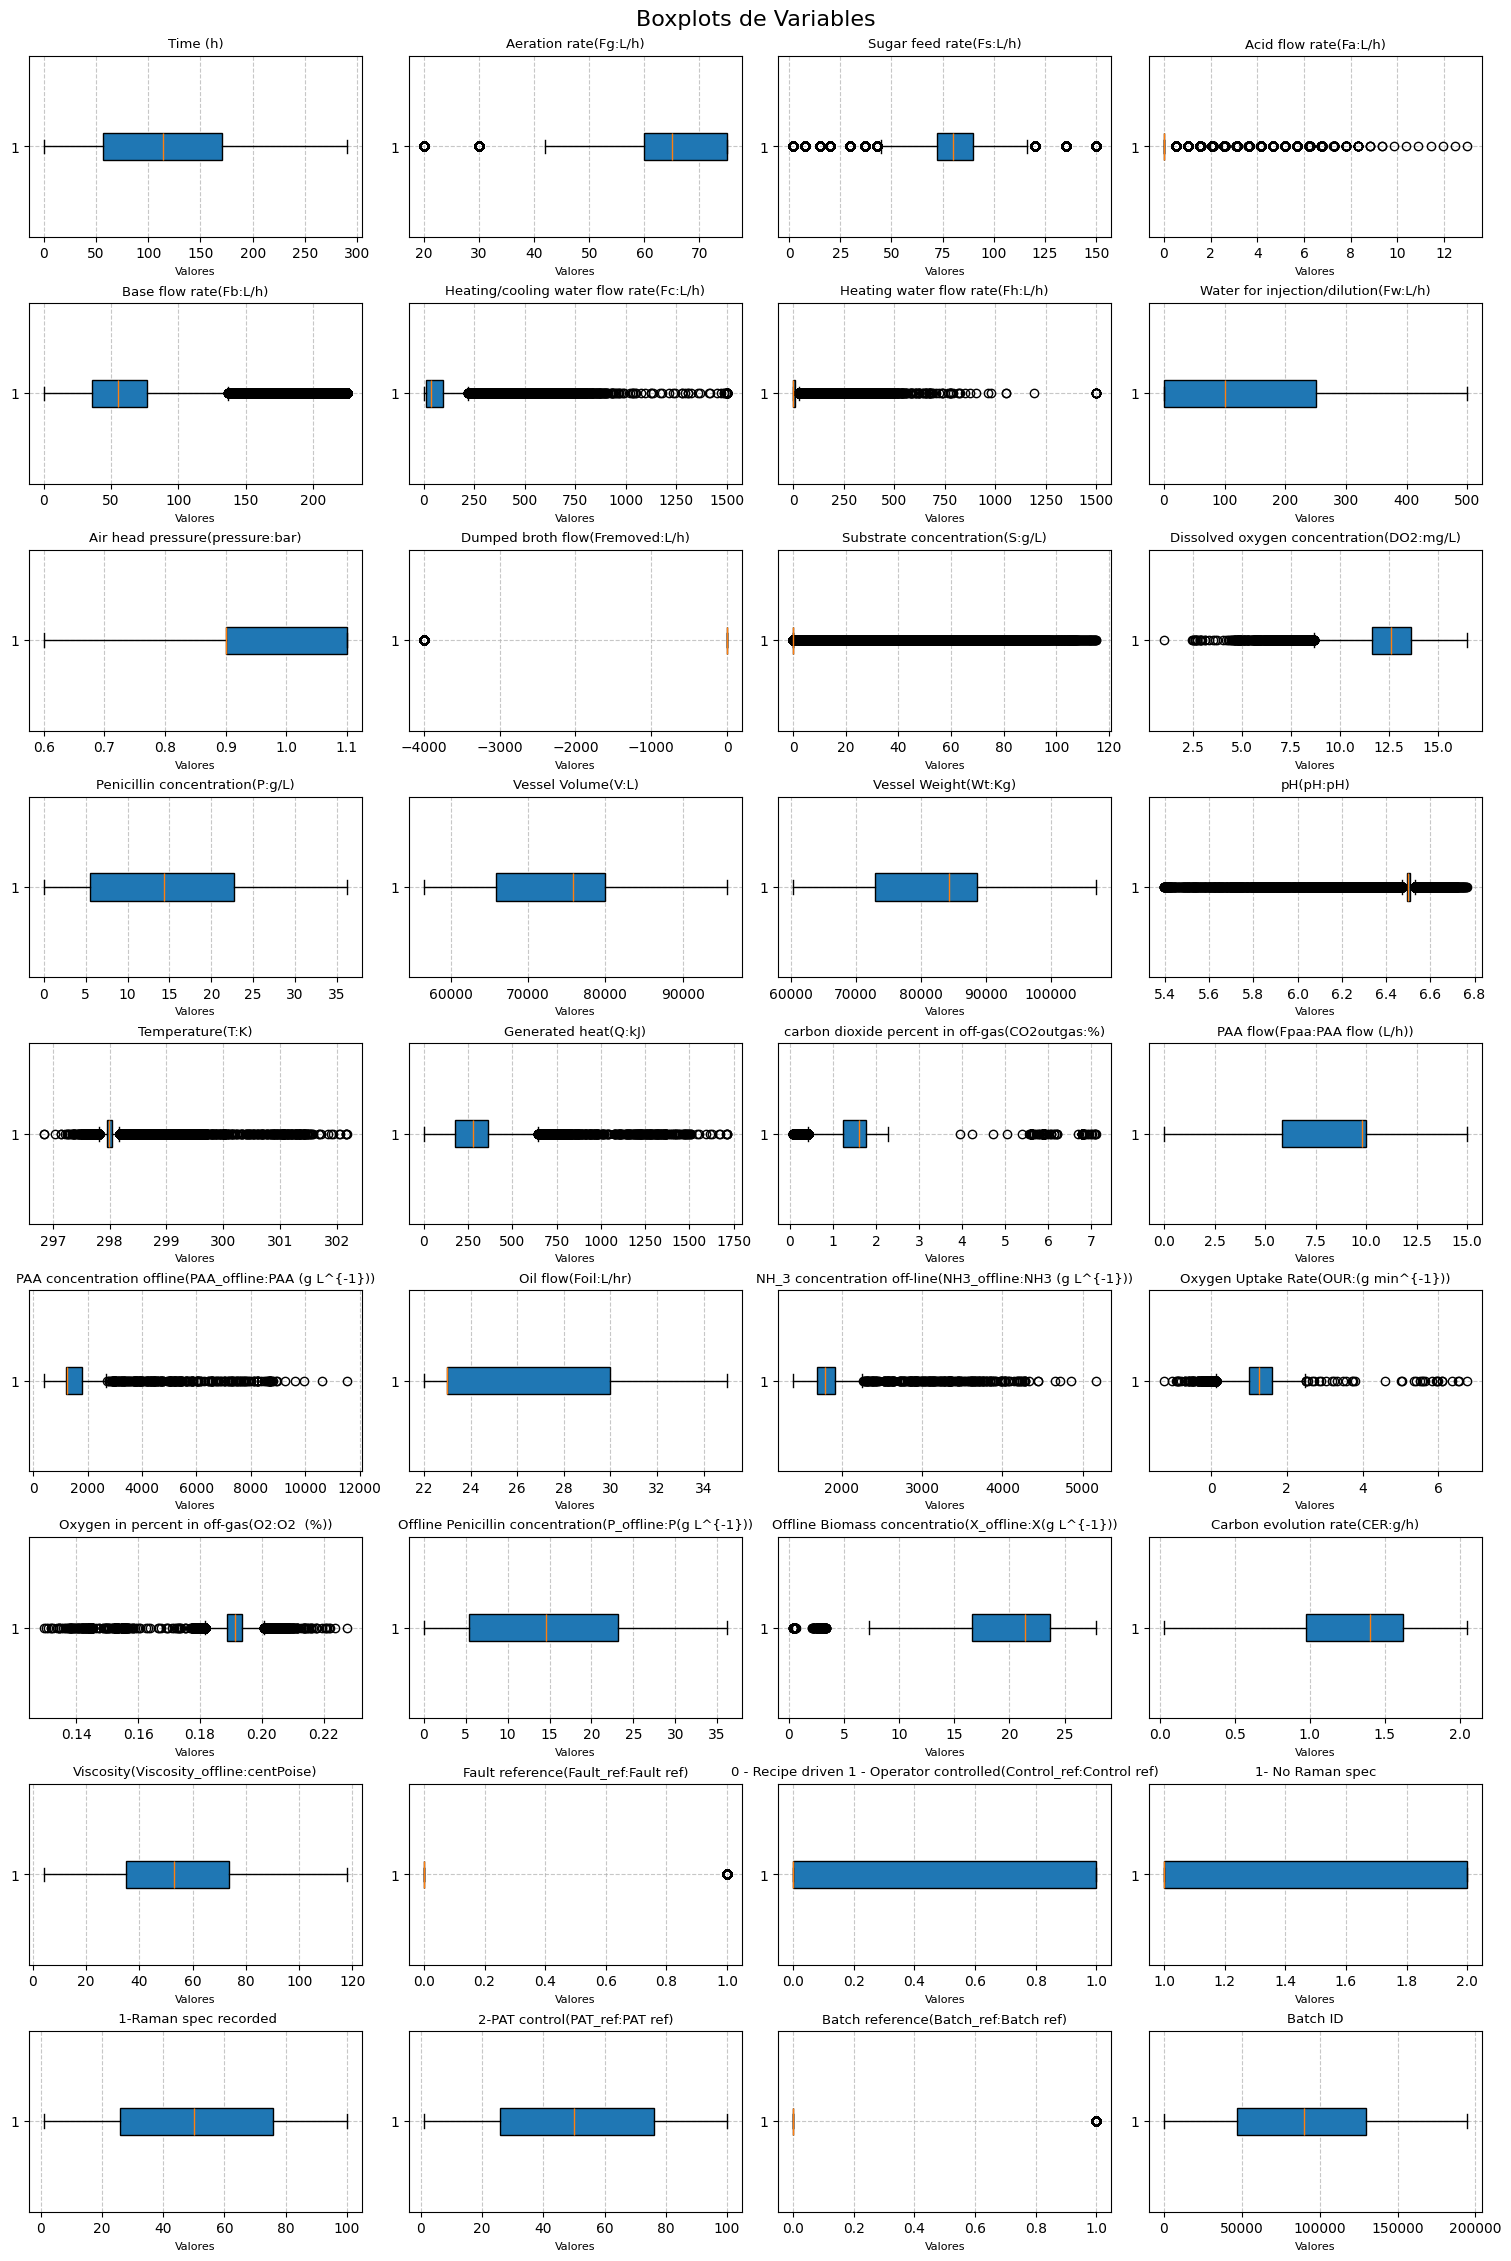

In [ ]:
variables_box = [
    'Time (h)', 'Aeration rate(Fg:L/h)', 'Sugar feed rate(Fs:L/h)',
    'Acid flow rate(Fa:L/h)', 'Base flow rate(Fb:L/h)',
    'Heating/cooling water flow rate(Fc:L/h)', 'Heating water flow rate(Fh:L/h)',
    'Water for injection/dilution(Fw:L/h)', 'Air head pressure(pressure:bar)',
    'Dumped broth flow(Fremoved:L/h)', 'Substrate concentration(S:g/L)',
    'Dissolved oxygen concentration(DO2:mg/L)', 'Penicillin concentration(P:g/L)',
    'Vessel Volume(V:L)', 'Vessel Weight(Wt:Kg)', 'pH(pH:pH)', 'Temperature(T:K)',
    'Generated heat(Q:kJ)', 'carbon dioxide percent in off-gas(CO2outgas:%)',
    'PAA flow(Fpaa:PAA flow (L/h))', 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
    'Oil flow(Foil:L/hr)', 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
    'Oxygen Uptake Rate(OUR:(g min^{-1}))', 'Oxygen in percent in off-gas(O2:O2  (%))',
    'Offline Penicillin concentration(P_offline:P(g L^{-1}))',
    'Offline Biomass concentratio(X_offline:X(g L^{-1}))',
    'Carbon evolution rate(CER:g/h)', 'Viscosity(Viscosity_offline:centPoise)',
    'Fault reference(Fault_ref:Fault ref)',
    '0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)',
    '1- No Raman spec', ' 1-Raman spec recorded', '2-PAT control(PAT_ref:PAT ref)',
    'Batch reference(Batch_ref:Batch ref)', 'Batch ID'
]

# Configuración para mostrar 3 gráficos por fila
num_columns = 4
num_rows = math.ceil(len(variables_box) / num_columns)


fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 2.5), constrained_layout=True)

# Aplanar el arreglo de ejes (para iterar fácilmente)
axes = axes.flatten()

# Graficar cada variable
for i, var in enumerate(variables_box):
    if var in df.columns:  # Verificar si la columna existe en el DataFrame
        axes[i].boxplot(df[var].dropna(), vert=False, patch_artist=True)
        axes[i].set_title(var, fontsize=9.5)
        axes[i].set_xlabel('Valores', fontsize=8)
        axes[i].grid(True, linestyle='--', alpha=0.7)
    else:
        # Si la variable no está en el DataFrame, ocultar el subplot
        axes[i].axis('off')

# Ocultar ejes sobrantes (si no hay suficientes variables)
for j in range(len(variables_box), len(axes)):
    axes[j].axis('off')

plt.suptitle('Boxplots de Variables', fontsize=16)
plt.show()

### Análisis Boxplot

Para el analisis de este tipo de gráfico, se toman 4 variables que servirán para ejemplicar un analisis detallado posterior en este proceso, vale la pena mencionar que este tipo de gráfico permite identificar de manera visual la forma en la que los datos se distribuyen facilitando la identficación de valores atípicos

1. Aeration rate (g/L/h)
La variable presenta una distribución concentrada entre 60 y 75 g/L/h, con una mediana cercana a 65. Sin embargo, se identifican varios valores atípicos por debajo de 40 g/L/h, lo que podría reflejar interrupciones en el suministro de aire o ajustes específicos en ciertas etapas del proceso. Estos outliers inferiores podrían impactar el rendimiento si la aireación es un factor crítico en el sistema.

2. Sugar feed rate (L/h)
La mayoría de los valores de esta variable se encuentran entre 48 y 120 L/h, aproximadamente con una mediana cercana a 80. Se observan numerosos outliers superiores que superan los 120 L/h, llegando hasta 150, y algunos inferiores cercanos a 0 L/h. Los valores altos podrían deberse a un exceso en la dosificación de azúcar, mientras que los bajos podrían indicar interrupciones en la alimentación o necesidades reducidas en ciertas fases del proceso.

3. Acid flow rate (Fa: L/h)
La variable muestra una distribución compacta con valores concentrados entre 0 y aproximadamente 2 L/h. No se observa una caja o rango intercuartil definido en el boxplot, lo que indica que los datos están distribuidos de manera uniforme o que podrían ser valores únicos a lo largo del eje y el rango parece reflejar un control consistente en el flujo de ácido durante el proceso.

4. Heating/cooling water flow rate (Fc: L/h)
La variable presenta una distribución concentrada en valores bajos, con un rango intercuartil (IQR) aproximadamente entre 0 y 250 L/h. Sin embargo, se observa una cantidad considerable de valores atípicos superiores que se extienden hasta los 1500 L/h, lo que indica eventos de alto flujo fuera de lo habitual. Estos outliers podrían estar relacionados con picos en la demanda térmica durante ciertas fases del proceso, ajustes en los sistemas de control o posibles anomalías operativas. Se recomienda analizar las condiciones específicas en las que ocurren estos valores extremos para determinar si representan un comportamiento esperado o una desviación del estándar.





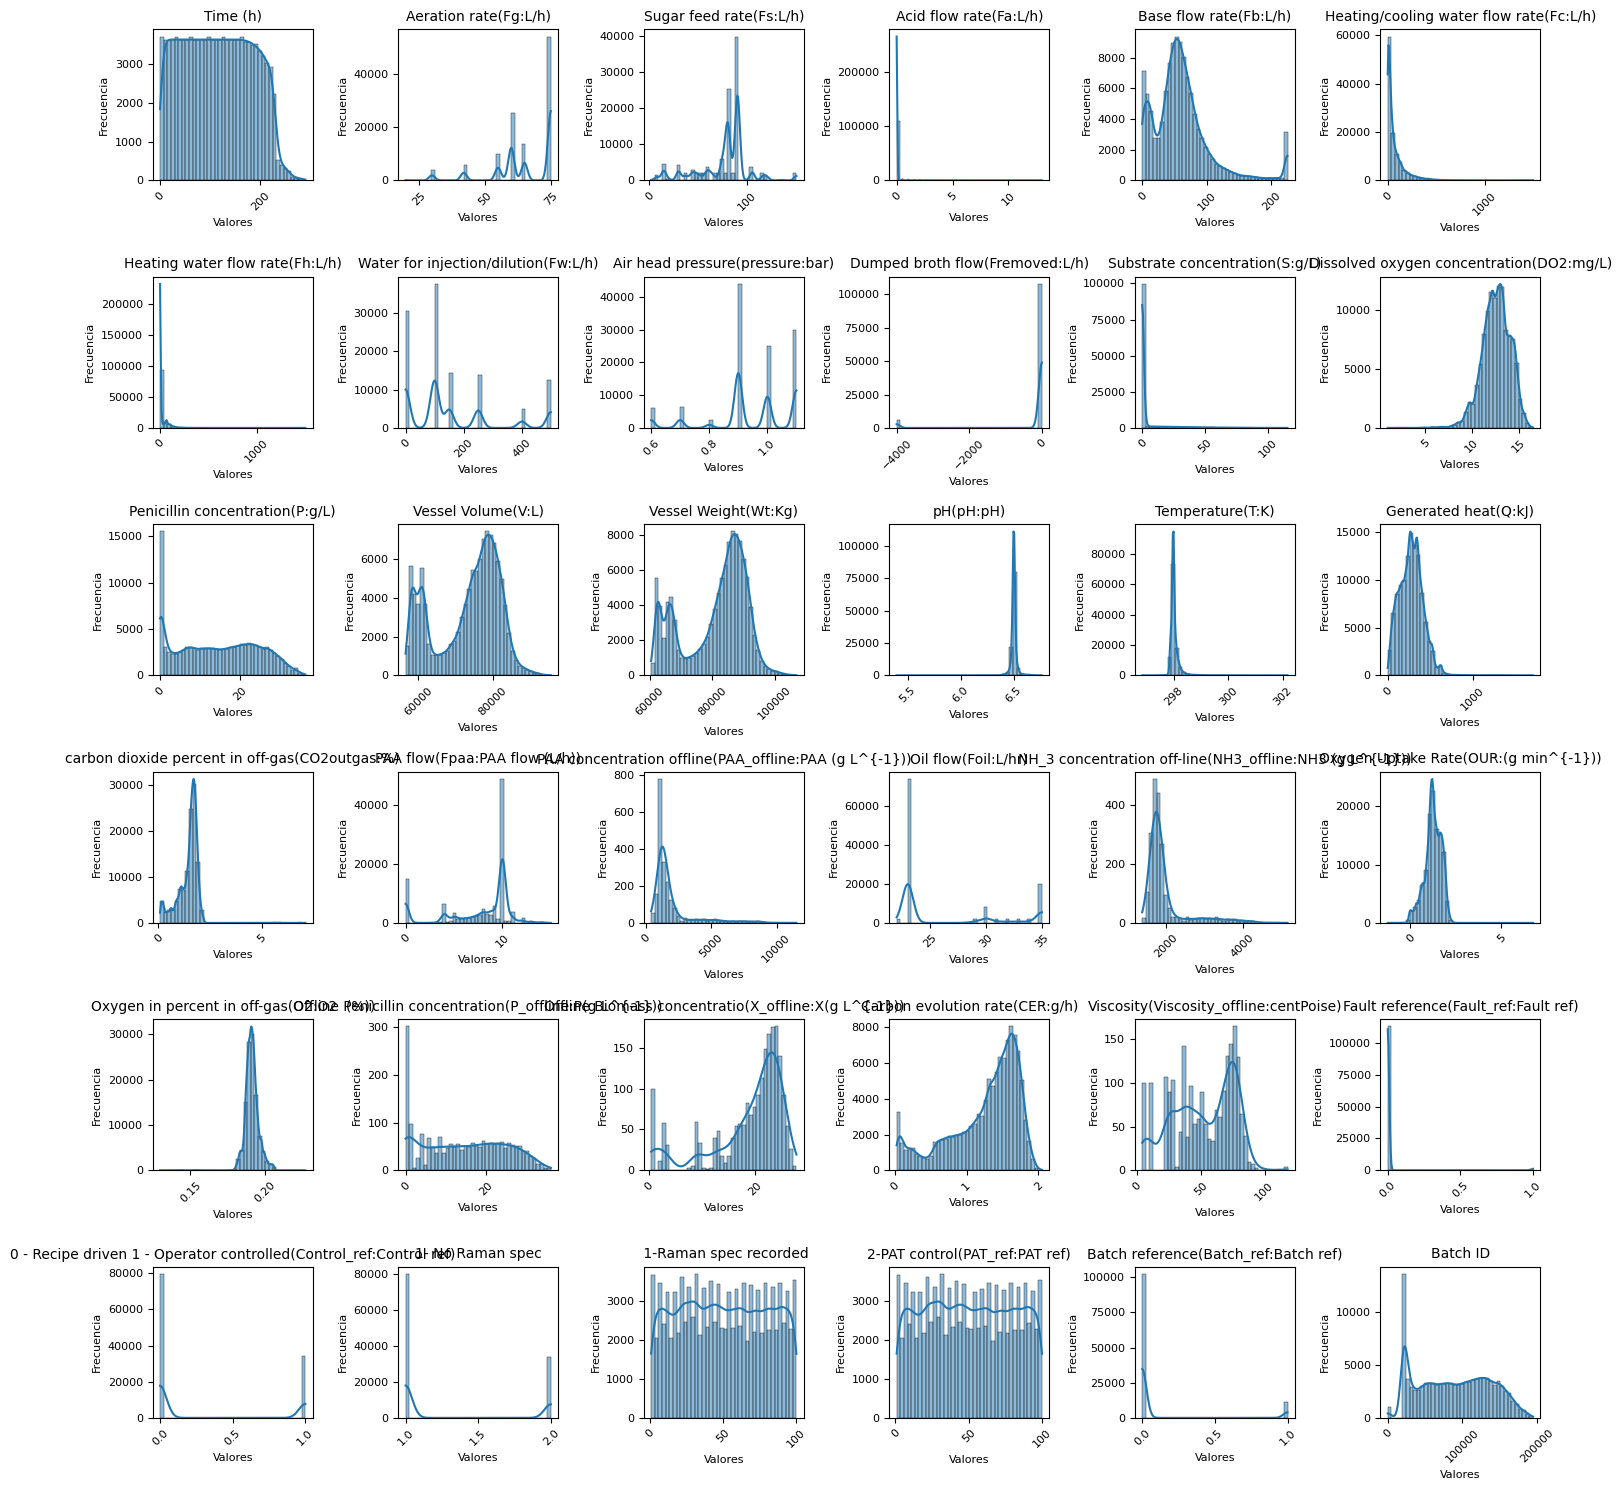

In [ ]:
# Graficar histogramas para cada variable
plt.figure(figsize=(15, 15))
for i, variable in enumerate(variables):
    plt.subplot(6, 6, i + 1)  # Ajustar el número de filas y columnas (aquí 6x6)
    sns.histplot(df[variable], kde=True, bins=40)  # Histogramas con densidad
    plt.title(variable, fontsize=10)
    plt.xlabel('Valores', fontsize=8)
    plt.ylabel('Frecuencia', fontsize=8)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


**Análisis de correlaciones**

A continuación un análisis de correlación para las variables relevantes, con el objetivo de evaluar las relaciones entre ellas y comprender mejor cómo influyen entre sí dentro del proceso. Es importante señalar que las variables Agitator RPM y Ammonia shots no se incluirán en este análisis, ya que no presentan variación significativa en la matriz de datos.


In [17]:
# Definir las variables (más relevantes) para el cálculo de correlación.
df_correlation = df[[
    'Time (h)',
    'Aeration rate(Fg:L/h)',
    'Sugar feed rate(Fs:L/h)',
    'Acid flow rate(Fa:L/h)',
    'Base flow rate(Fb:L/h)',
    'Heating/cooling water flow rate(Fc:L/h)',
    'Heating water flow rate(Fh:L/h)',
    'Water for injection/dilution(Fw:L/h)',
    'Air head pressure(pressure:bar)',
    'Dumped broth flow(Fremoved:L/h)',
    'Substrate concentration(S:g/L)',
    'Dissolved oxygen concentration(DO2:mg/L)',
    'Penicillin concentration(P:g/L)',
    'Vessel Volume(V:L)',
    'Vessel Weight(Wt:Kg)',
    'pH(pH:pH)',
    'Temperature(T:K)',
    'Generated heat(Q:kJ)',
    'carbon dioxide percent in off-gas(CO2outgas:%)',
    'PAA flow(Fpaa:PAA flow (L/h))',
    'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
    'Oil flow(Foil:L/hr)',
    'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
    'Oxygen Uptake Rate(OUR:(g min^{-1}))',
    'Oxygen in percent in off-gas(O2:O2  (%))',
    'Offline Penicillin concentration(P_offline:P(g L^{-1}))',
    'Offline Biomass concentratio(X_offline:X(g L^{-1}))',
    'Carbon evolution rate(CER:g/h)',
    'Viscosity(Viscosity_offline:centPoise)',
    'Fault reference(Fault_ref:Fault ref)',
    '0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)',
    '1- No Raman spec',
    ' 1-Raman spec recorded',
    '2-PAT control(PAT_ref:PAT ref)',
    'Batch reference(Batch_ref:Batch ref)',
    'Batch ID'
]]

In [18]:
# Cálculo de la correlación del DataFrame utilizando el método de Pearson.
print('======================================================')
print('=========== Correlación - Método de Pearson ==========')
print('======================================================')
print(df_correlation.corr(method = 'pearson'))

=========== Correlación - Método de Pearson ==========
                                                    Time (h)  \
Time (h)                                            1.000000   
Aeration rate(Fg:L/h)                               0.674398   
Sugar feed rate(Fs:L/h)                             0.439986   
Acid flow rate(Fa:L/h)                              0.098927   
Base flow rate(Fb:L/h)                             -0.270297   
Heating/cooling water flow rate(Fc:L/h)            -0.416910   
Heating water flow rate(Fh:L/h)                     0.282468   
Water for injection/dilution(Fw:L/h)                0.230737   
Air head pressure(pressure:bar)                     0.099895   
Dumped broth flow(Fremoved:L/h)                    -0.167832   
Substrate concentration(S:g/L)                      0.387363   
Dissolved oxygen concentration(DO2:mg/L)           -0.205547   
Penicillin concentration(P:g/L)                     0.870176   
Vessel Volume(V:L)                               

In [ ]:
### Exportar tabla correlación Pearson
df_correlation.corr(method = 'pearson').to_excel("corrpearson.xlsx", index=True)
print("Tabla exportada corr pearson")

Tabla exportada corr pearson


In [32]:
### Exportar tabla correlaciones de Pearson >0,8 y -0,8
pearson_corr = df_correlation.corr(method='pearson')

# Extraer correlaciones fuertes (mayores a 0.8 o menores a -0.8) sin incluir la diagonal
strong_corr = pearson_corr.where(~np.eye(pearson_corr.shape[0], dtype=bool))
strong_corr = strong_corr[(strong_corr > 0.8) | (strong_corr < -0.8)]

# Transformar la matriz en un DataFrame
strong_corr_table = strong_corr.stack().reset_index()
strong_corr_table.columns = ['Variable 1', 'Variable 2', 'Índice de correlación Pearson']

# Exportar a un archivo Excel
strong_corr_table.to_excel("correlaciones_Pearson_fuertes.xlsx", index=False)
print("Archivo Excel exportado exitosamente.")

Archivo Excel exportado exitosamente.


In [19]:
# Cálculo de la correlación del DataFrame utilizando el método de Kendall.
print('\n======================================================')
print('=========== Correlación - Método de Kendall ==========')
print('======================================================')
print(df_correlation.corr(method = 'kendall'))


=========== Correlación - Método de Kendall ==========
                                                    Time (h)  \
Time (h)                                            1.000000   
Aeration rate(Fg:L/h)                               0.537766   
Sugar feed rate(Fs:L/h)                             0.270452   
Acid flow rate(Fa:L/h)                              0.048770   
Base flow rate(Fb:L/h)                             -0.193145   
Heating/cooling water flow rate(Fc:L/h)            -0.276980   
Heating water flow rate(Fh:L/h)                     0.447436   
Water for injection/dilution(Fw:L/h)                0.416741   
Air head pressure(pressure:bar)                    -0.191954   
Dumped broth flow(Fremoved:L/h)                    -0.138486   
Substrate concentration(S:g/L)                     -0.207143   
Dissolved oxygen concentration(DO2:mg/L)           -0.153841   
Penicillin concentration(P:g/L)                     0.764741   
Vessel Volume(V:L)                              

In [ ]:
### Exportar tabla correlación kendall
df_correlation.corr(method = 'kendall').to_excel("corrkedall.xlsx", index=True)
print("Tabla exportada corr kendall")

Tabla exportada corr kendall


In [ ]:
### Exportar tabla correlaciones de kendall >0,8 y -0,8
kendall_corr = df_correlation.corr(method='kendall')

# Extraer correlaciones fuertes (mayores a 0.8 o menores a -0.8) sin incluir la diagonal
strong_corr = kendall_corr.where(~np.eye(kendall_corr.shape[0], dtype=bool))
strong_corr = strong_corr[(strong_corr > 0.8) | (strong_corr < -0.8)]

# Transformar la matriz en un DataFrame
strong_corr_table = strong_corr.stack().reset_index()
strong_corr_table.columns = ['Variable 1', 'Variable 2', 'Índice de correlación kendall']

# Exportar a un archivo Excel
strong_corr_table.to_excel("correlaciones_kendall_fuertes.xlsx", index=False)
print("Archivo Excel exportado exitosamente.")

Archivo Excel exportado exitosamente.


In [20]:
# Cálculo de la correlación del DataFrame utilizando el método de spearman.
print('\n======================================================')
print('=========== Correlación - Método de Spearman =========')
print('======================================================')
print(df_correlation.corr(method = 'spearman'))


=========== Correlación - Método de Spearman =========
                                                    Time (h)  \
Time (h)                                            1.000000   
Aeration rate(Fg:L/h)                               0.695444   
Sugar feed rate(Fs:L/h)                             0.359401   
Acid flow rate(Fa:L/h)                              0.060098   
Base flow rate(Fb:L/h)                             -0.285698   
Heating/cooling water flow rate(Fc:L/h)            -0.421361   
Heating water flow rate(Fh:L/h)                     0.612635   
Water for injection/dilution(Fw:L/h)                0.517216   
Air head pressure(pressure:bar)                    -0.118560   
Dumped broth flow(Fremoved:L/h)                    -0.169539   
Substrate concentration(S:g/L)                     -0.193879   
Dissolved oxygen concentration(DO2:mg/L)           -0.235270   
Penicillin concentration(P:g/L)                     0.877274   
Vessel Volume(V:L)                              

In [ ]:
### Exportar tabla correlación spearman
df_correlation.corr(method = 'spearman').to_excel("corrspearman.xlsx", index=True)
print("Tabla exportada corr spearman")

Tabla exportada corr spearman


In [ ]:
### Exportar tabla correlaciones de spearman >0,8 y -0,8
spearman_corr = df_correlation.corr(method='spearman')

# Extraer correlaciones fuertes (mayores a 0.8 o menores a -0.8) sin incluir la diagonal
strong_corr = spearman_corr.where(~np.eye(spearman_corr.shape[0], dtype=bool))
strong_corr = strong_corr[(strong_corr > 0.8) | (strong_corr < -0.8)]

# Transformar la matriz en un DataFrame
strong_corr_table = strong_corr.stack().reset_index()
strong_corr_table.columns = ['Variable 1', 'Variable 2', 'Índice de correlación spearman']

# Exportar a un archivo Excel
strong_corr_table.to_excel("correlaciones_spearman_fuertes.xlsx", index=False)
print("Archivo Excel exportado exitosamente.")

Archivo Excel exportado exitosamente.


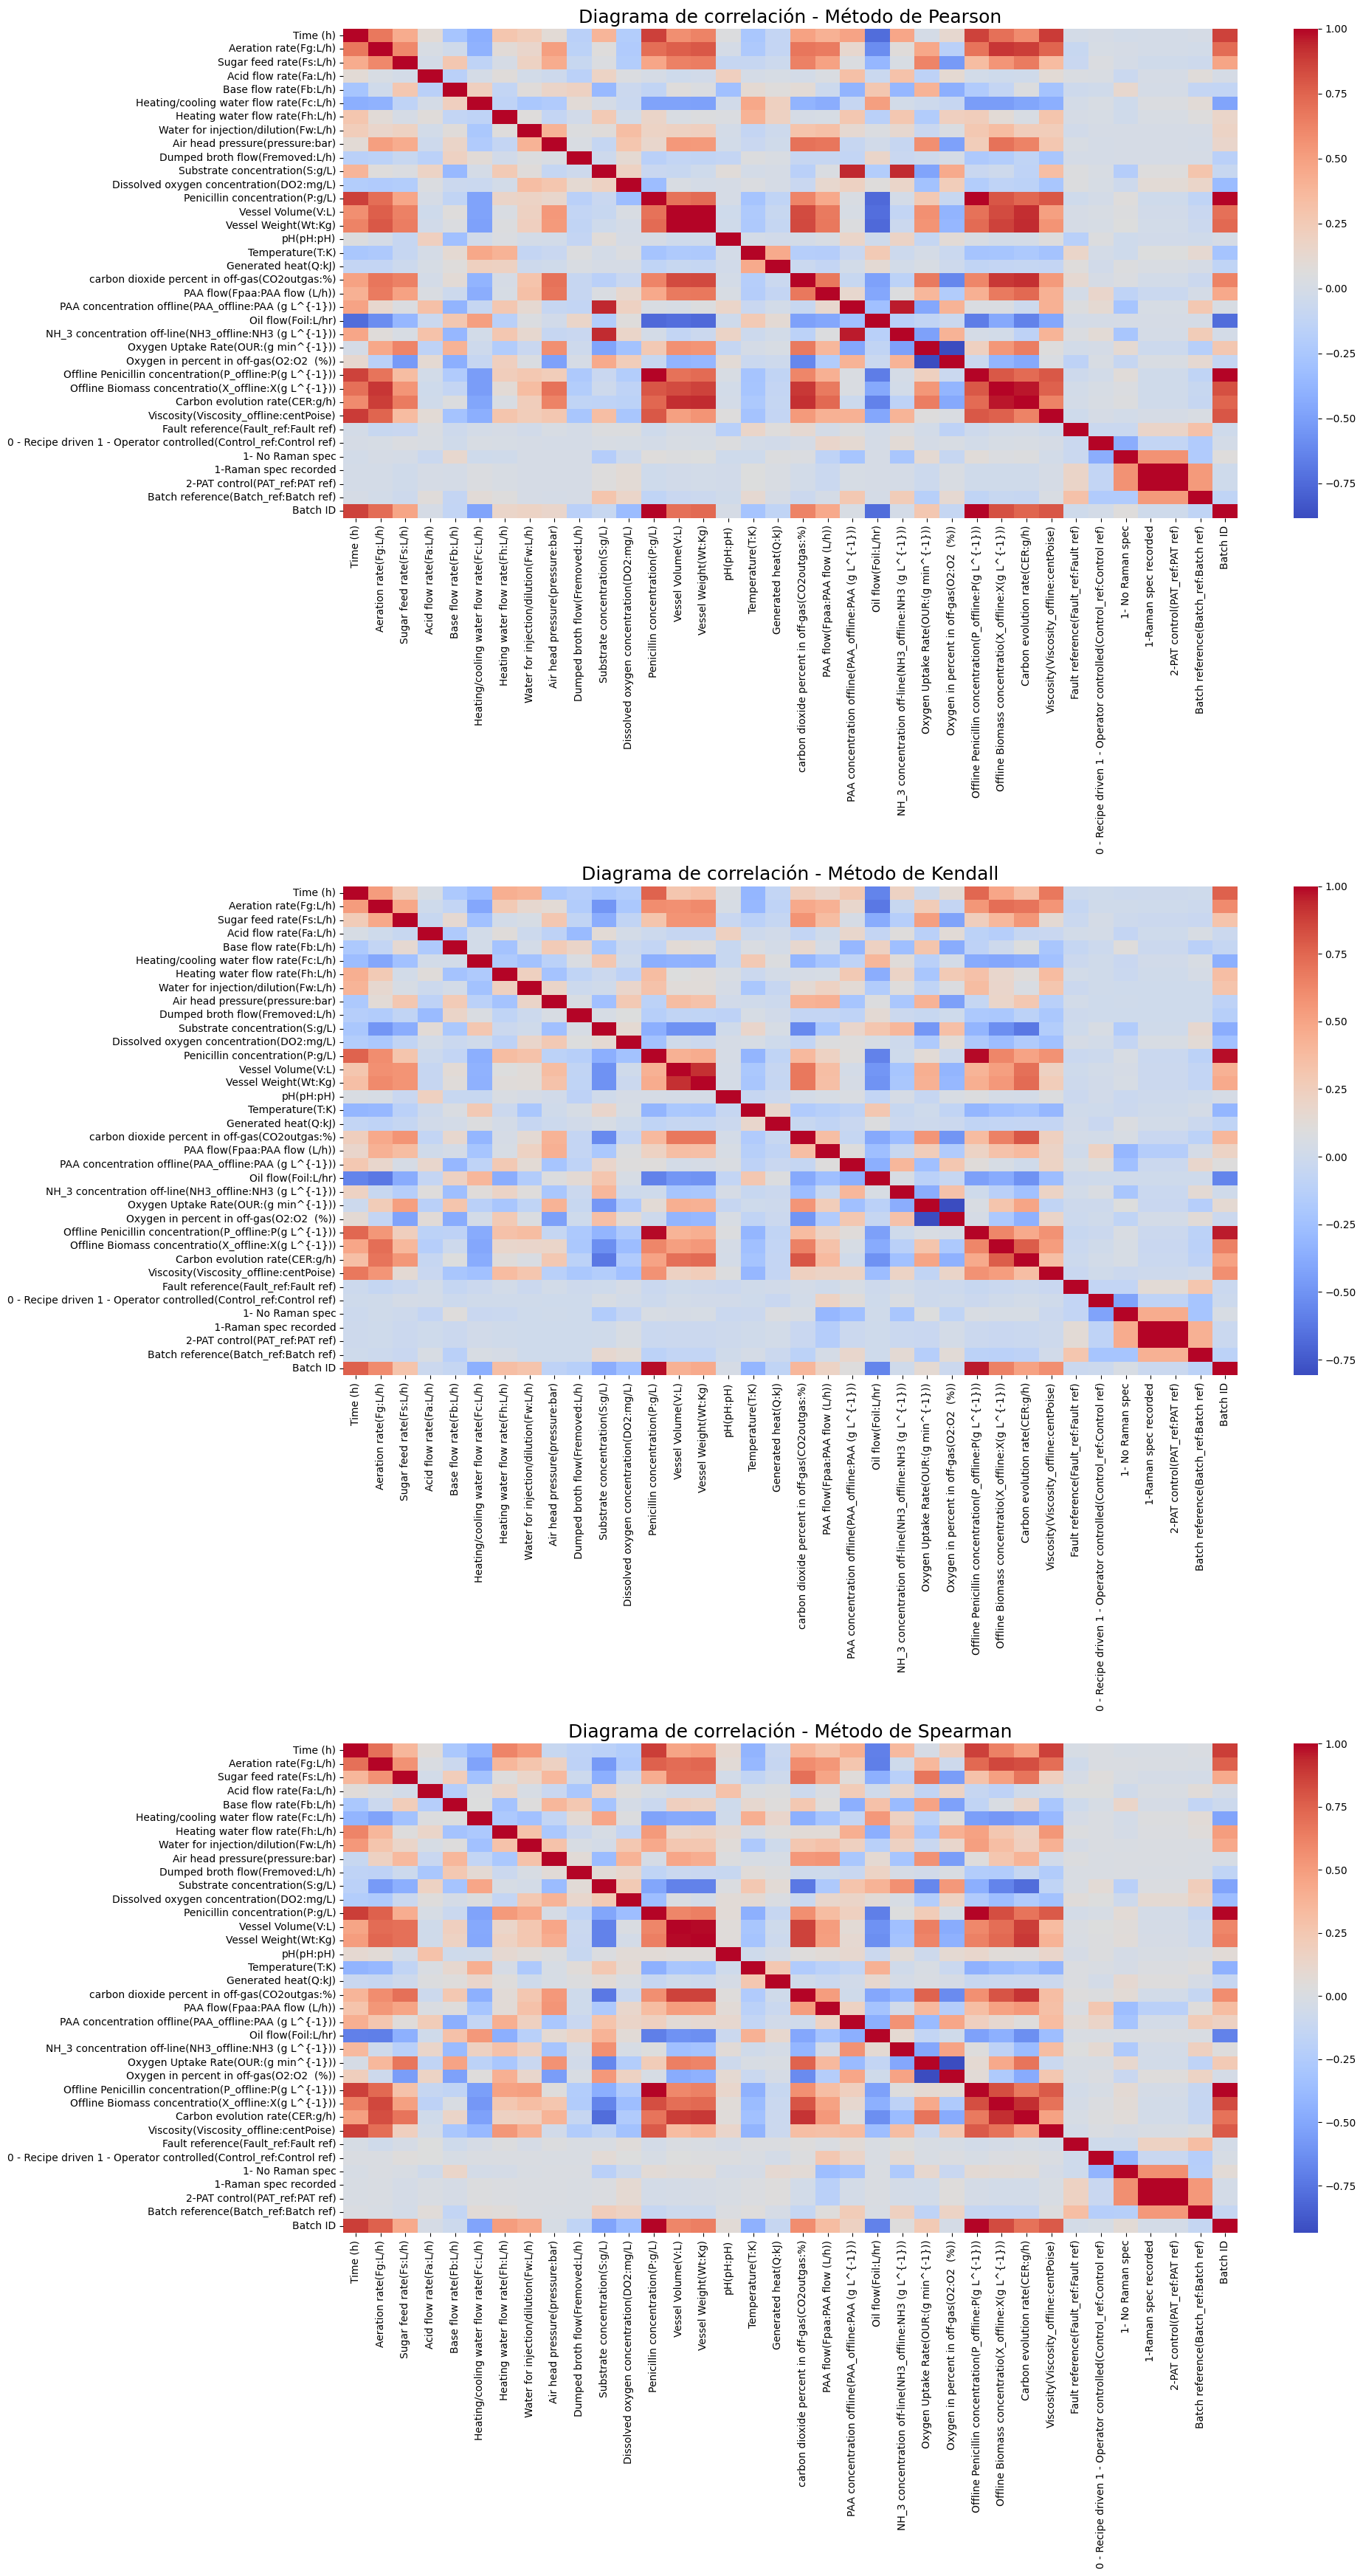

In [48]:
# Gráfico del mapa de calor de la matriz de correlación utilizando los métodos de Pearson, Kendall y Spearman.
plt.figure(figsize = (20, 35))

plt.subplot(3, 1, 1)
plt.title('Diagrama de correlación - Método de Pearson', fontsize = 18)
sns.heatmap(df_correlation.corr(method = 'pearson'), annot = False, cmap = 'coolwarm', fmt = '.3f')

plt.subplot(3, 1, 2)
plt.title('Diagrama de correlación - Método de Kendall', fontsize = 18)
sns.heatmap(df_correlation.corr(method = 'kendall'), annot = False, cmap = 'coolwarm', fmt = '.3f')

plt.subplot(3, 1, 3)
plt.title('Diagrama de correlación - Método de Spearman', fontsize = 18)
sns.heatmap(df_correlation.corr(method = 'spearman'), annot = False, cmap = 'coolwarm', fmt = '.3f')

plt.tight_layout()
plt.show()

El análisis de correlación utilizando los métodos de Pearson, Kendall y Spearman muestra patrones consistentes respecto a la relación entre las variables del proceso de fermentación y la concentración de penicilina (*Penicillin concentration (P:g/L)*). En los tres métodos, la variable **Tiempo (*Time (h)*)** exhibe una correlación positiva significativa, con valores de 0.87 en Pearson, 0.76 en Kendall y 0.87 en Spearman. Esto reafirma que el tiempo es un factor fundamental en el incremento de la concentración de penicilina a lo largo del proceso.

La **tasa de aireación (*Aeration rate (Fg:L/h)*)** también presenta una relación positiva destacada, con coeficientes de 0.71, 0.60 y 0.75 en Pearson, Kendall y Spearman, respectivamente. Esto sugiere que un adecuado suministro de oxígeno es esencial para favorecer el crecimiento del hongo y la síntesis de penicilina. La **concentración de biomasa (*Offline Biomass concentration (X_offline:X(g L^{-1}))*)** muestra una correlación fuerte y consistente, con valores de 0.79 en Pearson, 0.63 en Kendall y 0.82 en Spearman. Esto confirma que el desarrollo celular eficiente es un determinante clave en la productividad del proceso.

La **tasa de evolución de carbono (*Carbon evolution rate (CER:g/h)*)** presenta correlaciones moderadamente altas, con valores de 0.74, 0.49 y 0.68 en los métodos de Pearson, Kendall y Spearman, respectivamente. Esto resalta su relevancia en los mecanismos metabólicos asociados a la síntesis de penicilina. Asimismo, la **viscosidad (*Viscosity (centPoise)*)** mantiene valores significativos en los tres métodos, con coeficientes de 0.79, 0.58 y 0.73 en Pearson, Kendall y Spearman, respectivamente, indicando que las propiedades físicas del medio influyen en el proceso de producción.

La **masa del recipiente (*Vessel Weight (Wt:Kg)*)** exhibe una correlación positiva significativa, con valores de 0.72, 0.46 y 0.63 en Pearson, Kendall y Spearman, respectivamente. Esto sugiere que el peso del recipiente, que puede estar relacionado con el volumen o condiciones internas del proceso, tiene un impacto positivo en la concentración de penicilina. Por el contrario, la **tasa de flujo de aceite (*Oil flow (Foil:L/hr)*)** presenta una correlación negativa consistente, con valores de -0.75, -0.57 y -0.71 en Pearson, Kendall y Spearman. Esto indica que un mayor flujo de aceite puede interferir con las condiciones ideales para la producción de penicilina, posiblemente alterando la composición o las dinámicas internas del sistema.

Por otro lado, variables como las tasas de flujo ácido (*Acid flow rate (Fa:L/h)*) y flujo base (*Base flow rate (Fb:L/h)*) presentan correlaciones bajas o despreciables en todos los métodos, con valores cercanos a 0.01 y -0.12 respectivamente. Esto sugiere un impacto mínimo en la concentración de penicilina. Estas variables podrían no requerir un control estricto dentro de las condiciones estándar del proceso.

En conjunto, los tres métodos de correlación coinciden en identificar las variables **Tiempo (*Time (h)*)**, **Tasa de aireación (*Aeration rate (Fg:L/h)*)**, **Concentración de biomasa (*Offline Biomass concentration (X_offline:X(g L^{-1}))*)**, **Tasa de evolución de carbono (*Carbon evolution rate (CER:g/h)*)**, **Viscosidad (*Viscosity (centPoise)*)**, **Masa del recipiente (*Vessel Weight (Wt:Kg)*)**, y **Tasa de flujo de aceite (*Oil flow (Foil:L/hr)*)** como factores importantes en el proceso. Esta consistencia entre métodos proporciona una base sólida para priorizar estas variables en modelos predictivos como redes neuronales recurrentes. Las variables clave permitirán capturar las dinámicas temporales y metabólicas del proceso, mejorando la precisión del modelo y proporcionando insights valiosos para la optimización de la producción.

Como parte del análisis exploratorio de datos (EDA), se han evaluado las correlaciones entre las variables del proceso de fermentación y la concentración de penicilina (*Penicillin concentration (P:g/L)*), utilizando los métodos de Pearson, Kendall y Spearman. Este análisis tiene como objetivo identificar las variables más relevantes que impactan en la producción de penicilina, proporcionando una base sólida para construir un modelo de redes neuronales recurrentes (RNN). Este modelo se utilizará para pronosticar con precisión la concentración de penicilina, aprovechando las dinámicas temporales y metabólicas del proceso.

**En consecuencia, el modelo de redes neuronales recurrentes (RNN) será inicialmente entrenado utilizando la totalidad de las variables definidas, permitiendo un análisis integral que capture tanto las dinámicas temporales como las interacciones complejas entre las variables operativas del proceso. Esta estrategia garantizará que ninguna relación potencialmente significativa sea omitida en las etapas iniciales del modelado, proporcionando una línea base para comparar y optimizar el modelo en fases posteriores.**

### **Análisis por Lote**

In [8]:
# Definir la lista de las columnas a seleccionar del dataset.
df_columns = [
    'Time (h)',
    'Temperature(T:K)',
    'pH(pH:pH)',
    'Dissolved oxygen concentration(DO2:mg/L)',
    'Sugar feed rate(Fs:L/h)',
    'Substrate concentration(S:g/L)',
    'Oil flow(Foil:L/hr)',
    'Ammonia shots(NH3_shots:kgs)',
    'Oxygen in percent in off-gas(O2:O2  (%))',
    'carbon dioxide percent in off-gas(CO2outgas:%)',
    'Penicillin concentration(P:g/L)',
]

# Generar df_lote_1
df_lote_1 = df[(df['2-PAT control(PAT_ref:PAT ref)'] >= 1) & (df['2-PAT control(PAT_ref:PAT ref)'] <= 30)][df_columns]

# Generar df_lote_2
df_lote_2 = df[(df['2-PAT control(PAT_ref:PAT ref)'] >= 31) & (df['2-PAT control(PAT_ref:PAT ref)'] <= 60)][df_columns]
# Generar df_lote_3
df_lote_3 = df[(df['2-PAT control(PAT_ref:PAT ref)'] >= 61) & (df['2-PAT control(PAT_ref:PAT ref)'] <= 90)][df_columns]

# Generar df_lote_4
df_lote_4 = df[(df['2-PAT control(PAT_ref:PAT ref)'] >= 91) & (df['2-PAT control(PAT_ref:PAT ref)'] <= 100)][df_columns]

In [9]:
print("------------------- Lote 1 -------------------")
print(df_lote_1.isna().sum())
print("------------------- Lote 2 -------------------")
print(df_lote_2.isna().sum())
print("------------------- Lote 3 -------------------")
print(df_lote_3.isna().sum())
print("------------------- Lote 4 -------------------")
print(df_lote_4.isna().sum())
# Imprimir los primeros cinco registros de cada batch.

------------------- Lote 1 -------------------
Time (h)                                          0
Temperature(T:K)                                  0
pH(pH:pH)                                         0
Dissolved oxygen concentration(DO2:mg/L)          0
Sugar feed rate(Fs:L/h)                           0
Substrate concentration(S:g/L)                    0
Oil flow(Foil:L/hr)                               0
Ammonia shots(NH3_shots:kgs)                      0
Oxygen in percent in off-gas(O2:O2  (%))          0
carbon dioxide percent in off-gas(CO2outgas:%)    0
Penicillin concentration(P:g/L)                   0
dtype: int64
------------------- Lote 2 -------------------
Time (h)                                          0
Temperature(T:K)                                  0
pH(pH:pH)                                         0
Dissolved oxygen concentration(DO2:mg/L)          0
Sugar feed rate(Fs:L/h)                           0
Substrate concentration(S:g/L)                    0
Oil flow(

#### **Lote 1**

In [10]:
df_lote_1

Time (h)  Temperature(T:K)  pH(pH:pH)  \
0           0.2            298.22     6.4472   
1           0.4            298.17     6.4932   
2           0.6            298.14     6.5425   
3           0.8            298.11     6.5753   
4           1.0            298.09     6.5825   
...         ...               ...        ...   
34320     229.2            298.28     6.5035   
34321     229.4            298.02     6.4993   
34322     229.6            297.84     6.4961   
34323     229.8            298.01     6.4953   
34324     230.0            297.86     6.4974   

       Dissolved oxygen concentration(DO2:mg/L)  Sugar feed rate(Fs:L/h)  \
0                                        14.711                        8   
1                                        14.699                        8   
2                                        14.686                        8   
3                                        14.661                        8   
4                                        14.633                        8   
...                                         ...                      ...   
34320                                    14.510                       80   
34321                                    14.491                       80   
34322                                    14.498                       80   
34323                                    14.505                       80   
34324                                    14.519                       80   

       Substrate concentration(S:g/L)  Oil flow(Foil:L/hr)  \
0                             0.95749                   22   
1                             1.00460                   22   
2                             1.04980                   22   
3                             1.09420                   22   
4                             1.13700                   22   
...                               ...                  ...   
34320                        71.57100                   23   
34321                        71.68700                   23   
34322                        71.80500                   23   
34323                        71.92400                   23   
34324                        72.04200                   23   

       Ammonia shots(NH3_shots:kgs)  Oxygen in percent in off-gas(O2:O2  (%))  \
0                                 0                                   0.19595   
1                                 0                                   0.20390   
2                                 0                                   0.20575   
3                                 0                                   0.20602   
4                                 0                                   0.20589   
...                             ...                                       ...   
34320                             0                                   0.19923   
34321                             0                                   0.19905   
34322                             0                                   0.19904   
34323                             0                                   0.19904   
34324                             0                                   0.19908   

       carbon dioxide percent in off-gas(CO2outgas:%)  \
0                                            0.089514   
1                                            0.101760   
2                                            0.105800   
3                                            0.108190   
4                                            0.110300   
...                                               ...   
34320                                        1.070200   
34321                                        1.069700   
34322                                        1.069200   
34323                                        1.068700   
34324                                        1.068300   

       Penicillin concentration(P:g/L)  
0                         1.017800e-25  
1                         1.0000

In [11]:
df_lote_1.describe()

Time (h)  Temperature(T:K)     pH(pH:pH)  \
count  34325.000000      34325.000000  34325.000000   
mean     115.763875        298.016472      6.498033   
std       68.209012          0.136390      0.054558   
min        0.200000        297.440000      5.696000   
25%       57.400000        297.950000      6.493700   
50%      114.600000        297.990000      6.501000   
75%      171.800000        298.040000      6.508200   
max      290.000000        300.240000      6.710500   

       Dissolved oxygen concentration(DO2:mg/L)  Sugar feed rate(Fs:L/h)  \
count                              34325.000000             34325.000000   
mean                                  12.425761                76.569556   
std                                    1.463287                23.798855   
min                                    2.581300                 8.000000   
25%                                   11.439000                76.000000   
50%                                   12.501000                80.000000   
75%                                   13.482000                90.000000   
max                                   16.094000               150.000000   

       Substrate concentration(S:g/L)  Oil flow(Foil:L/hr)  \
count                    34325.000000         34325.000000   
mean                         3.789541            26.338674   
std                         11.717685             4.949306   
min                          0.000109            22.000000   
25%                          0.001008            23.000000   
50%                          0.001656            23.000000   
75%                          0.003020            30.000000   
max                         83.956000            35.000000   

       Ammonia shots(NH3_shots:kgs)  Oxygen in percent in off-gas(O2:O2  (%))  \
count                       34325.0                              34325.000000   
mean                            0.0                                  0.191422   
std                             0.0                                  0.004281   
min                             0.0                                  0.148600   
25%                             0.0                                  0.188830   
50%                             0.0                                  0.191120   
75%                             0.0                                  0.193630   
max                             0.0                                  0.223760   

       carbon dioxide percent in off-gas(CO2outgas:%)  \
count                                    34325.000000   
mean                                         1.438646   
std                                          0.462472   
min                                          0.077186   
25%                                          1.230900   
50%                                          1.587800   
75%                                          1.751000   
max                                          2.187200   

       Penicillin concentration(P:g/L)  
count                     3.432500e+04  
mean                      1.474884e+01  
std                       1.002413e+01  
min                       1.017800e-25  
25%                       5.891700e+00  
50%                       1.511000e+01  
75%                       2.274500e+01  
max                       3.618300e+01

**Analisis**

A partir del análisis descriptivo del conjunto de datos **df_lote_1,** se observa que la Temperatura (T:K) muestra una con una media de 298.02 K (aproximadamente 24.9 °C) y una desviación estándar de apenas 0.14, situando sus valores entre 297.44 K y 300.24 K. Esta estabilidad térmica es clave en procesos biológicos.

El pH también refleja una gran consistencia operativa, con un valor promedio de 6.498 y una mínima dispersión (std = 0.055). La mayoría de los valores oscilan en torno a la mediana de 6.50, lo que demuestra un adecuado control del ambiente ácido/base para el crecimiento del hongo. En el caso de la concentración de oxígeno disuelto (DO2:mg/L), la media es de 12.43 mg/L con una desviación de 1.46, indicando una leve variabilidad, pero dentro de rangos aceptables. La tasa de alimentación de azúcar (Fs:L/h) tiene una media de 76.57 L/h y una desviación de 23.8, con valores que varían desde 8 hasta 150 L/h. La mediana (80.0) ligeramente por encima de la media podría sugerir una distribución con sesgo hacia valores más bajos.

Una variable especialmente llamativa es la concentración de sustrato (S:g/L), con una media de 3.78 g/L, pero una desviación estándar muy alta (11.72). La mediana es de apenas 0.0017, mientras que el máximo llega hasta 83.95 g/L, lo cual indica una distribución fuertemente sesgada hacia valores extremos. Esto sugiere que en la mayoría del proceso el sustrato está en niveles muy bajos, con pocos casos de acumulación. El flujo de aceite (Foil:L/hr) se mantiene más estable, con un promedio de 26.34 L/h y valores que oscilan entre 22 y 35 L/h. En contraste, **Ammonia shots (NH3_shots:kgs) permanece constante en cero, lo que indica que no se utilizó amoníaco en este lote.**

El porcentaje de oxígeno en el gas residual (O2:O2 (%)) tiene un comportamiento muy controlado, con una media de 0.191% y muy poca variabilidad (std = 0.0043), lo que respalda la eficiencia del control de oxigenación. La presencia de dióxido de carbono (CO2outgas:%) en los gases residuales presenta una media de 1.43% con desviación moderada (0.46), en un rango de 0.07% a 2.18%. Finalmente, la concentración de penicilina (P:g/L) tiene una media de 14.75 g/L, con una desviación de 10.02 y una mediana de 15.11 g/L, lo que indica un comportamiento bastante simétrico, aunque se observa una diferencia importante entre el valor mínimo (prácticamente cero) y el máximo (36.18 g/L), reflejando que la producción de penicilina varía considerablemente a lo largo del proceso.

In [143]:
print(df_lote_1.nunique())

Time (h)                                           1450
Temperature(T:K)                                    186
pH(pH:pH)                                          2276
Dissolved oxygen concentration(DO2:mg/L)           7365
Sugar feed rate(Fs:L/h)                              18
Substrate concentration(S:g/L)                    26949
Oil flow(Foil:L/hr)                                   9
Ammonia shots(NH3_shots:kgs)                          1
Oxygen in percent in off-gas(O2:O2  (%))           2557
carbon dioxide percent in off-gas(CO2outgas:%)    14591
Penicillin concentration(P:g/L)                   25474
dtype: int64


**Analisis**

El análisis de unicidad de valores en el DataFrame **df_lote_1** revela que la variable Time (h) cuenta con 1450 valores únicos, lo que indica un muestreo relativamente frecuente del tiempo durante el proceso. Temperature (T:K) tiene 186 valores únicos.

El pH presenta 2276 valores diferentes, lo cual refleja una mayor variabilidad o precisión en la medición. Por su parte, la concentración de oxígeno disuelto (DO2:mg/L) y el porcentaje de oxígeno en el gas residual tienen 7365 y 2557 valores únicos, respectivamente, mostrando una captura más dinámica de las condiciones del medio. De forma destacada, Substrate concentration (S:g/L) y Penicillin concentration (P:g/L) tienen una alta diversidad de valores (26,949 y 25,474), lo que refleja una gran sensibilidad a cambios en el proceso, ideal para el modelado de patrones complejos.

Por otro lado, variables como Sugar feed rate (Fs:L/h) y Oil flow (Foil:L/hr) presentan una baja cantidad de valores únicos (18 y 9, respectivamente), lo que sugiere que son operadas en intervalos o niveles discretos. Finalmente, Ammonia shots (NH3_shots:kgs) muestra solo un valor único, lo que indica que esta variable no cambia dentro del lote analizado y podría considerarse irrelevante para el modelado predictivo en este contexto.

In [144]:
df_lote_1.var()

Time (h)                                          4652.469386
Temperature(T:K)                                     0.018602
pH(pH:pH)                                            0.002977
Dissolved oxygen concentration(DO2:mg/L)             2.141209
Sugar feed rate(Fs:L/h)                            566.385479
Substrate concentration(S:g/L)                     137.304139
Oil flow(Foil:L/hr)                                 24.495627
Ammonia shots(NH3_shots:kgs)                         0.000000
Oxygen in percent in off-gas(O2:O2  (%))             0.000018
carbon dioxide percent in off-gas(CO2outgas:%)       0.213881
Penicillin concentration(P:g/L)                    100.483271
dtype: float64

**Analisis**

**El análisis de varianza del DataFrame df_lote_1** muestra que las variables con mayor dispersión son Time (h) (4652.47), Sugar feed rate (Fs:L/h) (566.39), Substrate concentration (S:g/L) (137.30) y Penicillin concentration (P:g/L) (100.48), lo que indica una alta variabilidad en estas medidas a lo largo del proceso. En contraste, variables como Temperature (T:K), pH, y Oxygen in off-gas (%) presentan varianzas muy bajas, lo que refleja un control estricto en estas condiciones. Además, Ammonia shots (NH3_shots:kgs) tiene varianza nula, confirmando que no varía en este lote y puede descartarse para el análisis. 

Este resultado refuerza la necesidad de dar atención especial a las variables más inestables al momento de modelar.

In [145]:
df_lote_1.cov()

Time (h)  Temperature(T:K)  \
Time (h)                                        4652.469386         -2.915010   
Temperature(T:K)                                  -2.915010          0.018602   
pH(pH:pH)                                         -0.000992         -0.000082   
Dissolved oxygen concentration(DO2:mg/L)         -22.503793          0.002335   
Sugar feed rate(Fs:L/h)                          703.574649         -0.429528   
Substrate concentration(S:g/L)                   343.659210         -0.056088   
Oil flow(Foil:L/hr)                             -247.624987          0.209070   
Ammonia shots(NH3_shots:kgs)                       0.000000          0.000000   
Oxygen in percent in off-gas(O2:O2  (%))           0.044808         -0.000051   
carbon dioxide percent in off-gas(CO2outgas:%)    15.908305         -0.017626   
Penicillin concentration(P:g/L)                  601.429415         -0.470736   

                                                pH(pH:pH)  \
Time (h)                                        -0.000992   
Temperature(T:K)                                -0.000082   
pH(pH:pH)                                        0.002977   
Dissolved oxygen concentration(DO2:mg/L)         0.004747   
Sugar feed rate(Fs:L/h)                         -0.115355   
Substrate concentration(S:g/L)                   0.061348   
Oil flow(Foil:L/hr)                             -0.005450   
Ammonia shots(NH3_shots:kgs)                     0.000000   
Oxygen in percent in off-gas(O2:O2  (%))         0.000016   
carbon dioxide percent in off-gas(CO2outgas:%)   0.000098   
Penicillin concentration(P:g/L)                 -0.027665   

                                                Dissolved oxygen concentration(DO2:mg/L)  \
Time (h)                                                                      -22.503793   
Temperature(T:K)                                                                0.002335   
pH(pH:pH)                                                                       0.004747   
Dissolved oxygen concentration(DO2:mg/L)                                        2.141209   
Sugar feed rate(Fs:L/h)                                                        -6.828670   
Substrate concentration(S:g/L)                                                  3.474079   
Oil flow(Foil:L/hr)                                                             0.563468   
Ammonia shots(NH3_shots:kgs)                                                    0.000000   
Oxygen in percent in off-gas(O2:O2  (%))                                        0.001410   
carbon dioxide percent in off-gas(CO2outgas:%)                                 -0.036362   
Penicillin concentration(P:g/L)                                                -5.296132   

                                                Sugar feed rate(Fs:L/h)  \
Time (h)                                                     703.574649   
Temperature(T:K)                                              -0.429528   
pH(pH:pH)                                                     -0.115355   
Dissolved oxygen concentration(DO2:mg/L)                      -6.828670   
Sugar feed rate(Fs:L/h)                                      566.385479   
Substrate concentration(S:g/L)                                 8.974126   
Oil flow(Foil:L/hr)                                          -44.619540   
Ammonia shots(NH3_shots:kgs)                                   0.000000   
Oxygen in percent in off-gas(O2:O2  (%))                      -0.057649   
carbon dioxide percent in off-gas(CO2outgas:%)                 7.702611   
Penicillin concentration(P:g/L)                              111.519487   

                                                Substrate concentration(S:g/L)  \
Time (h)                                                            343.659210   
Temperature(T:K)                                                     -0.056088   
pH(pH:pH)                                                             0.061348   
Dissolved o

**Analisis**

**La matriz de covarianza del Lote 1,** indica que la covarianza más alta se encuentra con Time (h) (601.43), lo que indica que, en general, a medida que transcurre el tiempo, aumenta la concentración de penicilina, como es esperable en una producción por lotes. Asimismo, se evidencia una relación positiva con la tasa de alimentación de azúcar (111.52) y con el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas) (2.98), lo que sugiere que estas variables también acompañan el aumento en la producción del antibiótico, probablemente por su vínculo con la actividad metabólica del hongo.

Por otro lado, se observan covarianzas negativas significativas con el flujo de aceite (Oil flow) (-37.97), la concentración de oxígeno disuelto (DO2:mg/L) (-5.29), y en menor medida con la temperatura (T:K) (-0.47). Estas relaciones negativas indican que, al incrementarse estos parámetros, tiende a disminuir la concentración de penicilina, lo que podría estar relacionado con condiciones que no favorecen la biosíntesis del producto o que generan estrés en el sistema biológico. Además, la concentración de sustrato (S:g/L) muestra una ligera covarianza negativa (-2.00).

En contraste, variables como el pH, el oxígeno en el gas residual, y el uso de ammonia shots, presentan covarianzas muy cercanas a cero, indicando que no tienen una relación lineal clara con la producción de penicilina en este lote. En especial, ammonia shots permanece constante (covarianza 0.0), por lo cual puede considerarse irrelevante en este contexto.

De acuerdo con lo anterior, podemos concluir que las variables tiempo, alimentación de azúcar y producción de CO₂ se destacan como factores con covarianza positiva asociada a un aumento en la concentración de penicilina, mientras que flujo de aceite, oxígeno disuelto y temperatura aparecen como posibles inhibidores

In [146]:
vars_to_plot = [
    'Temperature(T:K)',
    'pH(pH:pH)',
    'Dissolved oxygen concentration(DO2:mg/L)',
    'Sugar feed rate(Fs:L/h)',
    'Substrate concentration(S:g/L)',
    'Oil flow(Foil:L/hr)',
    'Ammonia shots(NH3_shots:kgs)',
    'Oxygen in percent in off-gas(O2:O2  (%))',
    'carbon dioxide percent in off-gas(CO2outgas:%)',
    'Penicillin concentration(P:g/L)'
]

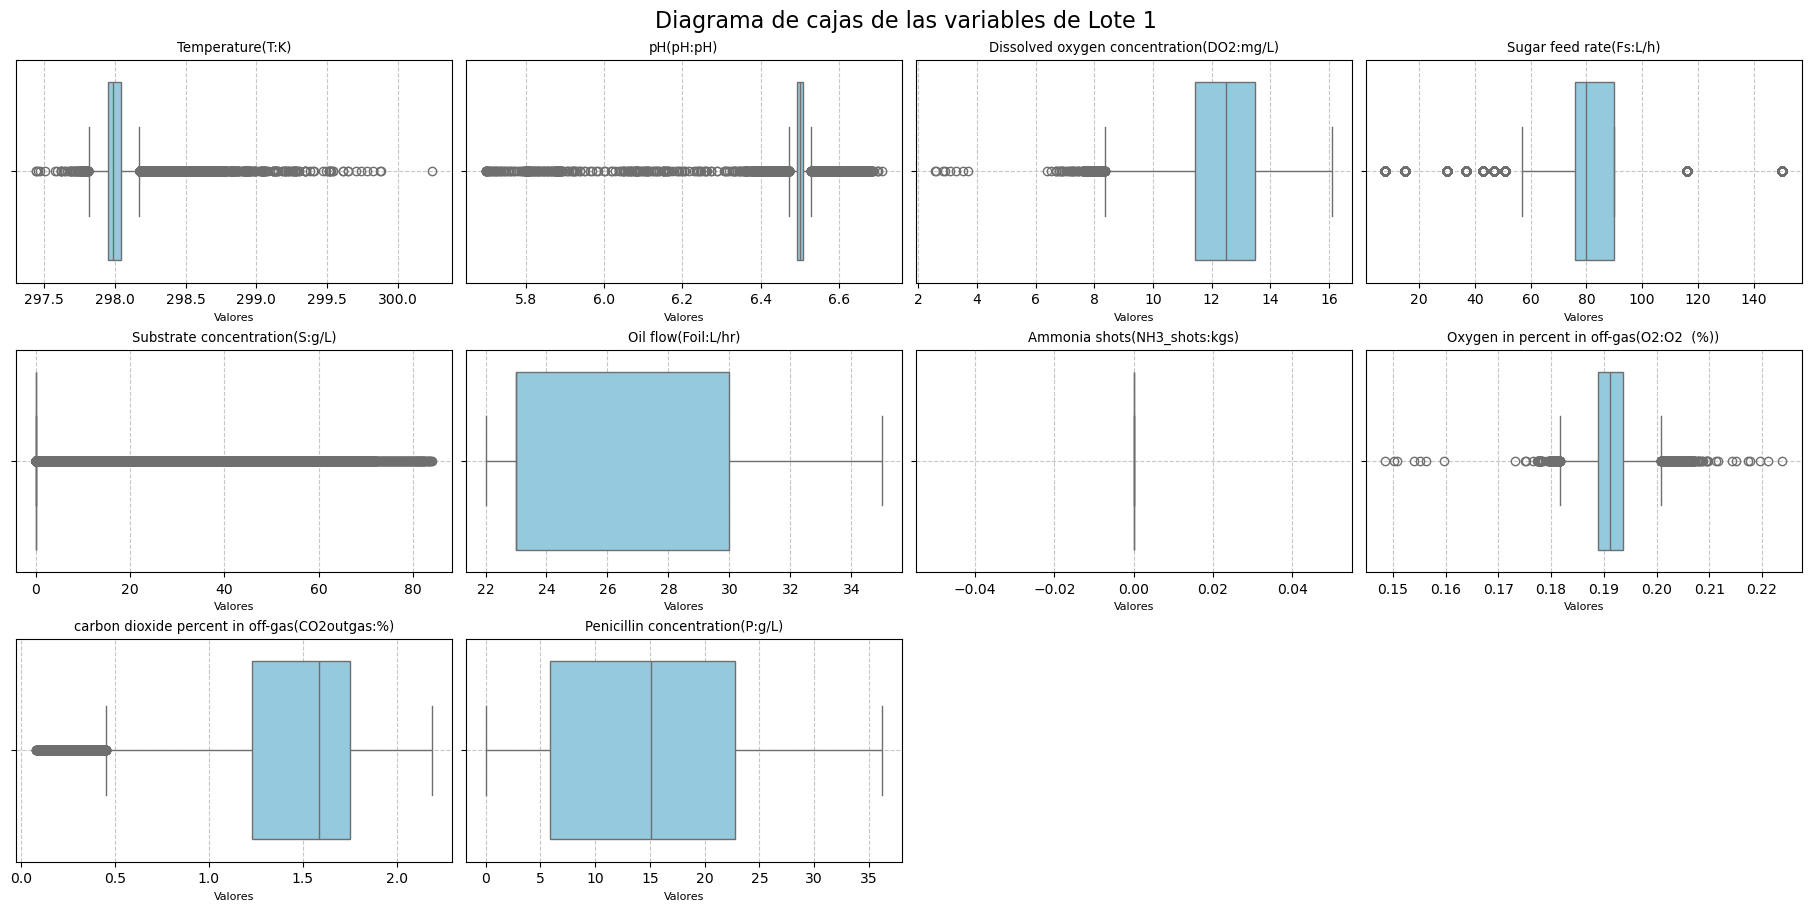

In [150]:
# Parámetros de distribución de subplots
num_columns = 4
num_rows = math.ceil(len(vars_to_plot) / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 3), constrained_layout=True)
axes = axes.flatten()

# Graficar con seaborn
for i, var in enumerate(vars_to_plot):
    if var in df_lote_1.columns:
        sns.boxplot(x=df_lote_1[var], ax=axes[i], orient='h', color='skyblue', linewidth=1)
        axes[i].set_title(var, fontsize=9.5)
        axes[i].set_xlabel('Valores', fontsize=8)
        axes[i].grid(True, linestyle='--', alpha=0.7)
    else:
        axes[i].axis('off')  # Ocultar si no está la columna

# Ocultar subplots vacíos
for j in range(len(vars_to_plot), len(axes)):
    axes[j].axis('off')

plt.suptitle('Diagrama de cajas de las variables de Lote 1', fontsize=16)
plt.show()

**Analisis**

**El diagrama de cajas de las variables del Lote 1** muestra lo siguiente.

Las variables Temperature (T:K), pH (pH:pH) y Oxygen in percent in off-gas (O2:O2 (%)) presentan rangos muy estrechos y una alta concentración de datos, con muchos puntos fuera de los bigotes, lo que sugiere un control estricto del proceso aunque con presencia de valores atípicos debido a su alta precisión de medición. En contraste, variables como Substrate concentration (S:g/L) y Penicillin concentration (P:g/L) muestran una amplia dispersión, evidenciando un comportamiento más dinámico en estas etapas del proceso. En particular, la concentración de sustrato presenta un sesgo a la derecha con una gran cantidad de valores bajos y algunos valores muy altos, posiblemente relacionados con etapas tempranas en el bioproceso.

La variable Sugar feed rate (Fs:L/h) también exhibe varios outliers, aunque el rango intercuartílico está relativamente concentrado, lo que sugiere que el proceso opera en un rango definido, pero con ajustes o perturbaciones puntuales. El Oil flow (Foil:L/hr) tiene una distribución más equilibrada, con un rango moderado y menos valores extremos. Por otro lado, Ammonia shots (NH3_shots:kgs) aparece como constante, sin variabilidad, lo que indica que no fue dosificada en este lote y no aporta valor analítico.

Finalmente, variables como el carbon dioxide percent in off-gas (CO2outgas:%) y la Dissolved oxygen concentration (DO2:mg/L) presentan una distribución más amplia con varios valores extremos, reflejando la naturaleza cambiante de la actividad metabólica del hongo durante el proceso.

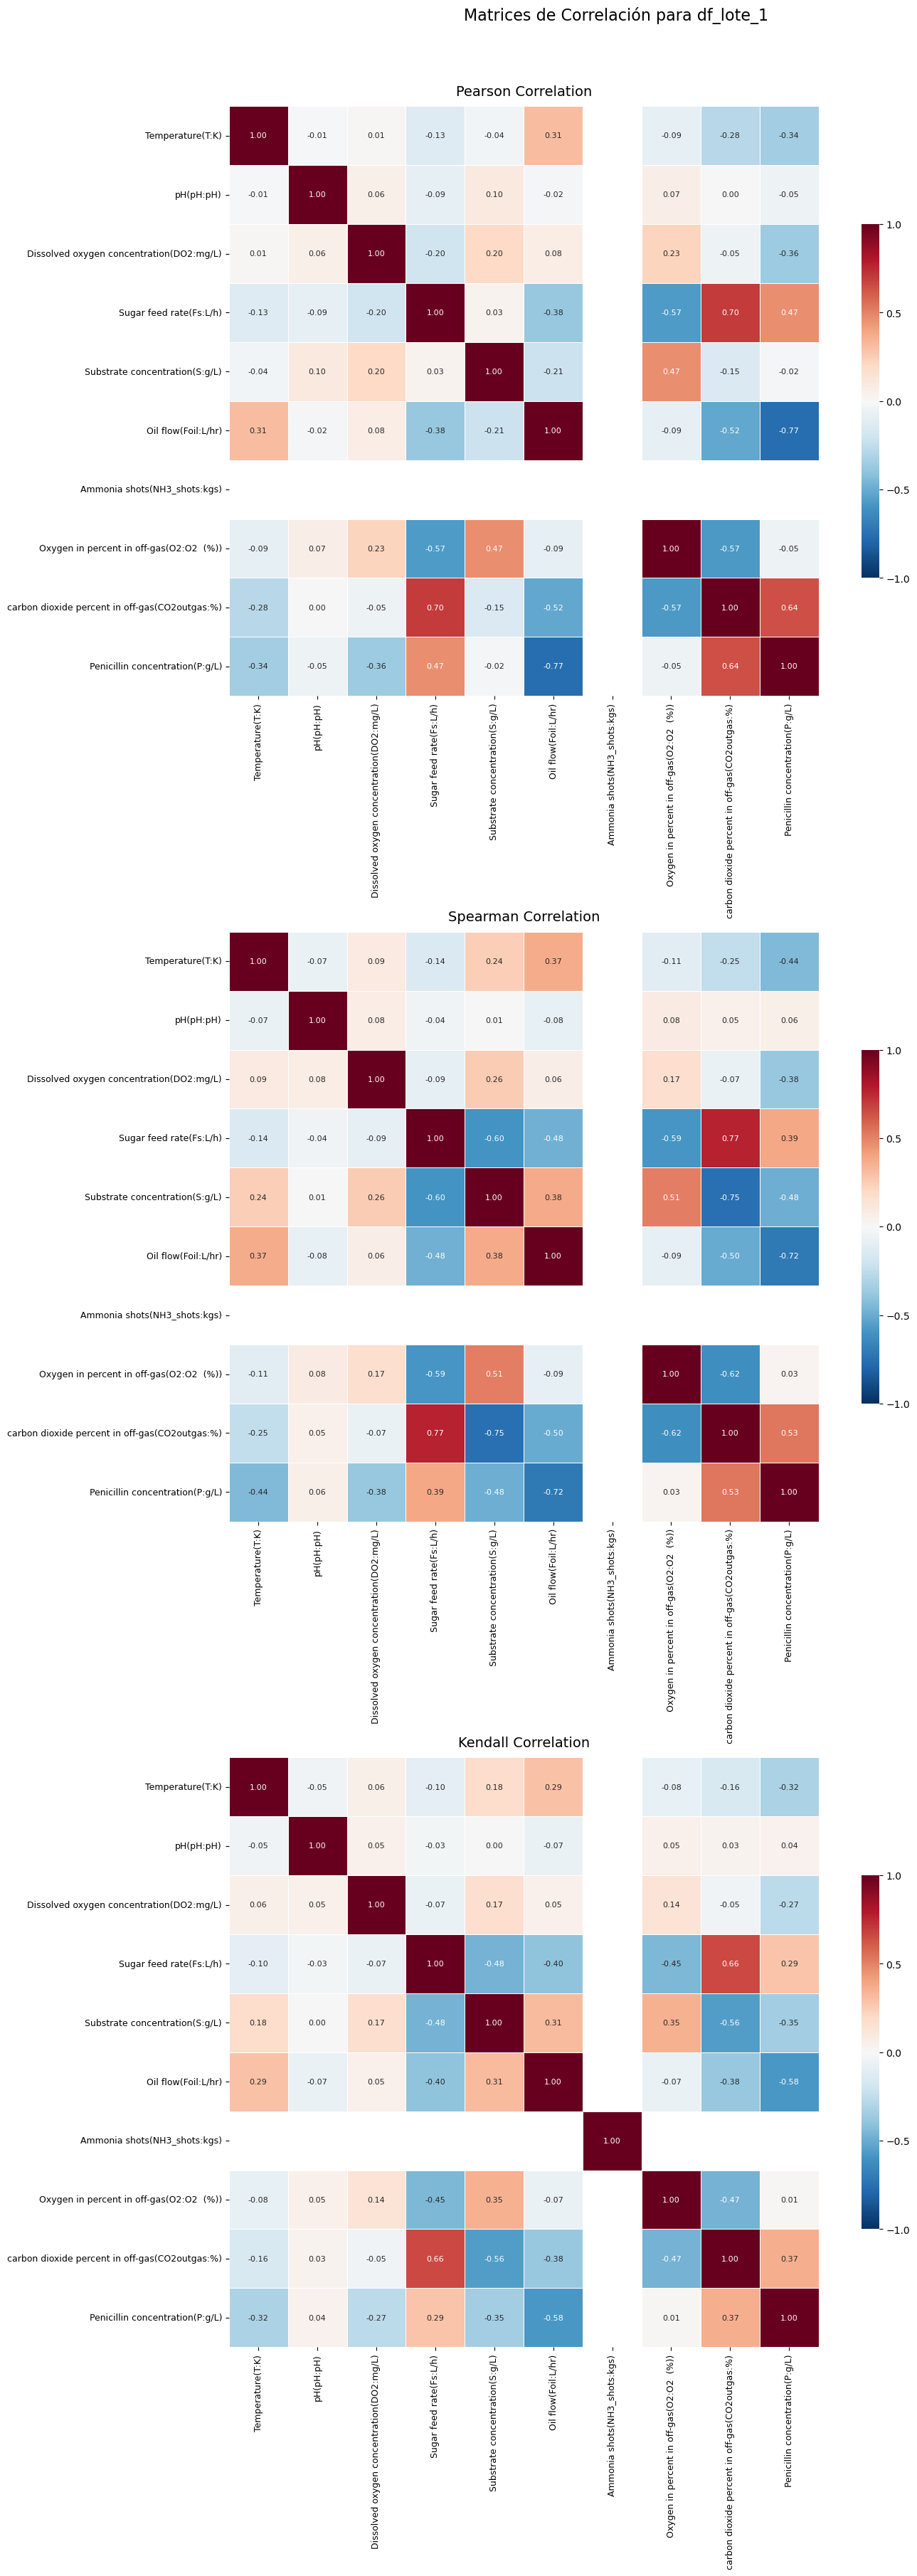

In [ ]:
df_sub = df_lote_1[vars_to_plot]

# Cálculo de las matrices de correlación
corr_methods = {
    'Pearson': df_sub.corr(method='pearson'),
    'Spearman': df_sub.corr(method='spearman'),
    'Kendall': df_sub.corr(method='kendall')
}

# Crear figura con 3 filas, 1 columna
fig, axes = plt.subplots(3, 1, figsize=(15, 35))

# Ajustar márgenes y espacios
plt.subplots_adjust(hspace=0.4, left=0.05, right=0.85, top=0.95, bottom=0.05)

for ax, (title, mat) in zip(axes, corr_methods.items()):
    sns.heatmap(
        mat,
        ax=ax,
        cmap='RdBu_r',
        vmin=-1, vmax=1,
        annot=True,
        fmt=".2f",
        annot_kws={'size':8},
        cbar=True,
        cbar_kws={
            'shrink': 0.6,
            'ticks': [-1, -0.5, 0, 0.5, 1]
        },
        square=True,
        linewidths=0.5
    )
    ax.set_title(f'{title} Correlation', fontsize=14, pad=11)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

plt.suptitle('Matrices de Correlación para df_lote_1', fontsize=16, y=0.99)
plt.show()

**Analisis**

**Correlación de Pearson con la concentración de penicilina:**

El análisis de correlación de Pearson muestra que la variable con mayor relación lineal con la concentración de penicilina es el flujo de aceite (Oil flow), con una fuerte correlación negativa (r = -0.77), lo que indica que un aumento en esta variable se asocia con una disminución en la producción de penicilina. Por otro lado, se observan correlaciones positivas moderadas con la tasa de alimentación de azúcar (Sugar feed rate) (r = 0.47) y con el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas) (r = 0.64), lo que sugiere que estas variables están asociadas a una mayor actividad metabólica y producción del antibiótico. También se destacan correlaciones negativas moderadas con la temperatura (r = -0.34) y la concentración de oxígeno disuelto (r = -0.36), lo que podría reflejar que condiciones más oxigenadas o temperaturas más elevadas afectan negativamente la biosíntesis de penicilina. Variables como el pH y la concentración de sustrato muestran una relación lineal muy débil o nula con la variable objetivo.

**Correlación de Spearman con la concentración de penicilina:**

El análisis de la correlación de Spearman, muestra que la concentración de penicilina presenta su correlación negativa más fuerte con el flujo de aceite (Oil flow) (ρ = -0.72), lo que sugiere que, incluso cuando no se trata de una relación estrictamente lineal, a mayor flujo de aceite tiende a haber una menor producción de penicilina. También se observan correlaciones negativas moderadas con la temperatura (ρ = -0.44), la concentración de oxígeno disuelto (ρ = -0.38) y la concentración de sustrato (ρ = -0.48), lo cual indica que estos factores podrían estar interfiriendo con la síntesis del antibiótico cuando aumentan.

En cuanto a correlaciones positivas, la tasa de alimentación de azúcar (Sugar feed rate) muestra un valor moderado (ρ = 0.39), al igual que el porcentaje de dióxido de carbono en el off-gas (CO₂ outgas) con ρ = 0.53, lo que refuerza la idea de que un metabolismo activo (reflejado por la producción de CO₂) y una mayor disponibilidad de fuente de carbono están asociados con una mayor producción de penicilina.

**Correlación de Kendall con la concentración de penicilina:**

El análisis de correlación de Kendall, confirma varias de las tendencias observadas con Pearson y Spearman, aunque con coeficientes más conservadores. La concentración de penicilina muestra su correlación negativa más fuerte con el flujo de aceite (Oil flow) (τ = -0.58), indicando que a medida que aumenta el flujo de aceite, tiende a disminuir de forma consistente la producción de penicilina. También se evidencian correlaciones negativas moderadas con la temperatura (τ = -0.32), la concentración de oxígeno disuelto (τ = -0.27) y la concentración de sustrato (τ = -0.35), lo que sugiere que estas variables podrían impactar negativamente en la síntesis del antibiótico bajo ciertas condiciones del proceso.

Por otro lado, se identifican correlaciones positivas con el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas) (τ = 0.37) y con la tasa de alimentación de azúcar (Sugar feed rate) (τ = 0.29), aunque de menor magnitud que en las otras correlaciones, reflejando una asociación monótona más suave, sugiriendo que estas variables siguen siendo importantes, aunque sus efectos puedan variar dependiendo de las condiciones específicas del proceso.

**Conclusión general del análisis del Lote 1**

En los tres enfoques, el flujo de aceite (Oil flow) se destaca como la variable con mayor correlación negativa, indicando que su incremento está asociado de forma clara y sostenida con una disminución en la concentración de penicilina, tanto en relaciones lineales como monótonas. Este hallazgo es crucial para ajustar esta variable en futuros ensayos de optimización del proceso.

Asimismo, se evidencian correlaciones positivas moderadas y consistentes entre la tasa de alimentación de azúcar (Sugar feed rate) y el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas) con la producción de penicilina, lo que sugiere que un mayor suministro de sustrato y una mayor actividad metabólica están relacionadas con un incremento en la síntesis del producto. Por el contrario, variables como la temperatura, la concentración de oxígeno disuelto y la concentración de sustrato muestran correlaciones negativas moderadas, lo que indica que ciertas condiciones ambientales o de alimentación podrían estar afectando negativamente la eficiencia del proceso fermentativo.

Por último, creemos que estos resultados ofrecen una base sólida para la selección de variables relevantes en modelos predictivos y en estrategias de control del bioproceso, especialmente en el desarrollo de modelos como redes neuronales recurrentes (RNN), que puedan capturar estas relaciones complejas y dinámicas para mejorar la producción de penicilina

#### Seccion pendiente

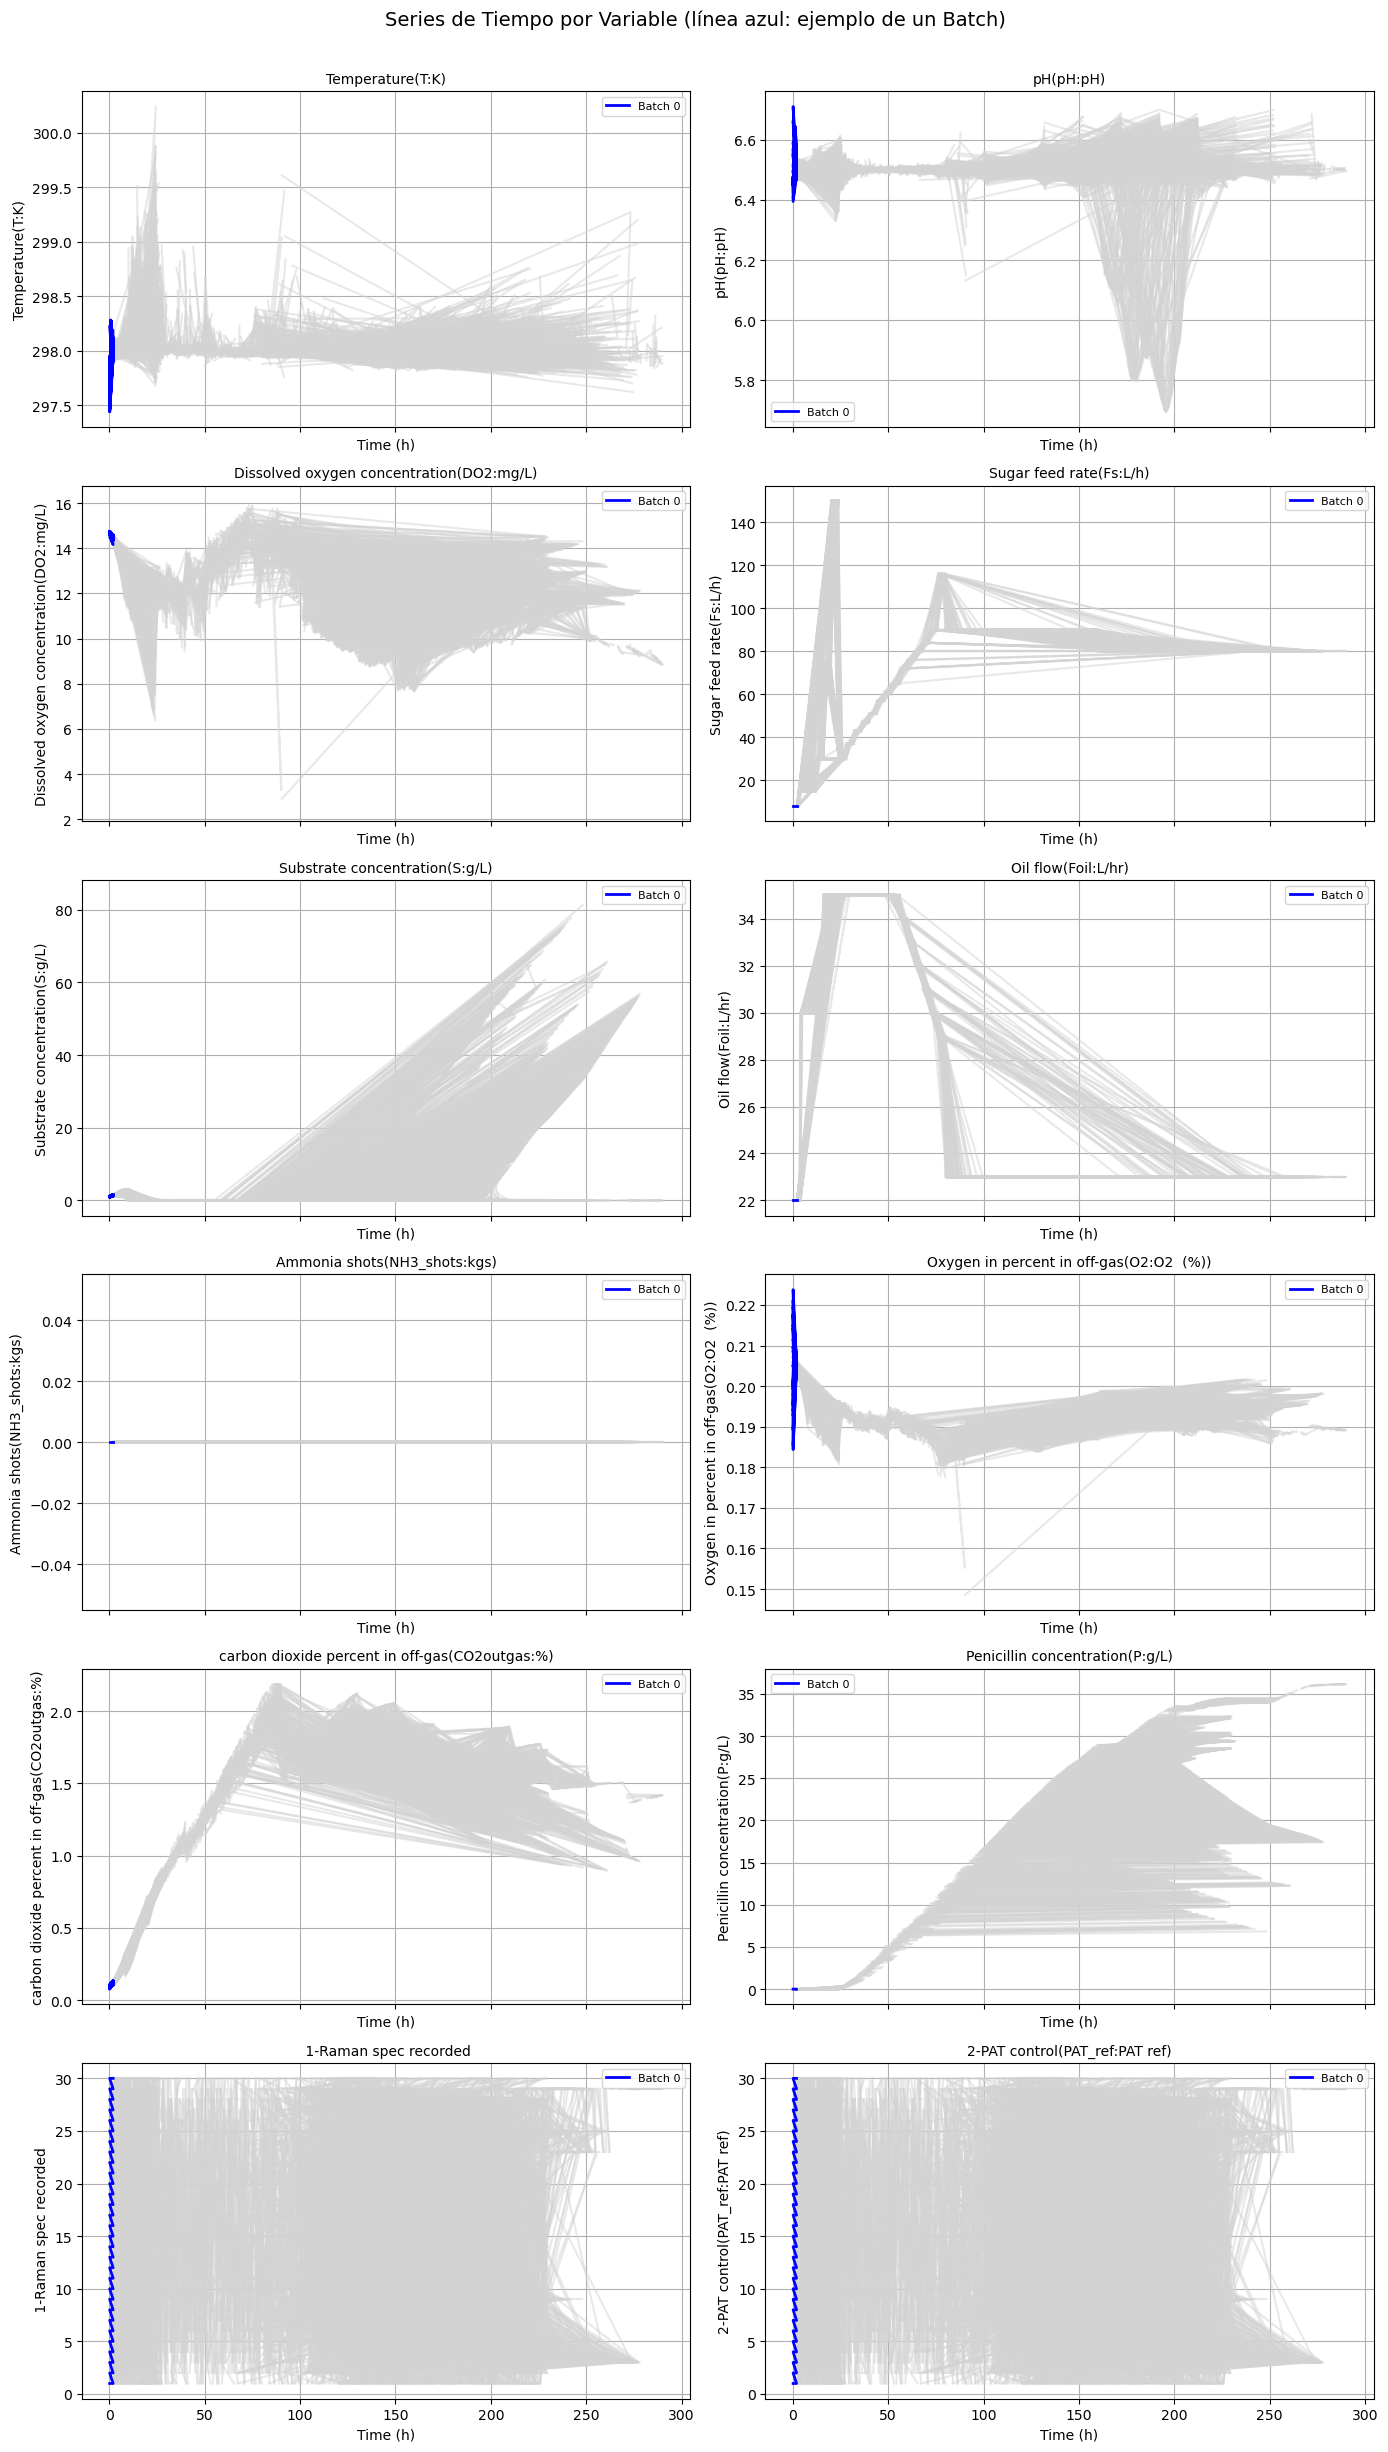

In [ ]:
# Graficar cada variable en un gráfico separado, mostrando todas las líneas de Batch ID en gris y resaltando una línea ejemplo
import matplotlib.pyplot as plt

n = len(df_columns)
n_cols = 2
n_rows = -(-n // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows), sharex=True)
axes = axes.flatten()

for i, col in enumerate(df_columns):
    ax = axes[i]
    # Graficar todas las líneas en gris claro
    for batch_id, group in df_lote_1.groupby('Batch ID'):
        ax.plot(group['Time (h)'], group[col], color='lightgray', alpha=0.5)
    # Resaltar la primera línea como ejemplo
    first_batch_id = df_lote_1['Batch ID'].unique()[0]
    group = l1[l1['Batch ID'] == first_batch_id]
    ax.plot(group['Time (h)'], group[col], color='blue', label=f'Batch {int(first_batch_id)}', linewidth=2)
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('Time (h)')
    ax.set_ylabel(col)
    ax.grid(True)
    ax.legend(loc='best', fontsize=8)

# Quitar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Series de Tiempo por Variable (línea azul: ejemplo de un Batch)', y=1.02, fontsize=14)
plt.show()

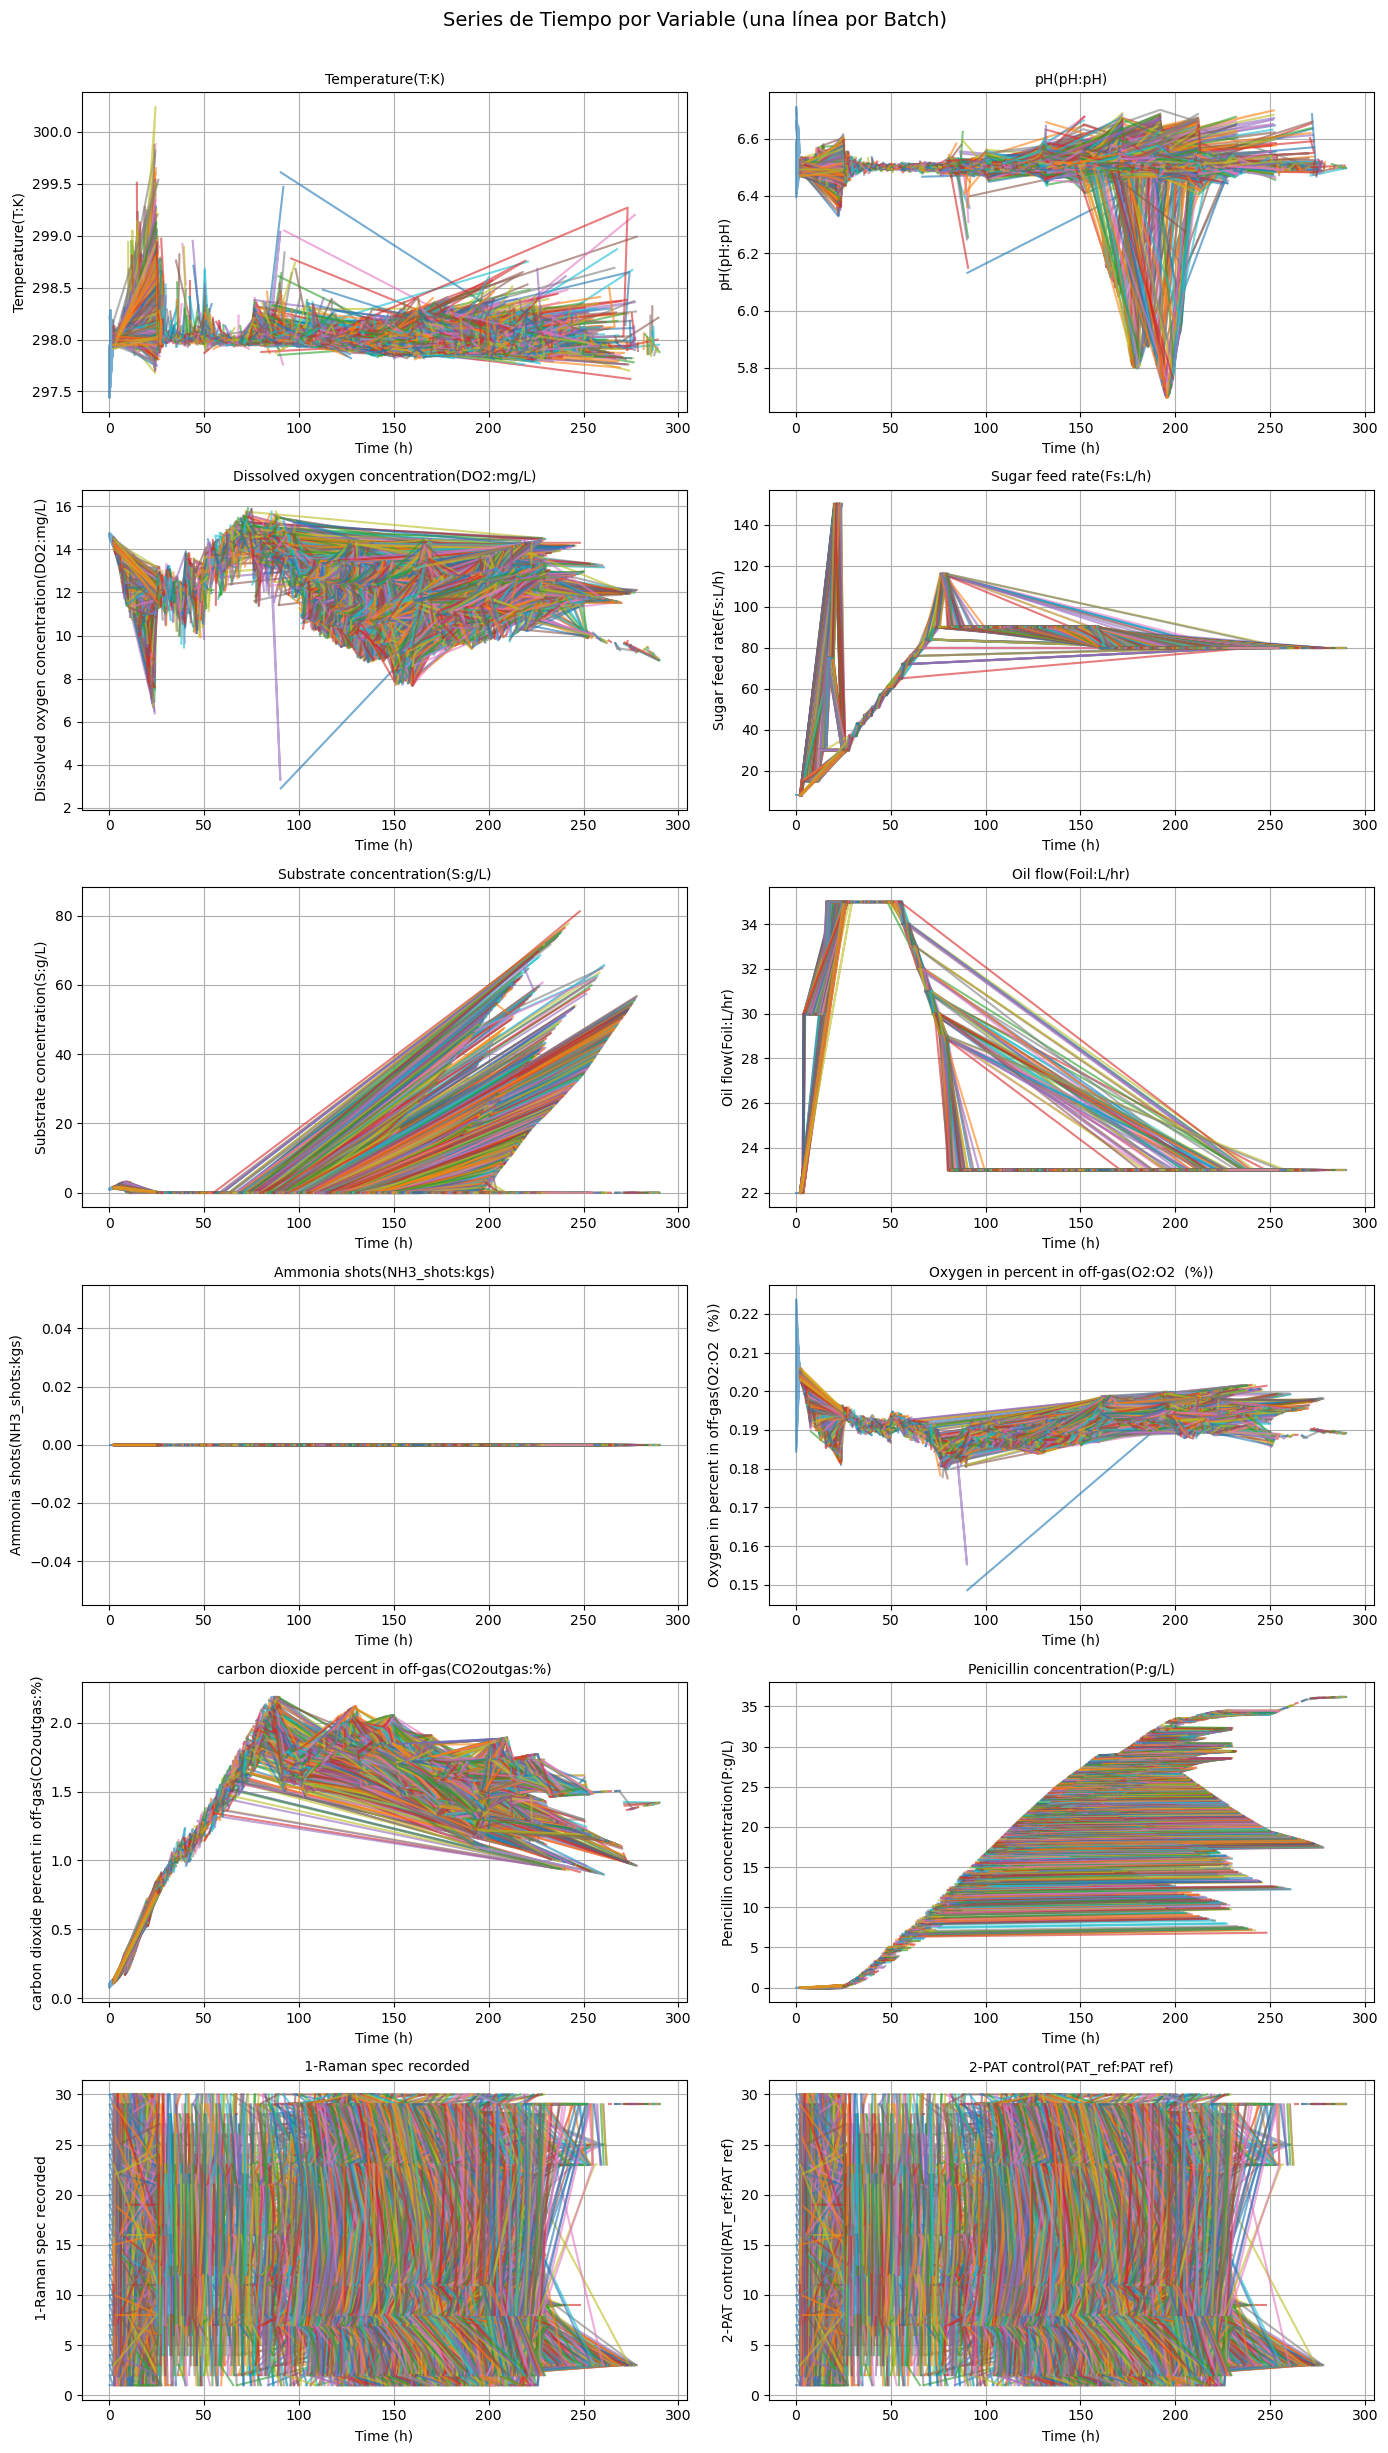

In [ ]:
# Columnas a graficar
cols_to_plot = [
    'Temperature(T:K)',
    'pH(pH:pH)',
    'Dissolved oxygen concentration(DO2:mg/L)',
    'Sugar feed rate(Fs:L/h)',
    'Substrate concentration(S:g/L)',
    'Oil flow(Foil:L/hr)',
    'Ammonia shots(NH3_shots:kgs)',
    'Oxygen in percent in off-gas(O2:O2  (%))',
    'carbon dioxide percent in off-gas(CO2outgas:%)',
    'Penicillin concentration(P:g/L)',
    ' 1-Raman spec recorded',
    '2-PAT control(PAT_ref:PAT ref)'
]

# Parámetros del gráfico
n = len(cols_to_plot)
n_cols = 2
n_rows = -(-n // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows), sharex=False)
axes = axes.flatten()

# Graficar una línea por cada Batch ID
for i, col in enumerate(cols_to_plot):
    ax = axes[i]
    for batch_id, group in b1.groupby('Batch ID'):
        ax.plot(group['Time (h)'], group[col], label=f'Batch {batch_id}', alpha=0.6)
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('Time (h)')
    ax.set_ylabel(col)
    ax.grid(True)

# Quitar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Series de Tiempo por Variable (una línea por Batch)', y=1.02, fontsize=14)
plt.show()


#### **Lote 2**

In [71]:
df_lote_2.describe()

Time (h)  Temperature(T:K)     pH(pH:pH)  \
count  34385.000000      34385.000000  34385.000000   
mean     115.166526        298.023826      6.501528   
std       66.936651          0.158556      0.039866   
min        0.200000        297.350000      5.823400   
25%       57.400000        297.950000      6.493500   
50%      114.800000        297.990000      6.501100   
75%      172.000000        298.050000      6.509100   
max      262.000000        300.240000      6.758900   

       Dissolved oxygen concentration(DO2:mg/L)  Sugar feed rate(Fs:L/h)  \
count                              34385.000000             34385.000000   
mean                                  12.585432                78.165334   
std                                    1.632831                28.567873   
min                                    1.000000                 8.000000   
25%                                   11.655000                60.000000   
50%                                   12.765000                90.000000   
75%                                   13.733000                90.000000   
max                                   16.451000               150.000000   

       Substrate concentration(S:g/L)  Oil flow(Foil:L/hr)  \
count                    34385.000000         34385.000000   
mean                         4.381573            26.332849   
std                         12.309183             4.946949   
min                          0.000006            22.000000   
25%                          0.001054            23.000000   
50%                          0.001881            23.000000   
75%                          0.028837            30.000000   
max                         96.265000            35.000000   

       Ammonia shots(NH3_shots:kgs)  Oxygen in percent in off-gas(O2:O2  (%))  \
count                       34385.0                              34385.000000   
mean                            0.0                                  0.191580   
std                             0.0                                  0.004328   
min                             0.0                                  0.158430   
25%                             0.0                                  0.188700   
50%                             0.0                                  0.191210   
75%                             0.0                                  0.194250   
max                             0.0                                  0.220290   

       carbon dioxide percent in off-gas(CO2outgas:%)  \
count                                    34385.000000   
mean                                         1.448812   
std                                          0.472095   
min                                          0.076034   
25%                                          1.245500   
50%                                          1.608900   
75%                                          1.772000   
max                                          2.233500   

       Penicillin concentration(P:g/L)  
count                     3.438500e+04  
mean                      1.413284e+01  
std                       9.571818e+00  
min                       1.815400e-25  
25%                       5.697600e+00  
50%                       1.457700e+01  
75%                       2.181300e+01  
max                       3.508800e+01

**Analisis**

**El análisis estadístico descriptivo del Lote 2** revela que: 

La Temperatura (T:K) se mantiene altamente controlada, con un promedio de 298.02 K (aproximadamente 24.87 °C) y una desviación estándar de solo 0.16, dentro de un rango estrecho de 297.35 K a 300.24 K, lo cual es esperable en procesos biotecnológicos que requieren condiciones térmicas estables.

La variable pH también muestra una baja variabilidad (std = 0.0399), con un promedio de 6.501 y valores comprendidos entre 5.823 y 6.758, lo que indica un excelente control de la acidez del medio. La concentración de oxígeno disuelto (DO2:mg/L) tiene una media de 12.58 mg/L, con una desviación de 1.63, lo cual refleja una ligera variabilidad fisiológica. El mínimo es de 1.0 mg/L y el máximo de 16.45 mg/L, mostrando que, aunque se mantiene dentro de un rango aceptable, hay momentos de baja oxigenación en el sistema.

En cuanto a la tasa de alimentación de azúcar (Sugar feed rate), se observa un promedio de 78.17 L/h y una desviación estándar considerable de 28.57, lo que indica diferencias marcadas en el ritmo de alimentación. La mediana se encuentra en 90 L/h, igual al tercer cuartil, lo que sugiere una concentración de valores altos con algunos puntos bajos que reducen la media. La concentración de sustrato (S:g/L) presenta una media de 4.38 g/L y una desviación muy elevada (12.31), con valores que van desde 0.00006 hasta 96.26 g/L. Esta gran dispersión y el hecho de que la mediana es apenas 0.00188 g/L indican una distribución fuertemente sesgada hacia valores bajos, con posibles picos aislados.

El flujo de aceite (Oil flow) se encuentra en promedio en 26.33 L/h, con una desviación de 4.95, dentro de un rango que va de 22 a 35 L/h, lo que refleja un control moderado. En cambio, la variable Ammonia shots permanece completamente constante en cero, lo que implica que no se adicionó amoníaco durante el lote, por lo que puede descartarse para análisis futuros. En el caso del oxígeno en el gas residual (O2:O2 %), la media es de 0.1915 % con una desviación de 0.0043, y un rango de 0.158 a 0.220 %, lo que evidencia un control estrecho de la aireación del sistema.

El porcentaje de dióxido de carbono en el off-gas (CO2outgas) tiene una media de 1.45 % y una desviación de 0.47, lo que indica una mayor variabilidad metabólica en comparación con el oxígeno, con valores que van desde 0.076 hasta 2.233 %. Por último, podemos evidenciar que la concentración de penicilina (P:g/L) tiene un promedio de 14.13 g/L, con una desviación de 9.57. La mediana (14.58) es cercana a la media, pero el valor mínimo (casi cero) y el máximo (35.08) reflejan una gran dispersión en la producción del antibiótico.

In [72]:
print(df_lote_2.nunique())

Time (h)                                           1310
Temperature(T:K)                                    209
pH(pH:pH)                                          2250
Dissolved oxygen concentration(DO2:mg/L)           7811
Sugar feed rate(Fs:L/h)                              23
Substrate concentration(S:g/L)                    27471
Oil flow(Foil:L/hr)                                   9
Ammonia shots(NH3_shots:kgs)                          1
Oxygen in percent in off-gas(O2:O2  (%))           2559
carbon dioxide percent in off-gas(CO2outgas:%)    14762
Penicillin concentration(P:g/L)                   25432
dtype: int64


**Analisis**

**En el análisis de valores únicos en el Lote 2** Se observa que variables como la concentración de sustrato (27,471), concentración de penicilina (25,432) y oxígeno disuelto (7,811) presentan una alta diversidad de registros. Asimismo, el porcentaje de CO₂ en el gas residual (14,762) y el porcentaje de O₂ (2,559) también reflejan buena granularidad para el monitoreo de la actividad metabólica del hongo.

Por el contrario, variables como el flujo de aceite (9 valores únicos) y la tasa de alimentación de azúcar (23 valores únicos) tienen una resolución baja, posiblemente porque se controlan en niveles discretos. El caso de Ammonia shots, con un único valor (0), indica que esta variable no varió durante el lote y puede ser descartada en análisis posteriores. En conjunto, este perfil de unicidad permite identificar qué variables aportan mayor variabilidad al proceso y son más útiles para el modelado, así como aquellas con información limitada o invariable.

In [73]:
df_lote_2.var()

Time (h)                                          4480.515207
Temperature(T:K)                                     0.025140
pH(pH:pH)                                            0.001589
Dissolved oxygen concentration(DO2:mg/L)             2.666138
Sugar feed rate(Fs:L/h)                            816.123345
Substrate concentration(S:g/L)                     151.515985
Oil flow(Foil:L/hr)                                 24.472300
Ammonia shots(NH3_shots:kgs)                         0.000000
Oxygen in percent in off-gas(O2:O2  (%))             0.000019
carbon dioxide percent in off-gas(CO2outgas:%)       0.222874
Penicillin concentration(P:g/L)                     91.619706
dtype: float64

**Analisis**

**El análisis de varianza para el Lote 2**  destaca la tasa de alimentación de azúcar (Sugar feed rate) con una varianza de 816.12, lo que sugiere que esta variable fue ajustada frecuentemente o manejada en distintos niveles operativos. Le siguen la concentración de sustrato (151.52) y la concentración de penicilina (91.62), reflejando fluctuaciones considerables en estos dos parámetros críticos para la eficiencia del proceso.

En contraste, variables como la temperatura (0.025) y el pH (0.0016) tienen varianzas muy bajas, lo que sugiere que fueron mantenidas bajo un control estricto durante el lote. Del mismo modo, el oxígeno en el gas residual (0.000019) muestra una variabilidad mínima, acorde con sistemas regulados de aireación. La variable Ammonia shots tiene varianza cero, lo que corrobora que no se usó en este lote. Por su parte, el porcentaje de CO₂ en el gas residual y el flujo de aceite presentan varianzas intermedias, indicando cierta dinámica, aunque dentro de límites relativamente estables.

En conjunto, esta distribución de varianzas sugiere que mientras algunas variables operativas se mantuvieron constantes como parte del proceso (temperatura, pH, O₂), otras fueron más dinámicas y podrían tener un mayor peso explicativo en la variabilidad de la producción de penicilina, siendo especialmente relevantes para la modelación predictiva.

In [74]:
df_lote_2.cov()

Time (h)  Temperature(T:K)  \
Time (h)                                        4480.515207         -3.365938   
Temperature(T:K)                                  -3.365938          0.025140   
pH(pH:pH)                                          0.408196         -0.000376   
Dissolved oxygen concentration(DO2:mg/L)         -16.131679         -0.003867   
Sugar feed rate(Fs:L/h)                          861.528336         -0.603435   
Substrate concentration(S:g/L)                   397.298610         -0.050093   
Oil flow(Foil:L/hr)                             -245.201951          0.262123   
Ammonia shots(NH3_shots:kgs)                       0.000000          0.000000   
Oxygen in percent in off-gas(O2:O2  (%))           0.043060         -0.000045   
carbon dioxide percent in off-gas(CO2outgas:%)    16.893636         -0.020436   
Penicillin concentration(P:g/L)                  554.679624         -0.543056   

                                                pH(pH:pH)  \
Time (h)                                         0.408196   
Temperature(T:K)                                -0.000376   
pH(pH:pH)                                        0.001589   
Dissolved oxygen concentration(DO2:mg/L)         0.002016   
Sugar feed rate(Fs:L/h)                         -0.093766   
Substrate concentration(S:g/L)                   0.056351   
Oil flow(Foil:L/hr)                             -0.033483   
Ammonia shots(NH3_shots:kgs)                     0.000000   
Oxygen in percent in off-gas(O2:O2  (%))         0.000026   
carbon dioxide percent in off-gas(CO2outgas:%)   0.000740   
Penicillin concentration(P:g/L)                  0.042316   

                                                Dissolved oxygen concentration(DO2:mg/L)  \
Time (h)                                                                      -16.131679   
Temperature(T:K)                                                               -0.003867   
pH(pH:pH)                                                                       0.002016   
Dissolved oxygen concentration(DO2:mg/L)                                        2.666138   
Sugar feed rate(Fs:L/h)                                                        -9.872215   
Substrate concentration(S:g/L)                                                  2.489059   
Oil flow(Foil:L/hr)                                                             0.490215   
Ammonia shots(NH3_shots:kgs)                                                    0.000000   
Oxygen in percent in off-gas(O2:O2  (%))                                        0.001596   
carbon dioxide percent in off-gas(CO2outgas:%)                                 -0.072520   
Penicillin concentration(P:g/L)                                                -3.642179   

                                                Sugar feed rate(Fs:L/h)  \
Time (h)                                                     861.528336   
Temperature(T:K)                                              -0.603435   
pH(pH:pH)                                                     -0.093766   
Dissolved oxygen concentration(DO2:mg/L)                      -9.872215   
Sugar feed rate(Fs:L/h)                                      816.123345   
Substrate concentration(S:g/L)                                32.425550   
Oil flow(Foil:L/hr)                                          -49.860320   
Ammonia shots(NH3_shots:kgs)                                   0.000000   
Oxygen in percent in off-gas(O2:O2  (%))                      -0.066187   
carbon dioxide percent in off-gas(CO2outgas:%)                 8.415517   
Penicillin concentration(P:g/L)                              135.482515   

                                                Substrate concentration(S:g/L)  \
Time (h)                                                            397.298610   
Temperature(T:K)                                                     -0.050093   
pH(pH:pH)                                                             0.056351   
Dissolved o

**Analisis**

**El análisis de la matriz de covarianzas del Lote 2** permite observar cómo varían conjuntamente las variables del proceso de fermentación. La covarianza más alta con la concentración de penicilina se presenta con Time (h) (554.68), lo que indica que a medida que avanza el tiempo de fermentación, también tiende a incrementarse la producción de penicilina. También se observa una relación positiva con la tasa de alimentación de azúcar (135.48) y con la concentración de sustrato (1.86), lo que sugiere que un mayor suministro de nutrientes favorece la síntesis del antibiótico.

Por otro lado, se presentan covarianzas negativas notables con Oil flow (-36.27) y Dissolved oxygen (-3.64), lo que podría indicar que mayores niveles de agitación o transferencia de oxígeno, asociados al flujo de aceite y a la oxigenación disuelta, pueden tener un efecto inhibitorio sobre la producción de penicilina. También hay una ligera covarianza negativa con la temperatura (-0.54), lo que refuerza la idea de que un incremento térmico puede afectar la estabilidad o la actividad metabólica del hongo productor.

Las relaciones entre otras variables, como el pH, oxígeno en el gas residual y dióxido de carbono en el off-gas, presentan covarianzas cercanas a cero, indicando escasa influencia directa o efectos indirectos menos evidentes sobre la concentración de penicilina. La variable Ammonia shots permanece con covarianza cero frente a todas las demás, confirmando que no se utilizó durante el lote.

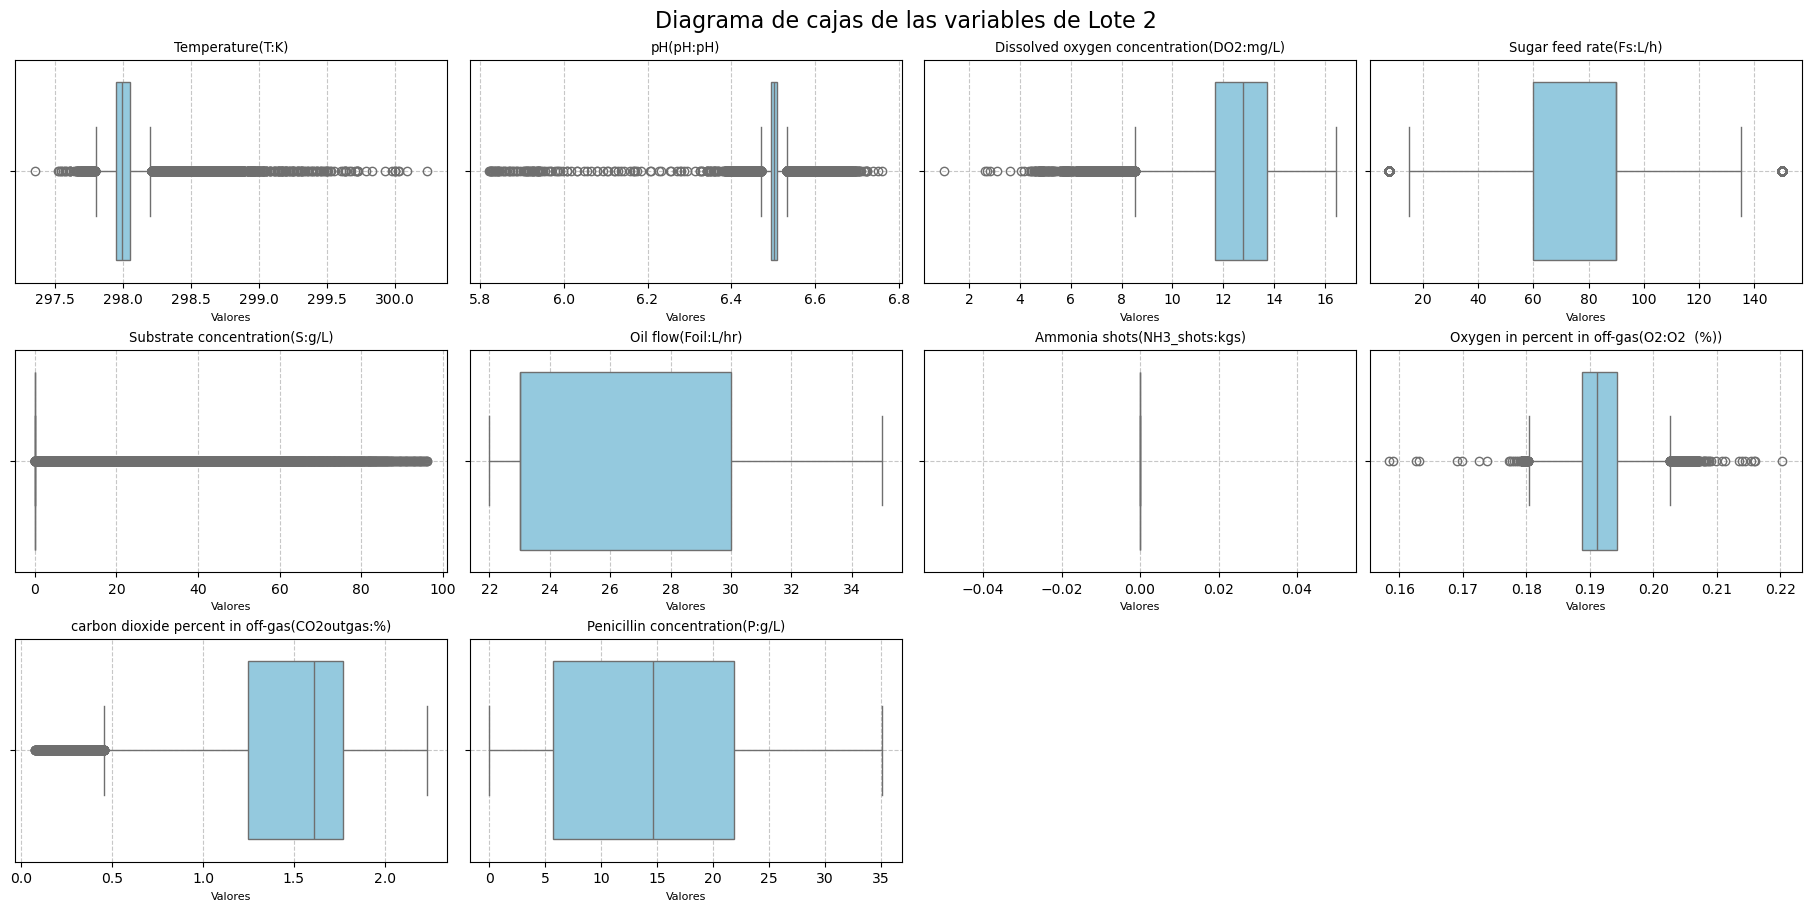

In [149]:
# Parámetros de distribución de subplots
num_columns = 4
num_rows = math.ceil(len(vars_to_plot) / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 3), constrained_layout=True)
axes = axes.flatten()

# Graficar con seaborn
for i, var in enumerate(vars_to_plot):
    if var in df_lote_2.columns:
        sns.boxplot(x=df_lote_2[var], ax=axes[i], orient='h', color='skyblue', linewidth=1)
        axes[i].set_title(var, fontsize=9.5)
        axes[i].set_xlabel('Valores', fontsize=8)
        axes[i].grid(True, linestyle='--', alpha=0.7)
    else:
        axes[i].axis('off')  # Ocultar si no está la columna

# Ocultar subplots vacíos
for j in range(len(vars_to_plot), len(axes)):
    axes[j].axis('off')

plt.suptitle('Diagrama de cajas de las variables de Lote 2', fontsize=16)
plt.show()


**Analisis**

Se evidencia que Temperature (T:K), pH, y Dissolved oxygen concentration (DO2:mg/L) presentan una dispersión bastante controlada, con rangos estrechos y mediana centrada, aunque con algunos outliers leves que no comprometen significativamente la estabilidad del proceso. En particular, la temperatura y el pH muestran cajas compactas, lo cual es coherente con un control estricto en variables críticas.

Por otro lado, la Sugar feed rate (Fs:L/h) y la Substrate concentration (S:g/L) revelan una mayor dispersión. La alimentación de azúcar, aunque tiene una distribución relativamente simétrica, presenta una amplia variabilidad y varios valores extremos. En el caso de la concentración de sustrato, hay una fuerte asimetría hacia la derecha (sesgo positivo), con una gran cantidad de valores cercanos a cero y una larga cola con múltiples outliers, lo cual sugiere acumulaciones puntuales que podrían impactar en la eficiencia del proceso si no son controladas.

El Oil flow (Foil:L/h) muestra una distribución más estable, con una mediana centrada y sin presencia de valores atípicos, lo que sugiere un comportamiento constante durante el lote. En contraste, la variable Ammonia shots permanece completamente constante, lo que se refleja en un boxplot sin variabilidad, indicando que no fue aplicada en este lote.

Las variables asociadas al gas residual —Oxygen in percent in off-gas (O₂:O₂ (%)) y carbon dioxide percent in off-gas (CO₂ outgas)— evidencian distribución compacta pero con múltiples outliers en ambos extremos, lo que podría reflejar fluctuaciones fisiológicas típicas del metabolismo microbiano. Finalmente, la concentración de penicilina (P:g/L) presenta una distribución relativamente simétrica con una dispersión moderada y algunos valores extremos altos.

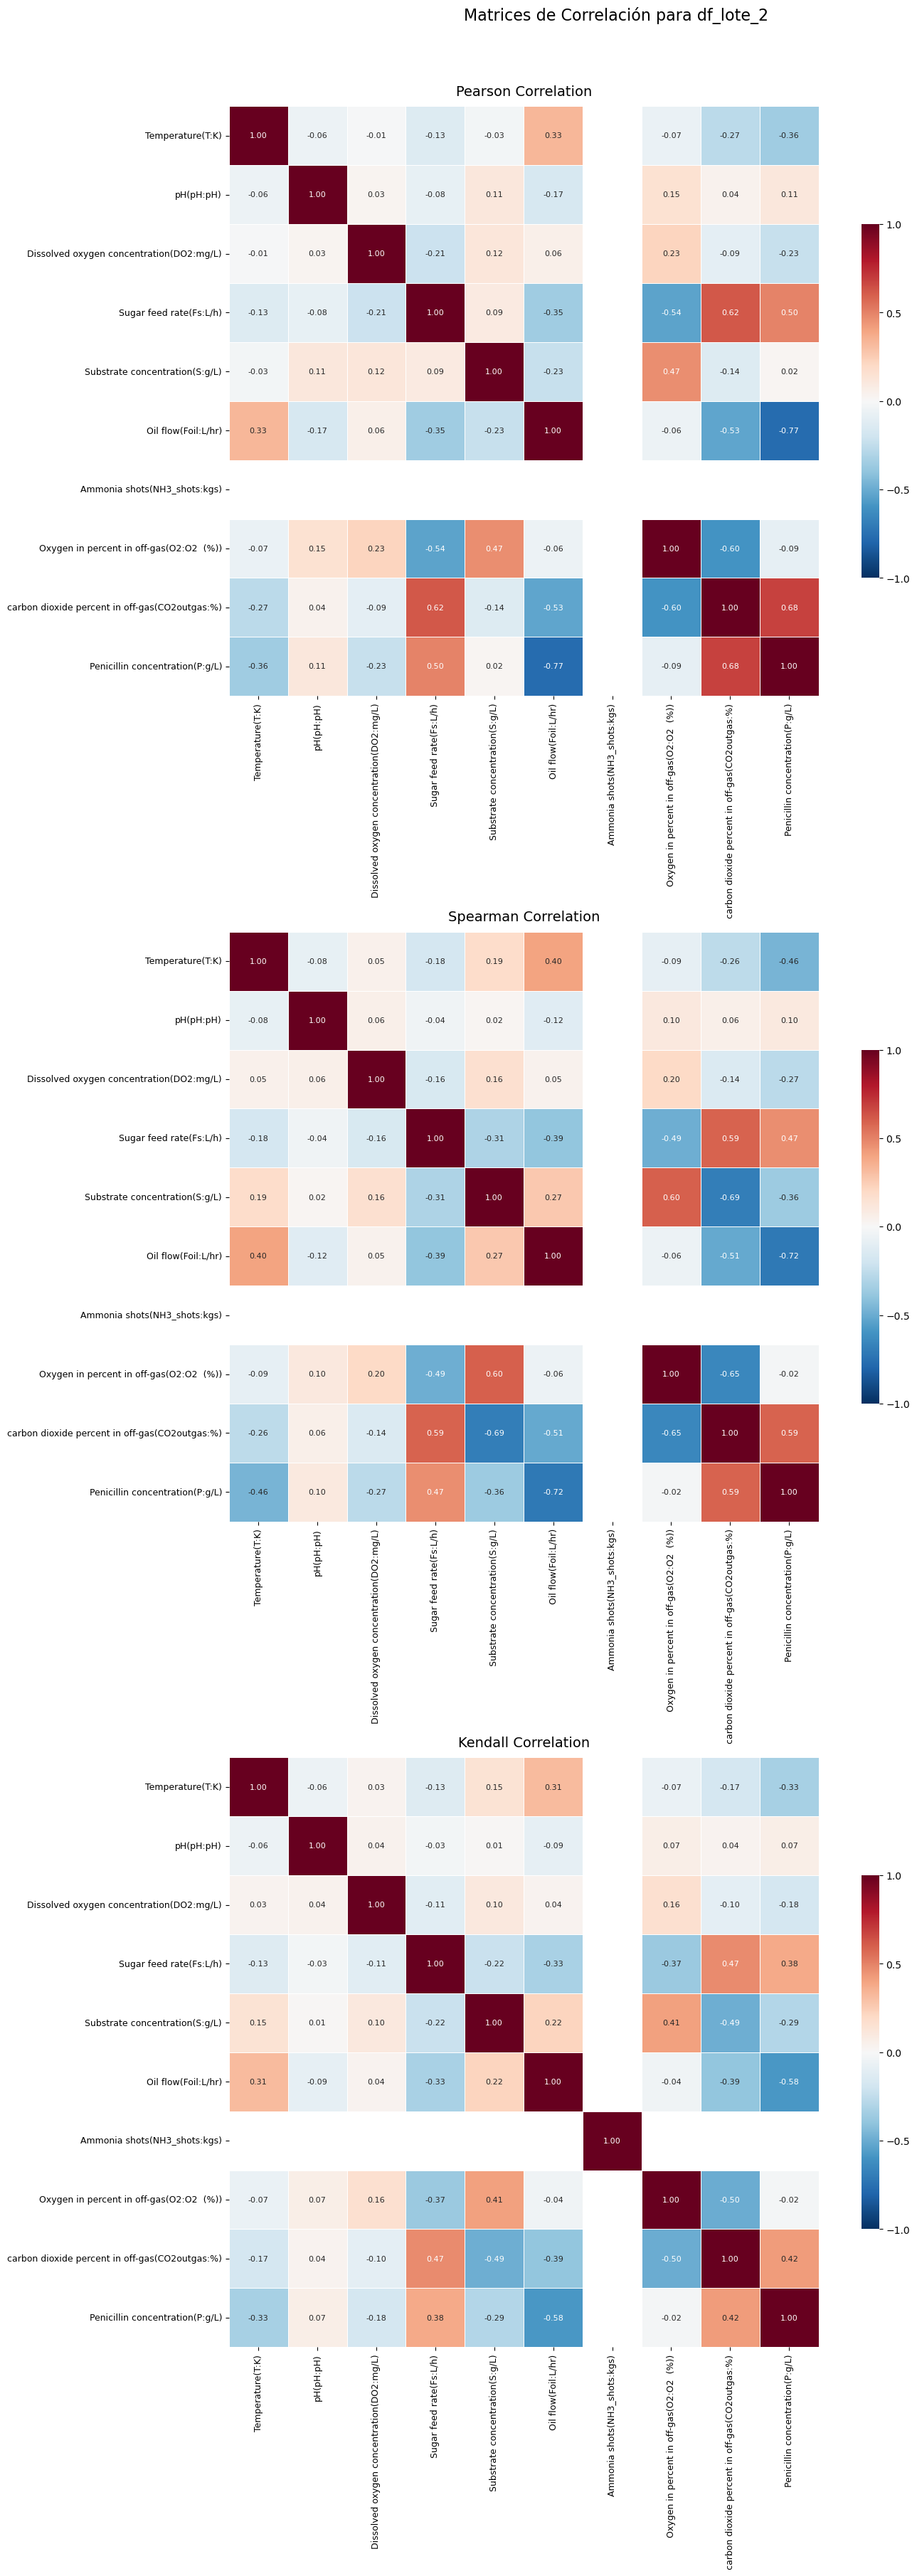

In [128]:
df_sub = df_lote_2[vars_to_plot]

# Cálculo de las matrices de correlación
corr_methods = {
    'Pearson': df_sub.corr(method='pearson'),
    'Spearman': df_sub.corr(method='spearman'),
    'Kendall': df_sub.corr(method='kendall')
}

# Crear figura con 3 filas, 1 columna
fig, axes = plt.subplots(3, 1, figsize=(15, 35))

# Ajustar márgenes y espacios
plt.subplots_adjust(hspace=0.4, left=0.05, right=0.85, top=0.95, bottom=0.05)

for ax, (title, mat) in zip(axes, corr_methods.items()):
    sns.heatmap(
        mat,
        ax=ax,
        cmap='RdBu_r',
        vmin=-1, vmax=1,
        annot=True,
        fmt=".2f",
        annot_kws={'size':8},
        cbar=True,
        cbar_kws={
            'shrink': 0.6,
            'ticks': [-1, -0.5, 0, 0.5, 1]
        },
        square=True,
        linewidths=0.5
    )
    ax.set_title(f'{title} Correlation', fontsize=14, pad=11)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

plt.suptitle('Matrices de Correlación para df_lote_2', fontsize=16, y=0.99)
plt.show()

**Analisis**

**Correlación de Pearson con la concentración de penicilina:**

La correlación más fuerte es de tipo negativa y se da con el flujo de aceite (Oil flow), con un coeficiente de -0.77, lo cual indica que a medida que aumenta el flujo de aceite, disminuye significativamente la producción de penicilina.

En contraste, se identifican correlaciones positivas moderadas con el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas) (0.68) y con la tasa de alimentación de azúcar (Sugar feed rate) (0.50), lo que sugiere que estas variables están asociadas con una mayor actividad metabólica y, por tanto, con una mayor síntesis del antibiótico. Estas correlaciones refuerzan la hipótesis de que un suministro adecuado de fuente de carbono y una alta actividad respiratoria del microorganismo favorecen la producción.

Otras variables como el oxígeno disuelto (DO2:mg/L) presentan una correlación positiva leve (0.23), mientras que la temperatura (T:K) muestra una correlación negativa más débil (-0.36), indicando que temperaturas elevadas podrían estar afectando la estabilidad del proceso o inhibiendo la producción del metabolito. El pH (0.11) y la concentración de sustrato (S:g/L) (0.02) muestran correlaciones prácticamente nulas, lo que sugiere que no tienen una relación lineal directa significativa con la concentración de penicilina en este lote.

**Correlación de Spearman con la concentración de penicilina:**

La correlación negativa más fuerte se presenta con el flujo de aceite (Oil flow), con un coeficiente de -0.72, lo que indica que, incluso considerando relaciones no lineales, un mayor flujo de aceite sigue asociado de forma consistente con una menor producción de penicilina. Esta tendencia se alinea con lo observado en el análisis de Pearson y sugiere un efecto inhibidor estable en diferentes rangos de valores.

En contraste, se observan correlaciones positivas moderadas entre la concentración de penicilina y la tasa de alimentación de azúcar (Sugar feed rate) (0.47) y el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas) (0.59). Estas asociaciones refuerzan la hipótesis de que el suministro de fuentes de carbono y una mayor tasa metabólica microbiana (reflejada en la evolución de CO₂) favorecen la biosíntesis del antibiótico.

También se identifican correlaciones negativas de menor magnitud con otras variables como la temperatura (T:K) (-0.46), la concentración de oxígeno disuelto (DO₂) (-0.27), y la concentración de sustrato (S:g/L) (-0.36), lo cual indica que estas variables, cuando aumentan, tienden a estar asociadas con una disminución en la producción, aunque con menor consistencia o fuerza que el flujo de aceite.

Por otro lado, variables como el pH (0.10) y el oxígeno en el gas residual (-0.02) muestran correlaciones muy débiles, y Ammonia shots no presenta datos válidos para esta correlación por mantenerse constante en este lote.

**Correlación de Kendall con la concentración de penicilina:**

El análisis de la matriz de correlación de Kendall para el Lote 2 reafirma las tendencias observadas en Pearson y Spearman, aunque con coeficientes más conservadores, La concentración de penicilina presenta su correlación negativa más fuerte con el flujo de aceite (Oil flow) con un valor de -0.58, confirmando que, incluso en relaciones monótonas parciales, un mayor flujo de aceite está asociado a una menor producción de penicilina.

Se observan correlaciones positivas moderadas con el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas) (0.42) y con la tasa de alimentación de azúcar (Sugar feed rate) (0.38), lo que continúa señalando a estas variables como indicadoras de una mayor actividad metabólica y una mayor eficiencia del proceso de biosíntesis del antibiótico.

Por otra parte, también se identifican correlaciones negativas con otras variables como la temperatura (T:K) (-0.33), la concentración de oxígeno disuelto (DO2:mg/L) (-0.18) y la concentración de sustrato (S:g/L) (-0.29), aunque más débiles, lo cual sugiere que estos factores podrían tener un efecto perjudicial en ciertos rangos del proceso, pero no de manera tan consistente como las variables antes mencionadas.

**Conclusión general del análisis del Lote 2**

Con base en el análisis de correlación del Lote 2, se puede concluir que el flujo de aceite (Oil flow) es la variable más críticamente asociada de forma negativa con la concentración de penicilina, mostrando una relación consistente en todos los métodos de correlación aplicados (Pearson, Spearman y Kendall). Esta fuerte relación inversa sugiere que un aumento en el flujo de aceite podría estar inhibiendo el proceso de biosíntesis del antibiótico, convirtiéndose en un factor clave a controlar.

Por otro lado, tanto la tasa de alimentación de azúcar (Sugar feed rate) como el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas) muestran correlaciones positivas moderadas con la concentración de penicilina, lo que respalda la hipótesis de que una mayor disponibilidad de fuente de carbono y una mayor actividad metabólica del microorganismo favorecen la producción del antibiótico. Estas variables podrían ser consideradas indicadores clave de desempeño dentro del proceso.

Variables como la temperatura, la concentración de oxígeno disuelto y la concentración de sustrato muestran correlaciones negativas, aunque con menor fuerza, lo cual sugiere que bajo ciertas condiciones podrían afectar negativamente la producción de penicilina, posiblemente alterando el equilibrio del medio o interfiriendo en la ruta metabólica de síntesis.

#### **Lote 3**

In [78]:
df_lote_3.describe()

Time (h)  Temperature(T:K)     pH(pH:pH)  \
count  33700.000000      33700.000000  33700.000000   
mean     112.940356        298.014819      6.492481   
std       65.638008          0.139688      0.073176   
min        0.200000        297.510000      5.395700   
25%       56.200000        297.950000      6.492300   
50%      112.400000        297.990000      6.500500   
75%      168.600000        298.030000      6.508000   
max      241.000000        300.860000      6.688500   

       Dissolved oxygen concentration(DO2:mg/L)  Sugar feed rate(Fs:L/h)  \
count                              33700.000000             33700.000000   
mean                                  12.455207                76.505935   
std                                    1.343510                24.013906   
min                                    2.693200                 8.000000   
25%                                   11.581000                76.000000   
50%                                   12.344500                80.000000   
75%                                   13.339000                90.000000   
max                                   16.270000               150.000000   

       Substrate concentration(S:g/L)  Oil flow(Foil:L/hr)  \
count                    33700.000000         33700.000000   
mean                         0.087761            26.400593   
std                          0.380756             4.973869   
min                          0.000097            22.000000   
25%                          0.000947            23.000000   
50%                          0.001329            23.000000   
75%                          0.002080            30.000000   
max                          3.211400            35.000000   

       Ammonia shots(NH3_shots:kgs)  Oxygen in percent in off-gas(O2:O2  (%))  \
count                       33700.0                              33700.000000   
mean                            0.0                                  0.190789   
std                             0.0                                  0.003712   
min                             0.0                                  0.155470   
25%                             0.0                                  0.188750   
50%                             0.0                                  0.190830   
75%                             0.0                                  0.192670   
max                             0.0                                  0.227510   

       carbon dioxide percent in off-gas(CO2outgas:%)  \
count                                    33700.000000   
mean                                         1.476752   
std                                          0.466763   
min                                          0.078794   
25%                                          1.375275   
50%                                          1.633800   
75%                                          1.775100   
max                                          2.192700   

       Penicillin concentration(P:g/L)  
count                     3.370000e+04  
mean                      1.540989e+01  
std                       1.033733e+01  
min                       3.694700e-26  
25%                       5.675875e+00  
50%                       1.656000e+01  
75%                       2.468800e+01  
max                       3.320900e+01

**Analisis**

Con base en el **resumen estadístico del Lote 3,** se observa que la variable la temperatura (T:K) mantiene una media estable de 298.01 K, con baja variabilidad (std: 0.139), lo que indica un control térmico adecuado durante la fermentación. El pH también se mantiene bastante constante, con un valor medio de 6.49 y una desviación estándar de solo 0.073.

En cuanto a las variables relacionadas con la aireación y el metabolismo, la concentración de oxígeno disuelto (DO2) tiene una media de 12.46 mg/L, con un rango entre 2.69 y 16.27 mg/L, lo que evidencia variabilidad en el oxígeno disponible. La tasa de alimentación de azúcar (Fs) tiene un promedio de 76.5 L/h, pero con una alta dispersión (std: 24.01), lo que indica diferencias marcadas en las estrategias de alimentación entre momentos o condiciones del proceso.

La concentración de sustrato (S) destaca por su baja media (0.087 g/L), pero con una desviación relativamente alta (0.38), y un valor máximo de 3.21 g/L, lo que sugiere acumulaciones puntuales o eventos de sobrealimentación. El flujo de aceite (Foil) se encuentra en niveles similares a los lotes anteriores, con una media de 26.40 L/h.

En cuanto a los gases del proceso, el oxígeno en el gas residual (O2) tiene una media de 0.190 % y el CO2 en el gas residual un promedio de 1.47 %, ambos en línea con lo esperado en procesos de alta actividad microbiana. Finalmente, la concentración de penicilina tiene una media de 15.40 g/L, con una desviación estándar de 10.33 y un máximo de 33.20, lo que indica una producción variable que podría estar influenciada por las condiciones previamente descritas.

In [79]:
print(df_lote_3.nunique())

Time (h)                                           1205
Temperature(T:K)                                    193
pH(pH:pH)                                          2225
Dissolved oxygen concentration(DO2:mg/L)           6464
Sugar feed rate(Fs:L/h)                              18
Substrate concentration(S:g/L)                    23910
Oil flow(Foil:L/hr)                                   9
Ammonia shots(NH3_shots:kgs)                          1
Oxygen in percent in off-gas(O2:O2  (%))           2389
carbon dioxide percent in off-gas(CO2outgas:%)    13699
Penicillin concentration(P:g/L)                   24859
dtype: int64


**Analisis**

La variable Time (h) presenta 1.205 valores únicos, lo que sugiere una buena granularidad en las mediciones. Temperature (T:K) y pH tienen 193 y 2.225 valores únicos respectivamente, lo que indica que estas variables, aunque controladas, presentan variaciones suficientes para análisis detallados.

La concentración de oxígeno disuelto (DO2) muestra una alta variabilidad con 6.464 valores únicos, reflejando dinámicas intensas en la disponibilidad de oxígeno durante la fermentación. Similarmente, la concentración de sustrato (S) y la concentración de penicilina (P) también evidencian gran variabilidad, con 23.910 y 24.859 valores únicos respectivamente, lo cual es clave para estudiar el comportamiento del bioproceso y construir modelos predictivos robustos.

Por otro lado, variables como el Oil flow y la Sugar feed rate presentan solo 9 y 18 valores únicos, lo cual puede indicar una dosificación en intervalos definidos o discretos. Finalmente, Ammonia shots muestra solo un valor, lo que implica que no hay variabilidad y podría descartarse del análisis. Esta evaluación preliminar apoya la selección de variables relevantes para análisis exploratorios y modelado de aprendizaje automático.

In [80]:
df_lote_3.var()

Time (h)                                          4308.348085
Temperature(T:K)                                     0.019513
pH(pH:pH)                                            0.005355
Dissolved oxygen concentration(DO2:mg/L)             1.805020
Sugar feed rate(Fs:L/h)                            576.667670
Substrate concentration(S:g/L)                       0.144975
Oil flow(Foil:L/hr)                                 24.739369
Ammonia shots(NH3_shots:kgs)                         0.000000
Oxygen in percent in off-gas(O2:O2  (%))             0.000014
carbon dioxide percent in off-gas(CO2outgas:%)       0.217868
Penicillin concentration(P:g/L)                    106.860415
dtype: float64

**Analisis**

**La varianza de las variables del Lote 3** indica que la variable con mayor varianza es Time (h) con un valor de 4308.35, reflejando una alta diversidad en los registros temporales del proceso. Le siguen Sugar feed rate (Fs:L/h) con 576.67 y Penicillin concentration (P:g/L) con 106.86, lo que indica que tanto la tasa de alimentación de azúcar como la concentración del producto muestran fluctuaciones importantes a lo largo del tiempo, probablemente asociadas a cambios en condiciones de fermentación.

Variables como Oil flow (Foil:L/hr) (24.74) y DO2 (1.85) también presentan varianzas relevantes, lo que sugiere que tienen un comportamiento dinámico durante el lote. En contraste, variables como el pH (0.0055) y la Temperatura (0.0195) tienen baja varianza, lo que indicaría que se mantienen relativamente estables durante el proceso, posiblemente por control automatizado.

La Ammonia shots tiene varianza cero, indicando que su valor es constante en todo el lote, y por tanto, no aporta información útil para análisis predictivos. Finalmente, CO₂ outgas y O₂ off-gas presentan varianzas pequeñas, lo que sugiere cierta estabilidad pero con ligeras variaciones que podrían seguir patrones fisiológicos del microorganismo. En conjunto, este análisis ayuda a priorizar las variables más informativas para modelado y control del proceso.

In [81]:
df_lote_3.cov()

Time (h)  Temperature(T:K)  \
Time (h)                                        4308.348085         -3.338326   
Temperature(T:K)                                  -3.338326          0.019513   
pH(pH:pH)                                          0.311663         -0.000226   
Dissolved oxygen concentration(DO2:mg/L)         -32.187483          0.005723   
Sugar feed rate(Fs:L/h)                          706.757676         -0.542442   
Substrate concentration(S:g/L)                    -9.142981          0.004310   
Oil flow(Foil:L/hr)                             -242.615651          0.242723   
Ammonia shots(NH3_shots:kgs)                       0.000000          0.000000   
Oxygen in percent in off-gas(O2:O2  (%))          -0.004064         -0.000021   
carbon dioxide percent in off-gas(CO2outgas:%)    19.101934         -0.019967   
Penicillin concentration(P:g/L)                  666.806959         -0.546660   

                                                pH(pH:pH)  \
Time (h)                                         0.311663   
Temperature(T:K)                                -0.000226   
pH(pH:pH)                                        0.005355   
Dissolved oxygen concentration(DO2:mg/L)        -0.012382   
Sugar feed rate(Fs:L/h)                         -0.217301   
Substrate concentration(S:g/L)                   0.000736   
Oil flow(Foil:L/hr)                             -0.012477   
Ammonia shots(NH3_shots:kgs)                     0.000000   
Oxygen in percent in off-gas(O2:O2  (%))         0.000033   
carbon dioxide percent in off-gas(CO2outgas:%)  -0.001075   
Penicillin concentration(P:g/L)                  0.054855   

                                                Dissolved oxygen concentration(DO2:mg/L)  \
Time (h)                                                                      -32.187483   
Temperature(T:K)                                                                0.005723   
pH(pH:pH)                                                                      -0.012382   
Dissolved oxygen concentration(DO2:mg/L)                                        1.805020   
Sugar feed rate(Fs:L/h)                                                        -6.968660   
Substrate concentration(S:g/L)                                                  0.098824   
Oil flow(Foil:L/hr)                                                             1.040704   
Ammonia shots(NH3_shots:kgs)                                                    0.000000   
Oxygen in percent in off-gas(O2:O2  (%))                                        0.000308   
carbon dioxide percent in off-gas(CO2outgas:%)                                 -0.012856   
Penicillin concentration(P:g/L)                                                -5.442447   

                                                Sugar feed rate(Fs:L/h)  \
Time (h)                                                     706.757676   
Temperature(T:K)                                              -0.542442   
pH(pH:pH)                                                     -0.217301   
Dissolved oxygen concentration(DO2:mg/L)                      -6.968660   
Sugar feed rate(Fs:L/h)                                      576.667670   
Substrate concentration(S:g/L)                                -5.237581   
Oil flow(Foil:L/hr)                                          -45.230723   
Ammonia shots(NH3_shots:kgs)                                   0.000000   
Oxygen in percent in off-gas(O2:O2  (%))                      -0.062647   
carbon dioxide percent in off-gas(CO2outgas:%)                 8.039171   
Penicillin concentration(P:g/L)                              115.365825   

                                                Substrate concentration(S:g/L)  \
Time (h)                                                             -9.142981   
Temperature(T:K)                                                      0.004310   
pH(pH:pH)                                                             0.000736   
Dissolved o

**Analisis**

**El análisis de la matriz de covarianzas del Lote 3** permite identificar que la covarianza más alta en valor absoluto con respecto a la penicilina se presenta en el flujo de aceite (Oil flow), con un valor de -41.01, lo cual indica una relación inversa: a medida que aumenta el flujo de aceite, la producción de penicilina tiende a disminuir. Esta relación negativa consistente puede estar asociada a un efecto inhibitorio de este componente sobre el metabolismo del hongo o la estabilidad del medio.

En contraste, variables como la tasa de alimentación de azúcar (Sugar feed rate) (115.36) y el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas) (3.11) muestran covarianzas positivas, lo cual sugiere que están relacionadas con un aumento en la producción de penicilina. Estos resultados coinciden con lo esperado, ya que un mayor suministro de sustrato y una mayor actividad respiratoria microbiana (reflejada en el CO₂) son factores favorables para la biosíntesis del antibiótico.

La concentración de oxígeno disuelto (DO2:mg/L) también presenta una covarianza negativa moderada (-5.44), lo cual puede indicar que altos niveles de oxígeno en ciertas fases podrían no ser óptimos para la síntesis del producto. De manera similar, la temperatura (-0.54), el pH (0.05) y la concentración de sustrato (S:g/L) (-1.32) muestran valores de covarianza bajos, lo que sugiere una influencia limitada o menos directa sobre la variable objetivo en este lote específico. Finalmente, variables constantes como Ammonia shots tienen una covarianza nula, por lo que no aportan información relevante en esta etapa.

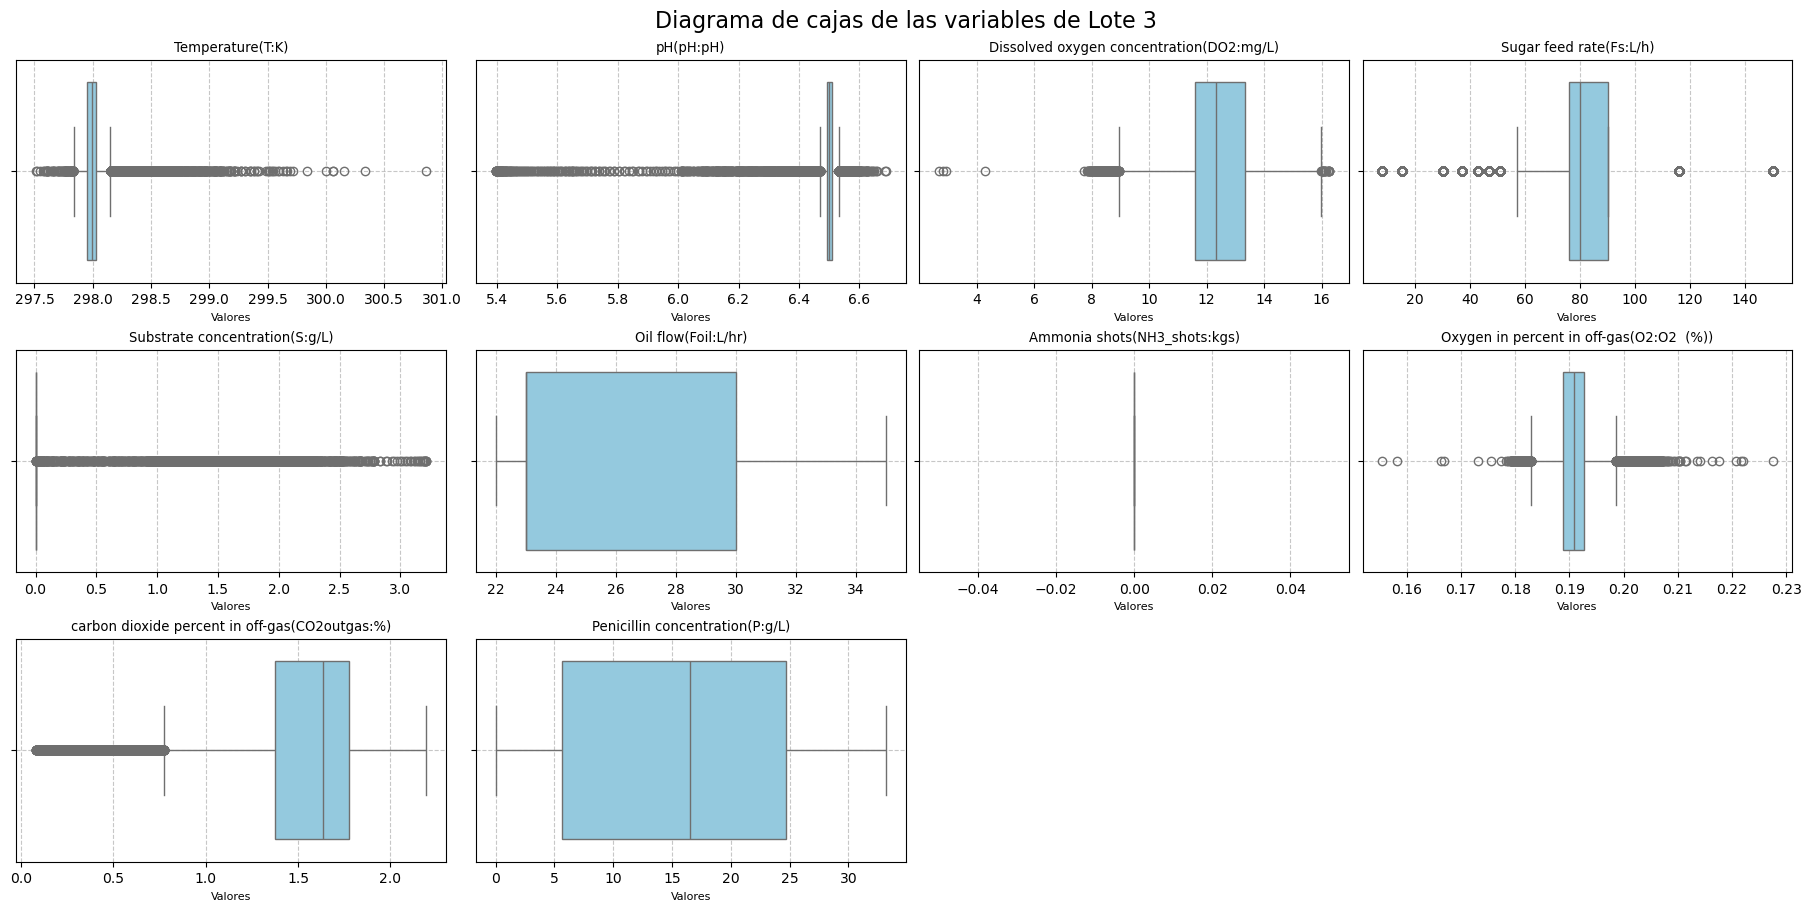

In [151]:
# Parámetros de distribución de subplots
num_columns = 4
num_rows = math.ceil(len(vars_to_plot) / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 3), constrained_layout=True)
axes = axes.flatten()

# Graficar con seaborn
for i, var in enumerate(vars_to_plot):
    if var in df_lote_3.columns:
        sns.boxplot(x=df_lote_3[var], ax=axes[i], orient='h', color='skyblue', linewidth=1)
        axes[i].set_title(var, fontsize=9.5)
        axes[i].set_xlabel('Valores', fontsize=8)
        axes[i].grid(True, linestyle='--', alpha=0.7)
    else:
        axes[i].axis('off')  # Ocultar si no está la columna

# Ocultar subplots vacíos
for j in range(len(vars_to_plot), len(axes)):
    axes[j].axis('off')

plt.suptitle('Diagrama de cajas de las variables de Lote 3', fontsize=16)
plt.show()

**Analisis**

El análisis de los diagramas de caja para las variables del Lote 3 revela importantes características de distribución y posibles valores atípicos. La mayoría de las variables presentan valores extremos (outliers), lo que indica una alta variabilidad o presencia de comportamientos anómalos que deben considerarse durante el preprocesamiento de datos.

La temperatura muestra una distribución muy concentrada alrededor de los 298 K, con algunos valores atípicos superiores, lo que sugiere un control bastante estricto de esta variable durante el proceso. El pH se mantiene también bastante estable, aunque con leve asimetría y algunos valores fuera del rango intercuartílico, lo que indica ligeras fluctuaciones en la acidez del medio.

La concentración de oxígeno disuelto (DO2) y la tasa de alimentación de azúcar (Sugar feed rate) presentan una distribución más amplia, con una gran cantidad de valores extremos, lo cual podría indicar fases del proceso con requerimientos distintos de oxígeno y nutrientes, o comportamientos anómalos que deben ser inspeccionados. La concentración de sustrato (S) evidencia una fuerte asimetría positiva, con muchos valores bajos y algunos valores extremos altos, lo que sugiere acumulación puntual de sustrato en ciertas condiciones.

El flujo de aceite (Oil flow) muestra una distribución más equilibrada, aunque con cierta dispersión, lo cual es consistente con su rol de soporte pero también podría estar relacionado con su efecto inverso en la producción de penicilina. Por su parte, el porcentaje de oxígeno en el gas residual y el porcentaje de dióxido de carbono (CO2) presentan datos más concentrados, aunque con outliers, especialmente en el caso del CO2, lo que podría estar reflejando picos en la actividad metabólica del hongo.

Por último, la concentración de penicilina, variable objetivo del análisis, muestra una distribución relativamente simétrica, lo cual es esperable en un proceso de producción biotecnológica donde pueden existir variaciones por condiciones no controladas del proceso o por respuestas fisiológicas del microorganismo.

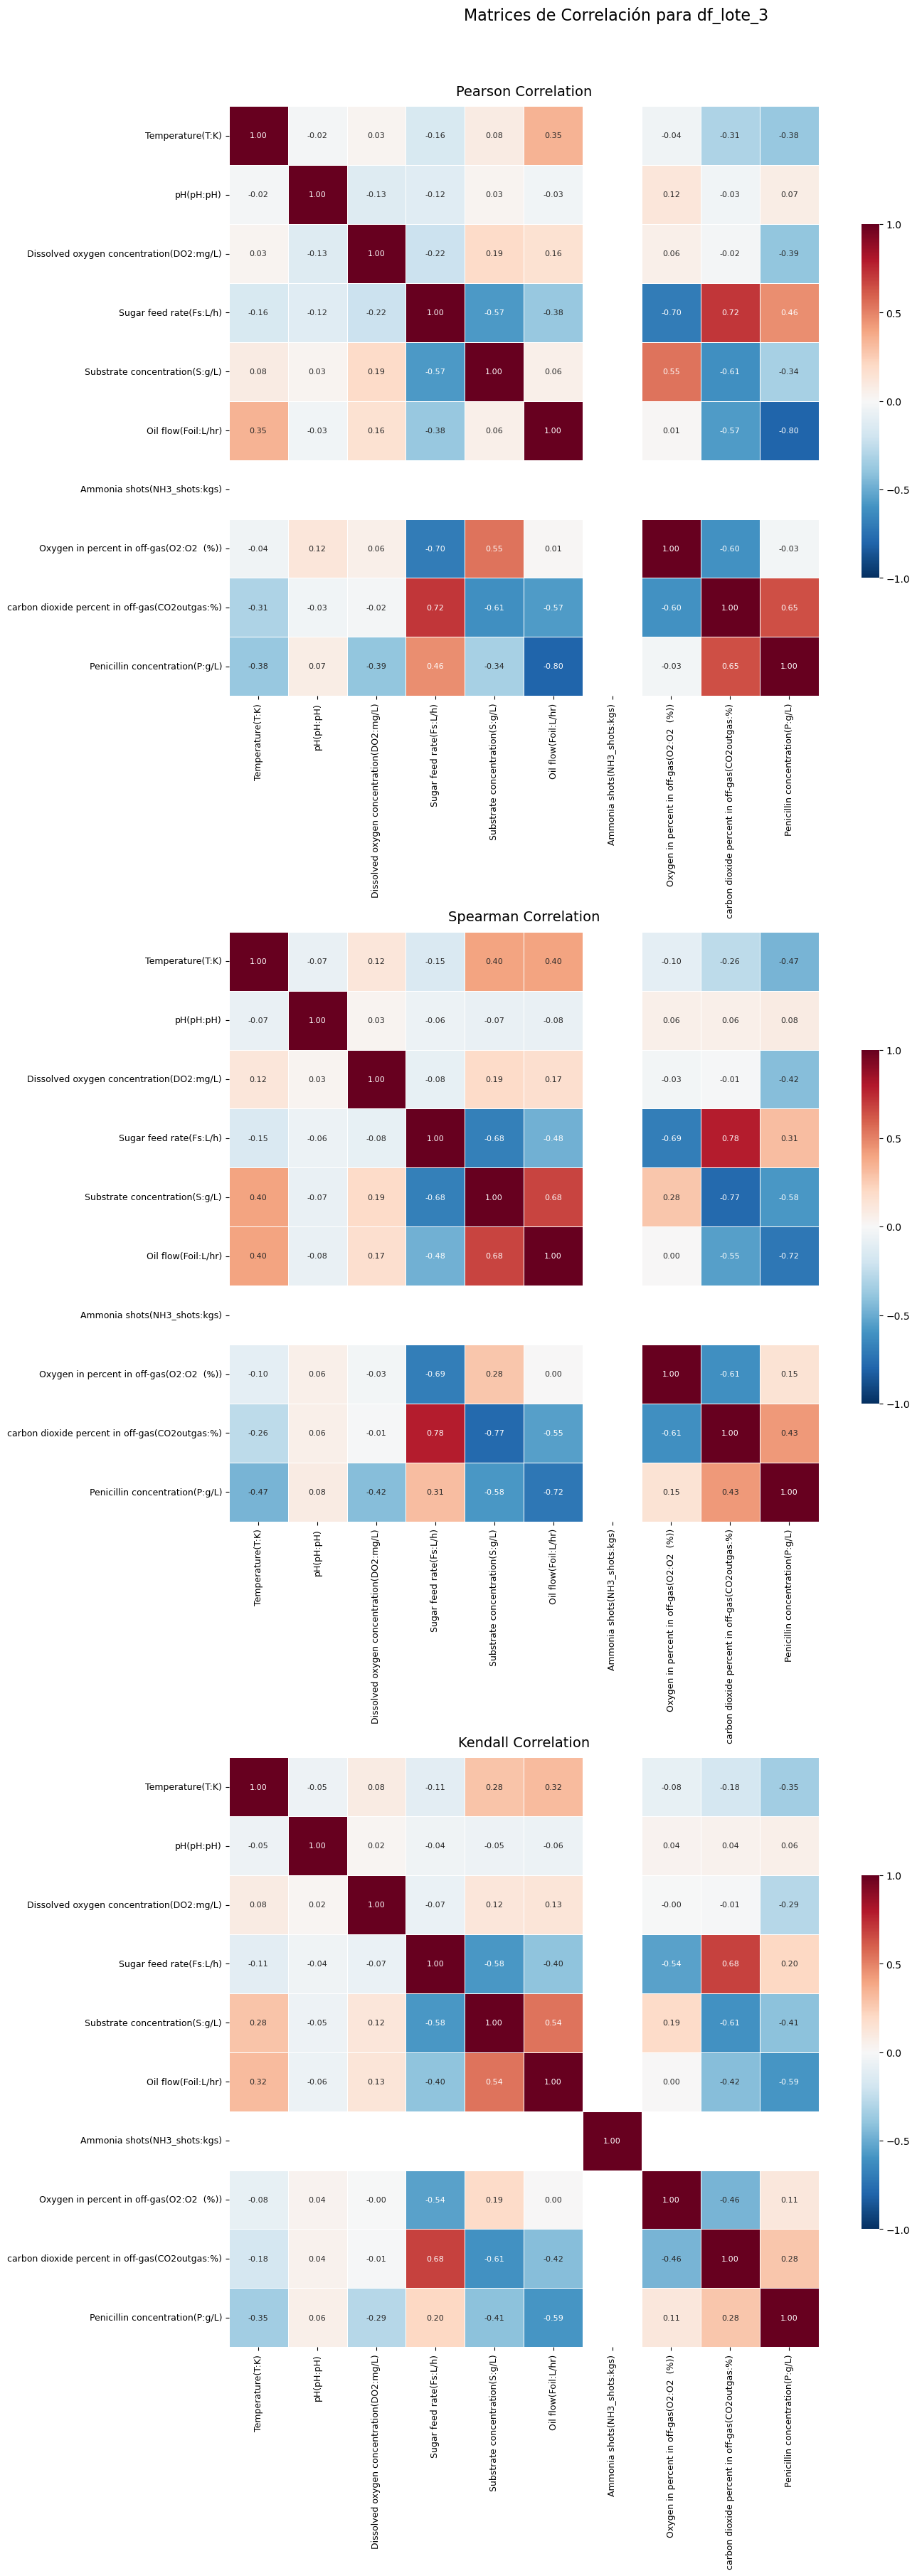

In [124]:
df_sub = df_lote_3[vars_to_plot]

# Cálculo de las matrices de correlación
corr_methods = {
    'Pearson': df_sub.corr(method='pearson'),
    'Spearman': df_sub.corr(method='spearman'),
    'Kendall': df_sub.corr(method='kendall')
}

# Crear figura con 3 filas, 1 columna
fig, axes = plt.subplots(3, 1, figsize=(15, 35))

# Ajustar márgenes y espacios
plt.subplots_adjust(hspace=0.4, left=0.05, right=0.85, top=0.95, bottom=0.05)

for ax, (title, mat) in zip(axes, corr_methods.items()):
    sns.heatmap(
        mat,
        ax=ax,
        cmap='RdBu_r',
        vmin=-1, vmax=1,
        annot=True,
        fmt=".2f",
        annot_kws={'size':8},
        cbar=True,
        cbar_kws={
            'shrink': 0.6,
            'ticks': [-1, -0.5, 0, 0.5, 1]
        },
        square=True,
        linewidths=0.5
    )
    ax.set_title(f'{title} Correlation', fontsize=14, pad=11)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

plt.suptitle('Matrices de Correlación para df_lote_3', fontsize=16, y=0.99)
plt.show()

**Analisis**

**Correlación de Pearson con la concentración de penicilina:**

**El análisis de correlación de Pearson para el Lote 3** revela que la relación negativa más fuerte se observa con el flujo de aceite (Oil flow), que presenta un coeficiente de -0.80, lo que indica que a medida que aumenta esta variable, la producción de penicilina tiende a disminuir considerablemente. Esta correlación es consistente con lo hallado en los lotes anteriores y refuerza la hipótesis de un posible efecto inhibidor del aceite en la biosíntesis del antibiótico.

Por otro lado, se identifican correlaciones positivas moderadas con variables como el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas) con un valor de 0.65, y la tasa de alimentación de azúcar (Sugar feed rate) con 0.46, lo que sugiere que una mayor actividad metabólica (reflejada por el CO₂) y un suministro adecuado de fuente de carbono pueden favorecer la síntesis de penicilina. También se destaca una correlación positiva leve con la temperatura (T:K) de -0.38, que si bien es negativa, muestra una consistencia moderada con respecto al efecto adverso de temperaturas más elevadas sobre la estabilidad del proceso fermentativo.

Otras variables, como la concentración de oxígeno disuelto (DO2) (-0.39) y la concentración de sustrato (S:g/L) (-0.34), muestran también correlaciones negativas moderadas, indicando que condiciones más oxigenadas o una mayor acumulación de sustrato podrían limitar la eficiencia del proceso productivo. Por último, variables como el pH (0.07) y el oxígeno en el gas residual (O₂:O₂) (-0.03) presentan correlaciones muy débiles, lo que sugiere que su influencia directa sobre la concentración de penicilina en este lote es limitada.

**Correlación de Spearman con la concentración de penicilina:**

Se destaca una fuerte correlación negativa entre el flujo de aceite (Oil flow) y la concentración de penicilina, con un coeficiente de -0.72, lo que indica una relación monótona clara: a medida que aumenta el flujo de aceite, disminuye la producción de penicilina, consolidando esta variable como un potencial factor inhibidor del proceso productivo.

De forma consistente, se observa una correlación negativa moderada con la concentración de sustrato (S:g/L) (-0.58) y con la concentración de oxígeno disuelto (DO2) (-0.42), lo cual sugiere que valores más altos en estas variables podrían interferir con la eficiencia en la biosíntesis del antibiótico. También se observa una correlación negativa moderada con la temperatura (T:K) (-0.47), lo que podría indicar que temperaturas ligeramente más elevadas afectan de forma negativa la productividad del proceso.

En cuanto a correlaciones positivas, se destaca el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas) con un coeficiente de 0.43, lo que refuerza la hipótesis de que una mayor tasa de metabolismo microbiano (reflejada en una mayor liberación de CO₂) se asocia con una mayor producción de penicilina. La tasa de alimentación de azúcar (Sugar feed rate) también muestra una correlación positiva débil (0.31), lo cual sugiere que su influencia es más limitada o dependiente de la interacción con otras variables del sistema.

**Correlación de Kendall con la concentración de penicilina:**

**El análisis de correlación de Kendall para el Lote 3** confirma las tendencias observadas previamente, aunque con coeficientes más conservadores. La correlación negativa más fuerte con la concentración de penicilina se presenta con el flujo de aceite (Oil flow) (τ = -0.59), lo que indica que, incluso bajo relaciones monótonas parciales, un mayor flujo de aceite sigue estando consistentemente asociado a una menor producción de penicilina.

También se observan correlaciones negativas moderadas con la temperatura (T:K) (τ = -0.35), la concentración de oxígeno disuelto (DO2) (τ = -0.29) y la concentración de sustrato (S:g/L) (τ = -0.41), lo cual refuerza la hipótesis de que estos factores, en ciertos rangos, pueden tener un efecto inhibidor sobre la biosíntesis del antibiótico.

Por otro lado, las correlaciones positivas con la tasa de alimentación de azúcar (Sugar feed rate) (τ = 0.20) y el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas) (τ = 0.28) siguen indicando una relación entre un mayor metabolismo microbiano y una mayor producción de penicilina, aunque de manera más tenue que en los coeficientes de Spearman y Pearson.

En conjunto, este análisis confirma que variables como el flujo de aceite, la temperatura y el oxígeno disuelto deben ser cuidadosamente reguladas, mientras que un suministro adecuado de azúcar y una alta actividad metabólica son factores favorables para la producción de penicilina, aunque su impacto pueda depender de interacciones más complejas en el proceso.

**Conclusión general del análisis del Lote 3**

**El análisis integral de correlación (Pearson, Spearman y Kendall) para el Lote 3** evidencia una relación negativa y consistente entre el flujo de aceite (Oil flow) y la concentración de penicilina, posicionando esta variable como un posible factor inhibidor clave en el proceso fermentativo. Esta asociación, fuerte en todos los métodos, sugiere que un control estricto de este parámetro podría mejorar el rendimiento del sistema.

Adicionalmente, se destacan correlaciones positivas moderadas con el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas) y con la tasa de alimentación de azúcar (Sugar feed rate), lo que sugiere que una mayor actividad metabólica y un adecuado suministro de carbono favorecen la producción del antibiótico. Sin embargo, la fuerza de estas relaciones es más moderada en métodos no paramétricos, indicando que estos efectos pueden depender del contexto operacional del sistema.

Por otro lado, se identifican correlaciones negativas moderadas y consistentes con la temperatura, el oxígeno disuelto y la concentración de sustrato, lo cual indica que, en ciertos niveles, estos factores podrían limitar la eficiencia de la biosíntesis. En contraste, variables como el pH y el oxígeno en el gas residual mostraron correlaciones muy débiles o nulas, reflejando una influencia marginal en este lote.

#### **Lote 4**

In [83]:
df_lote_4.describe()

Time (h)  Temperature(T:K)     pH(pH:pH)  \
count  11525.000000      11525.000000  11525.000000   
mean     115.785683        298.098393      6.489329   
std       67.305697          0.438552      0.114881   
min        0.200000        296.840000      5.482500   
25%       57.800000        297.950000      6.492800   
50%      115.400000        298.000000      6.501100   
75%      173.000000        298.090000      6.509800   
max      258.000000        302.180000      6.766400   

       Dissolved oxygen concentration(DO2:mg/L)  Sugar feed rate(Fs:L/h)  \
count                              11525.000000             11525.000000   
mean                                  13.285717                72.925900   
std                                    1.407684                26.283361   
min                                    2.412100                 2.000000   
25%                                   12.508000                65.000000   
50%                                   13.297000                80.000000   
75%                                   14.379000                90.000000   
max                                   16.508000               150.000000   

       Substrate concentration(S:g/L)  Oil flow(Foil:L/hr)  \
count                    11525.000000         11525.000000   
mean                        15.717137            26.314534   
std                         26.566055             4.939629   
min                          0.000211            22.000000   
25%                          0.001459            23.000000   
50%                          0.003095            23.000000   
75%                         23.299000            30.000000   
max                        115.270000            35.000000   

       Ammonia shots(NH3_shots:kgs)  Oxygen in percent in off-gas(O2:O2  (%))  \
count                       11525.0                              11525.000000   
mean                            0.0                                  0.193154   
std                             0.0                                  0.008065   
min                             0.0                                  0.129500   
25%                             0.0                                  0.189950   
50%                             0.0                                  0.193520   
75%                             0.0                                  0.198010   
max                             0.0                                  0.215910   

       carbon dioxide percent in off-gas(CO2outgas:%)  \
count                                    11525.000000   
mean                                         1.350236   
std                                          0.714242   
min                                          0.075425   
25%                                          1.000200   
50%                                          1.384300   
75%                                          1.663000   
max                                          7.121400   

       Penicillin concentration(P:g/L)  
count                     11525.000000  
mean                         10.552140  
std                           8.479154  
min                           0.000903  
25%                           4.354400  
50%                           8.500800  
75%                          16.082000  
max                          32.809000

**Analisis**

Con base en la **tabla estadística del Lote 4,** se observa que la mayoría de las variables presentan distribuciones razonablemente amplias, lo cual indica variabilidad en las condiciones del proceso. La temperatura tiene una media de 298.09 K con una desviación estándar moderada (0.44), oscilando entre 296.84 K y 302.18 K. El pH, con una media de 6.49 y un mínimo de 5.84, muestra mayor variación en comparación con lotes anteriores, lo que podría tener implicaciones en la estabilidad del cultivo.

En cuanto a la concentración de oxígeno disuelto (DO₂), el valor promedio es de 13.28 mg/L, con una dispersión baja (1.41), sugiriendo un control relativamente constante de esta variable. La tasa de alimentación de azúcar presenta una media de 72.93 L/h, pero con valores mínimos bastante bajos (2 L/h), indicando momentos de restricción en el suministro. Por otro lado, la concentración de sustrato alcanza valores máximos muy altos (115.27 g/L), con una alta desviación estándar (26.56), lo que evidencia acumulaciones puntuales del nutriente.

El flujo de aceite tiene un comportamiento más homogéneo, con una media de 26.31 L/h y una variabilidad baja. El porcentaje de CO₂ en el gas residual es notablemente variable, con una desviación estándar de 0.71 y un valor máximo de 7.12%, lo que sugiere picos metabólicos importantes. Por último, podemos evidenciar que la concentración de penicilina, variable objetivo, muestra un promedio de 10.55 g/L, pero alcanza valores máximos de hasta 32.81 g/L.

In [84]:
print(df_lote_4.nunique())

Time (h)                                           1290
Temperature(T:K)                                    363
pH(pH:pH)                                          1933
Dissolved oxygen concentration(DO2:mg/L)           4551
Sugar feed rate(Fs:L/h)                              20
Substrate concentration(S:g/L)                    10865
Oil flow(Foil:L/hr)                                   9
Ammonia shots(NH3_shots:kgs)                          1
Oxygen in percent in off-gas(O2:O2  (%))           2405
carbon dioxide percent in off-gas(CO2outgas:%)     8436
Penicillin concentration(P:g/L)                   10696
dtype: int64


**Analisis**

El análisis de los valores únicos en el Lote 4 muestran diversidad en la mayoría de las variables del proceso. La concentración de penicilina, variable objetivo, presenta 10.696 valores únicos, lo que refleja una alta variabilidad y riqueza en los datos, ideal para entrenar modelos predictivos. Asimismo, variables como la concentración de sustrato (10.865), el CO₂ en el gas residual (8.436) y el oxígeno disuelto (4.551) también exhiben una gran variabilidad, lo cual es clave para identificar patrones relacionados con la productividad del sistema.

Otras variables como el pH (1.933) y la temperatura (363) muestran un buen grado de resolución, mientras que el flujo de aceite y la tasa de alimentación de azúcar están más restringidas en su variación (9 y 20 valores únicos respectivamente), lo que sugiere un control más estricto en estas variables operativas. Finalmente, el hecho de que la variable Ammonia shots tenga solo un valor único indica que no varió en este lote, por lo que no aportaría valor predictivo al modelo y podría ser descartada en etapas de selección de variables.

In [85]:
df_lote_4.var()

Time (h)                                          4530.056806
Temperature(T:K)                                     0.192328
pH(pH:pH)                                            0.013198
Dissolved oxygen concentration(DO2:mg/L)             1.981574
Sugar feed rate(Fs:L/h)                            690.815057
Substrate concentration(S:g/L)                     705.755252
Oil flow(Foil:L/hr)                                 24.399932
Ammonia shots(NH3_shots:kgs)                         0.000000
Oxygen in percent in off-gas(O2:O2  (%))             0.000065
carbon dioxide percent in off-gas(CO2outgas:%)       0.510141
Penicillin concentration(P:g/L)                     71.896050
dtype: float64

**Analisis**

**El análisis de varianza para el Lote 4** revela que las variables con mayor dispersión en sus valores son la tasa de alimentación de azúcar (Fs:L/h) y la concentración de sustrato (S:g/L), con varianzas superiores a 690 y 705 respectivamente. Esto indica una alta variabilidad operativa en el suministro de carbono, lo cual puede tener un impacto significativo en la dinámica del proceso fermentativo. También se observa una varianza considerable en el tiempo de proceso (4.530), reflejando diferencias en la duración de los lotes.

La concentración de penicilina (P:g/L) presenta una varianza de 71.9, lo que confirma una importante dispersión en los niveles de producción, y sugiere que existen factores que afectan de forma diferenciada la síntesis del antibiótico a lo largo del lote. Variables como el flujo de aceite (Foil:L/hr) (24.4) y la temperatura (T:K) (0.19) también muestran cierto grado de variabilidad que podría influir en la producción.

En contraste, variables como el pH (0.013), el oxígeno disuelto (DO2) (1.98) y el CO₂ en el gas residual (0.51) presentan varianzas moderadas, mientras que el oxígeno en el off-gas y Ammonia shots prácticamente no varían, lo que indica un control muy estricto o una constancia operativa que limita su poder explicativo en modelos predictivos.

In [86]:
df_lote_4.cov()

Time (h)  Temperature(T:K)  \
Time (h)                                        4530.056806         -5.193735   
Temperature(T:K)                                  -5.193735          0.192328   
pH(pH:pH)                                         -0.125005          0.001119   
Dissolved oxygen concentration(DO2:mg/L)           4.325979          0.045498   
Sugar feed rate(Fs:L/h)                          752.010064          0.195798   
Substrate concentration(S:g/L)                  1198.150222         -1.036011   
Oil flow(Foil:L/hr)                             -245.920956          0.306877   
Ammonia shots(NH3_shots:kgs)                       0.000000          0.000000   
Oxygen in percent in off-gas(O2:O2  (%))           0.151220         -0.000428   
carbon dioxide percent in off-gas(CO2outgas:%)     8.689710         -0.000393   
Penicillin concentration(P:g/L)                  336.728810         -0.480066   

                                                pH(pH:pH)  \
Time (h)                                        -0.125005   
Temperature(T:K)                                 0.001119   
pH(pH:pH)                                        0.013198   
Dissolved oxygen concentration(DO2:mg/L)         0.026078   
Sugar feed rate(Fs:L/h)                         -0.291154   
Substrate concentration(S:g/L)                   0.399600   
Oil flow(Foil:L/hr)                              0.027530   
Ammonia shots(NH3_shots:kgs)                     0.000000   
Oxygen in percent in off-gas(O2:O2  (%))         0.000075   
carbon dioxide percent in off-gas(CO2outgas:%)  -0.003500   
Penicillin concentration(P:g/L)                 -0.193740   

                                                Dissolved oxygen concentration(DO2:mg/L)  \
Time (h)                                                                        4.325979   
Temperature(T:K)                                                                0.045498   
pH(pH:pH)                                                                       0.026078   
Dissolved oxygen concentration(DO2:mg/L)                                        1.981574   
Sugar feed rate(Fs:L/h)                                                        -5.315208   
Substrate concentration(S:g/L)                                                  8.877837   
Oil flow(Foil:L/hr)                                                            -1.026788   
Ammonia shots(NH3_shots:kgs)                                                    0.000000   
Oxygen in percent in off-gas(O2:O2  (%))                                        0.004911   
carbon dioxide percent in off-gas(CO2outgas:%)                                 -0.132142   
Penicillin concentration(P:g/L)                                                -2.689848   

                                                Sugar feed rate(Fs:L/h)  \
Time (h)                                                     752.010064   
Temperature(T:K)                                               0.195798   
pH(pH:pH)                                                     -0.291154   
Dissolved oxygen concentration(DO2:mg/L)                      -5.315208   
Sugar feed rate(Fs:L/h)                                      690.815057   
Substrate concentration(S:g/L)                                72.163393   
Oil flow(Foil:L/hr)                                          -47.665514   
Ammonia shots(NH3_shots:kgs)                                   0.000000   
Oxygen in percent in off-gas(O2:O2  (%))                      -0.075301   
carbon dioxide percent in off-gas(CO2outgas:%)                 8.537260   
Penicillin concentration(P:g/L)                               98.196893   

                                                Substrate concentration(S:g/L)  \
Time (h)                                                           1198.150222   
Temperature(T:K)                                                     -1.036011   
pH(pH:pH)                                                             0.399600   
Dissolved o

**Analisis**

El análisis de la **matriz de covarianzas para el Lote 4,** enfocado en su relación con la concentración de penicilina, permite identificar tendencias clave en la variabilidad conjunta entre esta variable objetivo y las demás del proceso.

La covarianza más alta se presenta entre la concentración de penicilina y la tasa de alimentación de azúcar (Fs:L/h), con un valor de 98.20, lo que sugiere que, a mayor tasa de alimentación de azúcar, se tiende a obtener una mayor producción de penicilina. Esto se alinea con la idea de que un suministro adecuado de fuente de carbono estimula la actividad metabólica microbiana.

Por el contrario, el flujo de aceite (Foil:L/hr) muestra una covarianza negativa importante de -24.98, lo que indica que un incremento en esta variable se asocia con una disminución en la producción de penicilina, reforzando el patrón observado en los otros lotes sobre su posible efecto inhibidor. Asimismo, la concentración de sustrato (S:g/L) tiene una covarianza negativa aún mayor en magnitud (-40.25), lo que sugiere que la acumulación de sustrato puede estar relacionada con una menor eficiencia en la biosíntesis del antibiótico, posiblemente por efectos de retroinhibición o estrés metabólico.

Otras variables que presentan covarianza negativa, aunque de menor magnitud, son la concentración de oxígeno disuelto (DO2:mg/L) (-2.69) y la temperatura (-0.48), lo que sugiere que incrementos en estas condiciones también podrían estar asociados con una ligera disminución en la producción.

En cambio, variables como el CO₂ en el gas residual muestran covarianza positiva (2.68), lo que podría indicar que una mayor producción de CO₂ –posiblemente reflejo de una mayor actividad metabólica– se relaciona con mayores niveles de penicilina. Sin embargo, esta asociación es más débil en comparación con la de Fs:L/h.

Por último, vemos que variables como el pH, el oxígeno en el off-gas y el tiempo de proceso muestran covarianzas bajas (positivas o negativas), lo que indica que su variación no se relaciona fuertemente con la variación de la concentración de penicilina en este lote en particular.

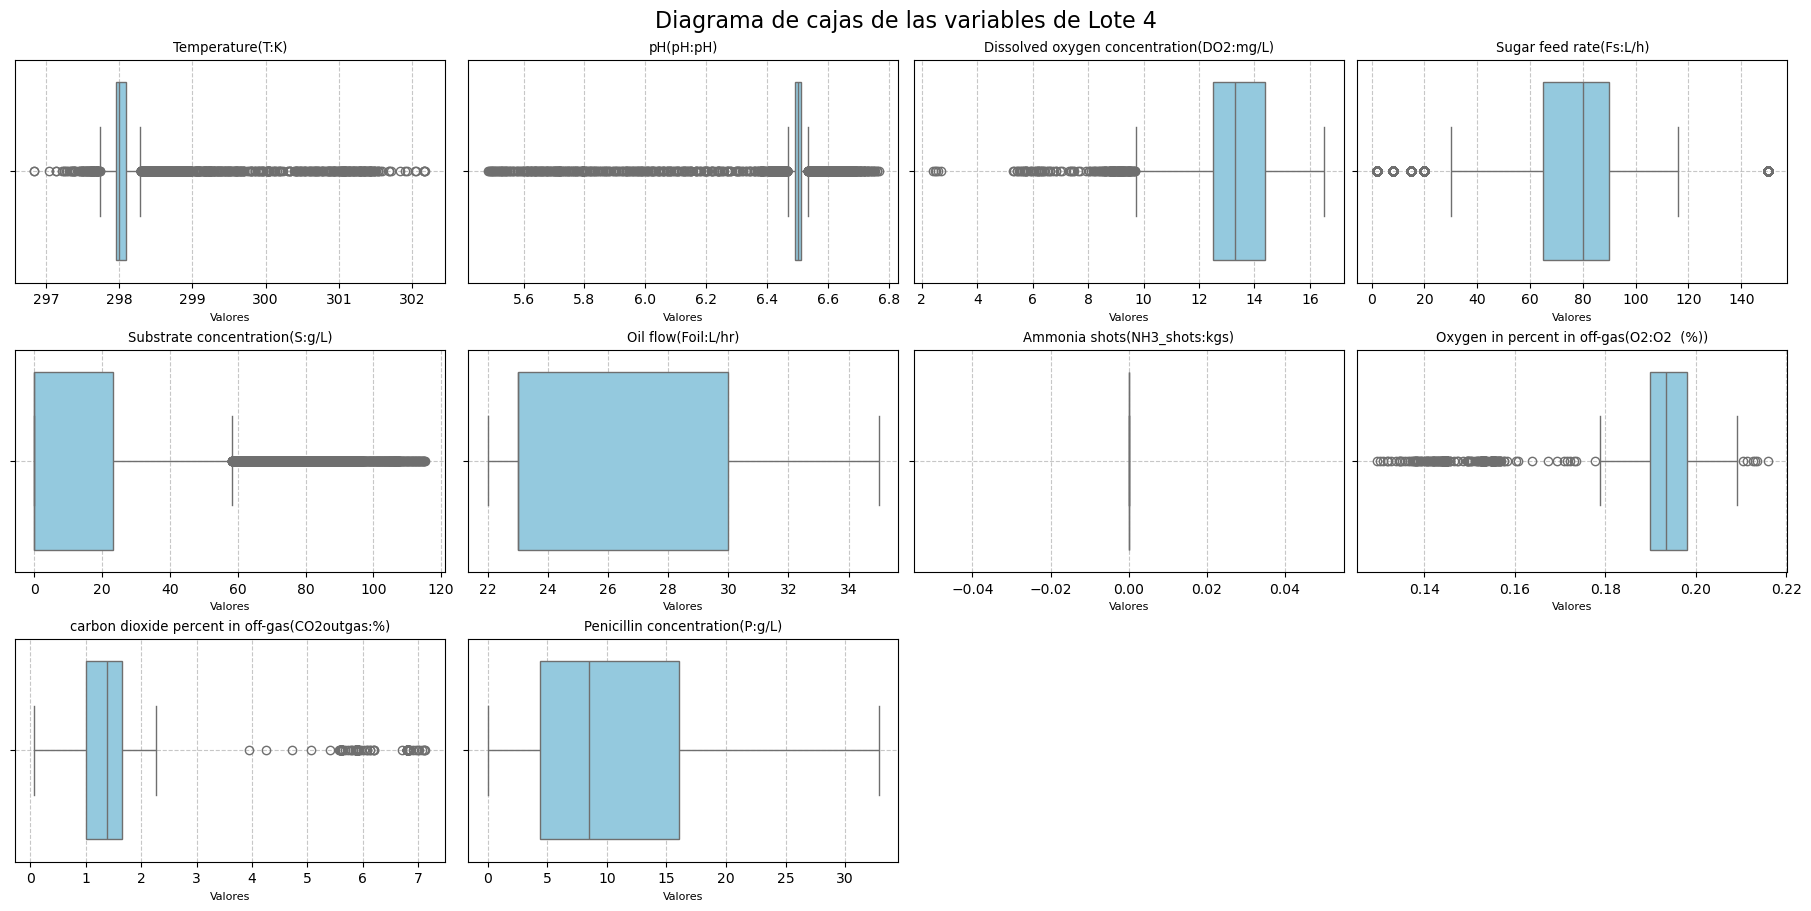

In [152]:
# Parámetros de distribución de subplots
num_columns = 4
num_rows = math.ceil(len(vars_to_plot) / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 3), constrained_layout=True)
axes = axes.flatten()

# Graficar con seaborn
for i, var in enumerate(vars_to_plot):
    if var in df_lote_4.columns:
        sns.boxplot(x=df_lote_4[var], ax=axes[i], orient='h', color='skyblue', linewidth=1)
        axes[i].set_title(var, fontsize=9.5)
        axes[i].set_xlabel('Valores', fontsize=8)
        axes[i].grid(True, linestyle='--', alpha=0.7)
    else:
        axes[i].axis('off')  # Ocultar si no está la columna

# Ocultar subplots vacíos
for j in range(len(vars_to_plot), len(axes)):
    axes[j].axis('off')

plt.suptitle('Diagrama de cajas de las variables de Lote 4', fontsize=16)
plt.show()

**Analisis**

El análisis del diagrama de cajas para las variables del Lote 4 revela patrones relevantes sobre la dispersión y presencia de valores atípicos en las mediciones del proceso de fermentación. La mayoría de las variables, como Temperature (T:K), pH, Dissolved oxygen concentration (DO₂:mg/L), Sugar feed rate (Fs:L/h) y Oxygen in percent in off-gas (O₂:O₂), presentan una distribución bastante concentrada, con cajas estrechas y bigotes cortos, lo que indica una baja dispersión en los datos, aunque también se evidencian algunos outliers, especialmente hacia los extremos superiores, como en el caso de la temperatura y el oxígeno en el gas residual en valores bajos.

La concentración de sustrato (S:g/L) muestra una amplia dispersión, con una caja mucho más extendida y una cola larga hacia valores altos, lo que indica una gran variabilidad en esta variable durante el proceso. Igualmente, el carbon dioxide percent in off-gas (CO₂outgas:%) presenta una distribución sesgada hacia la derecha, con presencia significativa de valores atípicos, lo cual podría reflejar episodios de alta actividad metabólica no frecuentes.

El flujo de aceite (Oil flow) tiene una dispersión moderada, con algunos valores extremos, mientras que la concentración de penicilina (P:g/L) presenta una distribución más simétrica con valores extermos altos, lo que podría indicar picos de producción en ciertos momentos del lote. Finalmente, Ammonia shots permanece constante en cero durante todo el proceso, sin variación alguna.

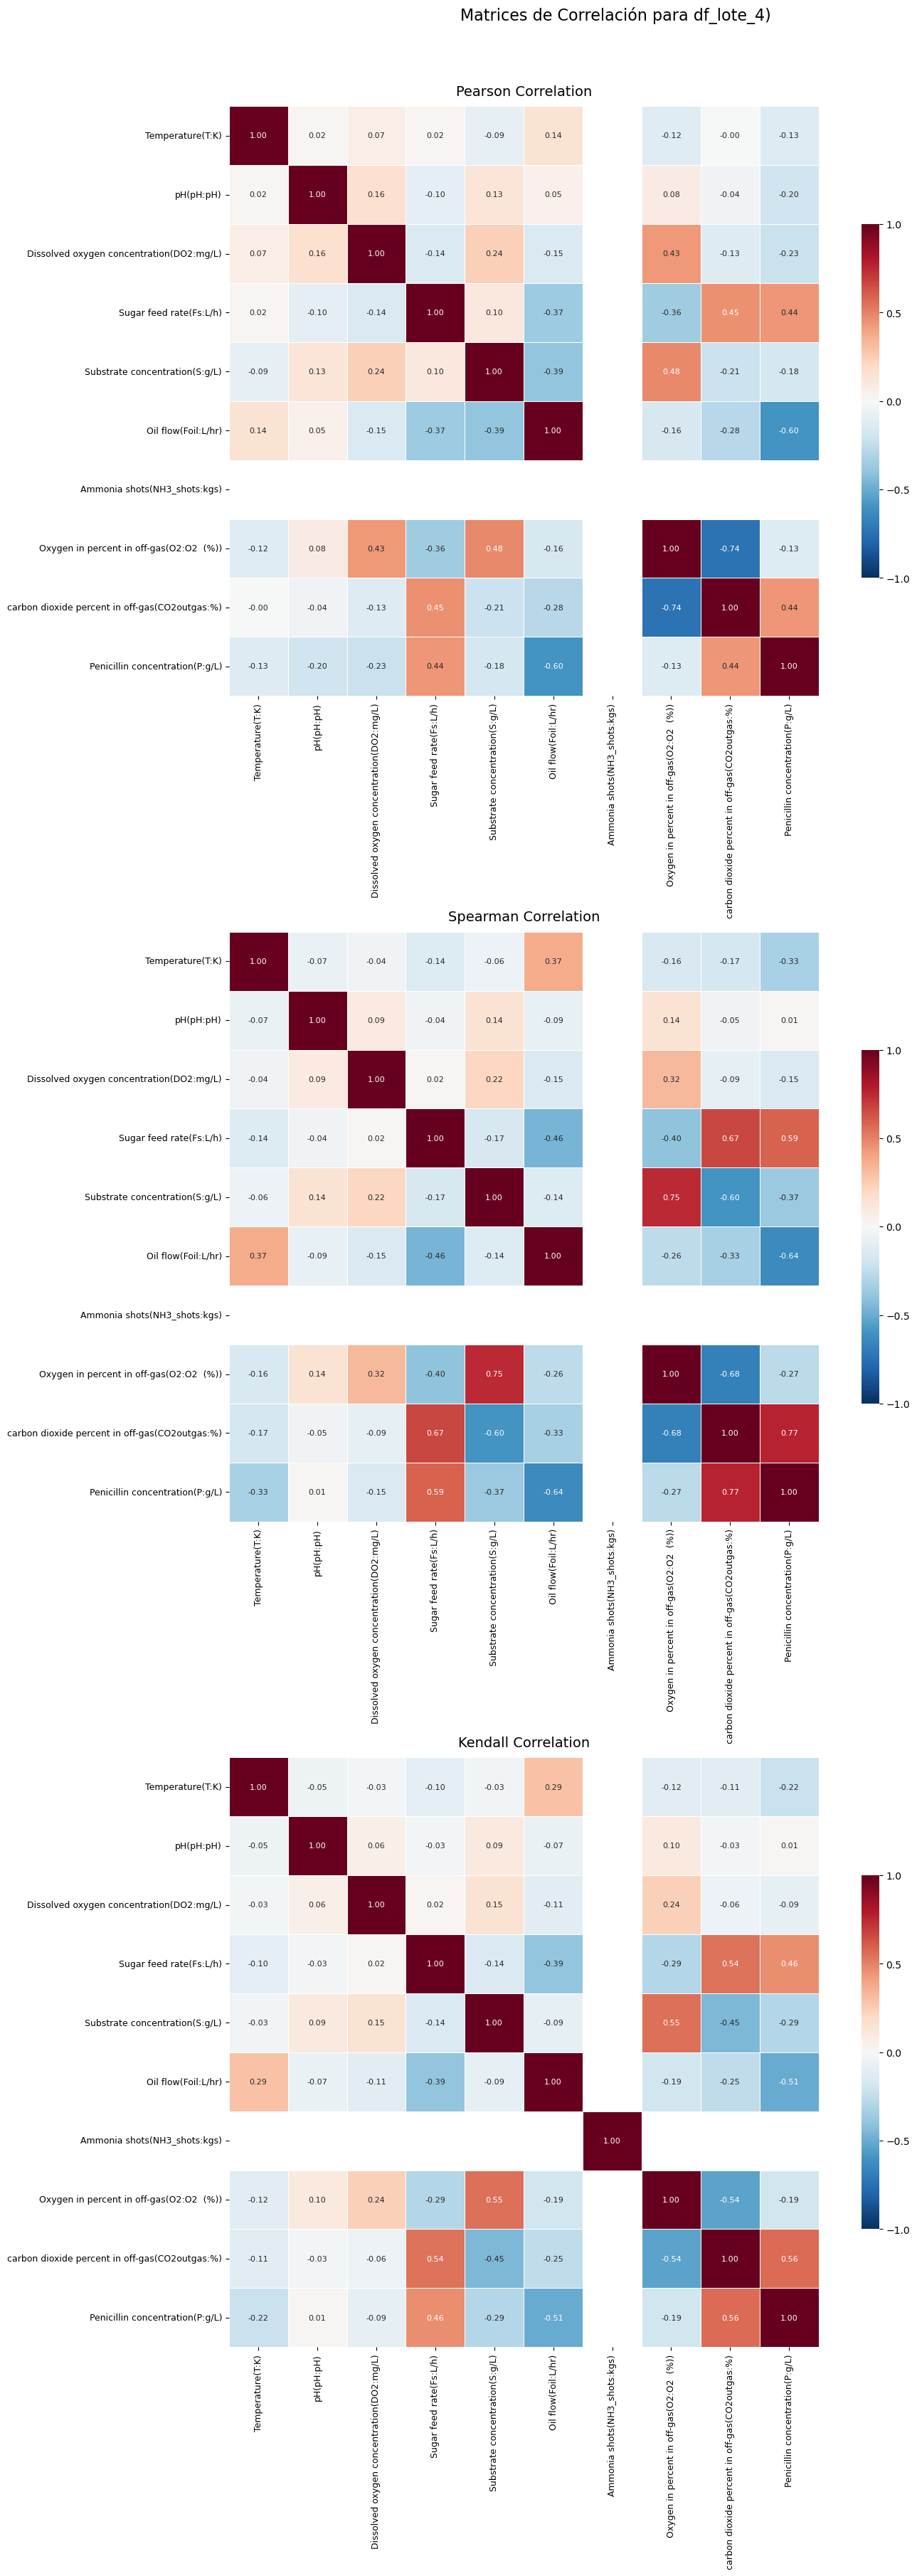

In [127]:
df_sub = df_lote_4[vars_to_plot]

# Cálculo de las matrices de correlación
corr_methods = {
    'Pearson': df_sub.corr(method='pearson'),
    'Spearman': df_sub.corr(method='spearman'),
    'Kendall': df_sub.corr(method='kendall')
}

# Crear figura con 3 filas, 1 columna
fig, axes = plt.subplots(3, 1, figsize=(15, 35))

# Ajustar márgenes y espacios
plt.subplots_adjust(hspace=0.4, left=0.05, right=0.85, top=0.95, bottom=0.05)

for ax, (title, mat) in zip(axes, corr_methods.items()):
    sns.heatmap(
        mat,
        ax=ax,
        cmap='RdBu_r',
        vmin=-1, vmax=1,
        annot=True,
        fmt=".2f",
        annot_kws={'size':8},
        cbar=True,
        cbar_kws={
            'shrink': 0.6,
            'ticks': [-1, -0.5, 0, 0.5, 1]
        },
        square=True,
        linewidths=0.5
    )
    ax.set_title(f'{title} Correlation', fontsize=14, pad=11)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

plt.suptitle('Matrices de Correlación para df_lote_4)', fontsize=16, y=0.99)
plt.show()

**Analisis**

**Correlación de Pearson con la concentración de penicilina:**

El análisis de correlación de Pearson **para el Lote 4** evidencia asociaciones importantes entre las variables del proceso y la concentración de penicilina, La variable con la correlación positiva más destacada es el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas), con un valor de 0.44, lo que sugiere que a mayor actividad metabólica (indicada por una mayor producción de CO₂), hay una tendencia a una mayor síntesis de penicilina.

La tasa de alimentación de azúcar (Sugar feed rate) también muestra una correlación positiva moderada de 0.44, indicando que un mayor suministro de fuente de carbono favorece el crecimiento celular y la producción del metabolito. A continuación, el porcentaje de oxígeno en el gas residual (O₂:O₂), aunque con una relación más débil (-0.13), apunta levemente hacia una correlación negativa, lo que podría indicar que menores niveles de oxígeno residual están asociados con un mayor consumo celular y, por ende, con mayor productividad.

En cuanto al flujo de aceite (Oil flow), se observa una correlación negativa de -0.60, la más fuerte en sentido inverso, lo que refuerza los hallazgos previos en otros lotes: un mayor flujo de aceite parece tener un efecto inhibidor en la producción de penicilina, posiblemente por interferencia física o química con el proceso fermentativo.

Otras variables como la concentración de oxígeno disuelto (DO₂) (-0.23), la concentración de sustrato (S:g/L) (-0.18) y la temperatura (T:K) (-0.13) muestran correlaciones negativas débiles, indicando que si bien podrían tener cierto impacto, su influencia no es linealmente determinante en este lote.

Por último, vemos que el pH presenta una muy baja correlación negativa (-0.20), lo que indica que, dentro del rango observado, su impacto sobre la producción de penicilina es poco significativo. En conjunto, los resultados sugieren que la producción de penicilina en este lote está más estrechamente asociada con factores de metabolismo (como el CO₂), el flujo de nutrientes (azúcar) y el manejo de condiciones como el flujo de aceite, que deben ser cuidadosamente ajustadas para optimizar el proceso.

**Correlación de Spearman con la concentración de penicilina:**

La variable más fuertemente correlacionada positivamente con la concentración de penicilina es el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas), con un coeficiente de 0.77, lo que refuerza la hipótesis de que una mayor actividad metabólica del microorganismo —reflejada en una mayor liberación de CO₂— se asocia con una mayor producción de penicilina.

También se destacan correlaciones positivas moderadas con la tasa de alimentación de azúcar (ρ = 0.59) y con la concentración de sustrato (ρ = 0.37), lo cual indica que una mayor disponibilidad de fuentes de carbono podría estar facilitando la biosíntesis del antibiótico. Estos resultados son coherentes con lo observado en lotes anteriores, reafirmando el papel esencial de estas variables en el proceso fermentativo.

En contraste, el flujo de aceite (Oil flow) mantiene una correlación negativa moderada (ρ = -0.64) con la concentración de penicilina, lo que sugiere que su aumento tiende a estar asociado con una reducción del producto final. De forma similar, la temperatura (ρ = -0.33) y el oxígeno disuelto (DO₂) (ρ = -0.15) presentan correlaciones negativas, aunque menos marcadas, lo que podría indicar que en ciertos rangos estos factores afectan negativamente la productividad del proceso.

Otras variables, como el pH (ρ = 0.01) y el porcentaje de oxígeno en el gas residual (O₂:O₂) (ρ = -0.27), muestran correlaciones débiles o marginales con la concentración de penicilina, lo que indica que su papel podría estar supeditado a interacciones más complejas o a que se mantienen dentro de rangos óptimos relativamente constantes durante el lote.

**Correlación de Kendall con la concentración de penicilina:**

La correlación positiva más fuerte con la producción de penicilina se observa con el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas) (τ = 0.56), lo que respalda la hipótesis de que un mayor metabolismo celular, reflejado en una mayor producción de CO₂, está relacionado con una mayor síntesis del antibiótico. Le sigue la tasa de alimentación de azúcar (Sugar feed rate) con un valor de τ = 0.46, y la concentración de sustrato (S:g/L) con τ = 0.29, lo cual sugiere que la disponibilidad continua de fuente de carbono promueve un entorno favorable para la producción.

Por el lado opuesto, se registra una correlación negativa significativa con el flujo de aceite (Oil flow) (τ = -0.51), reforzando la evidencia de su impacto potencialmente inhibidor sobre el proceso. También se observan correlaciones negativas más leves con variables como la temperatura (τ = -0.22), el oxígeno disuelto (DO₂) (τ = -0.09) y el oxígeno en el gas residual (O₂:O₂) (τ = -0.19), lo que sugiere que condiciones de mayor oxigenación y temperaturas más elevadas podrían tener efectos desfavorables sobre la producción de penicilina en determinados rangos del proceso.

El pH, por su parte, presenta una correlación prácticamente nula (τ = 0.01), lo que indica que esta variable se mantuvo relativamente constante o que su influencia directa sobre la concentración de penicilina fue mínima durante este lote.

**Conclusión general del análisis del Lote 4**

El análisis integral de correlación para el Lote 4 confirma con claridad que la producción de penicilina está influenciada por un conjunto específico de variables relacionadas con la actividad metabólica y las condiciones operativas del proceso. En primer lugar, el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas) se presenta de forma consistente como el indicador más relevante, mostrando una fuerte correlación positiva en todos los métodos de análisis (Pearson: 0.44, Spearman: 0.77, Kendall: 0.56), lo que refuerza su papel como marcador de eficiencia metabólica. Este hallazgo sugiere que una mayor actividad microbiana, reflejada en la evolución de CO₂, se asocia directamente con una mayor biosíntesis del antibiótico.

La tasa de alimentación de azúcar (Sugar feed rate) y la concentración de sustrato (S:g/L) también muestran correlaciones positivas moderadas, lo cual evidencia que un aporte constante de fuentes de carbono resulta crucial para la concentración de la penicilina. Por el contrario, el flujo de aceite (Oil flow) revela una correlación negativa significativa en los tres enfoques (Pearson: -0.60, Spearman: -0.64, Kendall: -0.51), confirmando su efecto potencialmente inhibidor sobre la producción.

Otras variables como la temperatura, el oxígeno disuelto (DO₂) y el oxígeno en el gas residual (O₂:O₂) presentan correlaciones negativas más suaves, lo que sugiere que, si bien su impacto no es tan contundente, podrían limitar la producción si se exceden ciertos umbrales operativos. Por último, podemos ver que el pH se comporta de forma neutral o marginal en todos los métodos, lo que podría indicar que se mantuvo en rangos estables o que su efecto sobre la síntesis del antibiótico es secundario frente a otros factores más determinantes.

#### **Conclusiones de los Análisis por los 4 lotes**

Con base en el análisis de correlación de los cuatro lotes, se pueden identificar patrones consistentes y variables clave que afectan la producción de penicilina en el proceso fermentativo:

Una de las relaciones más sólidas y consistentes observadas en todos los lotes es la correlación negativa entre el flujo de aceite (Oil flow) y la concentración de penicilina. En todos los métodos de correlación aplicados (Pearson, Spearman y Kendall), esta variable mostró coeficientes significativamente negativos, con valores de hasta -0.80 en Pearson para el Lote 3, lo que sugiere un claro efecto inhibidor del aceite sobre la biosíntesis del antibiótico. Este comportamiento recurrente posiciona al flujo de aceite como una variable crítica a controlar en la optimización del proceso.

En contraposición, el porcentaje de dióxido de carbono en el gas residual (CO₂ outgas) se muestra como el indicador más consistente de actividad metabólica favorable, con correlaciones positivas moderadas a fuertes en todos los lotes, alcanzando hasta 0.77 en Spearman para el Lote 4, reforzando la hipótesis de que una mayor producción de CO₂, como subproducto del metabolismo celular activo, está asociada con una mayor síntesis de penicilina.

Asimismo, la tasa de alimentación de azúcar (Sugar feed rate) mostró en todos los lotes correlaciones positivas moderadas, lo cual confirma su importancia como fuente primaria de carbono en el proceso. En especial, su efecto favorable se mantiene tanto en correlaciones lineales como monótonas, subrayando su papel esencial en la productividad del cultivo.

En cuanto a las variables con correlación negativa moderada, se destacan la temperatura, la concentración de oxígeno disuelto (DO₂) y la concentración de sustrato (S:g/L). Aunque su influencia es menos marcada que la del flujo de aceite, estos factores muestran un patrón recurrente de impacto desfavorable cuando superan ciertos rangos operativos, lo que sugiere que deben ser monitoreados y controlados cuidadosamente.

Vemos por último, variables como el pH y el oxígeno en el gas residual (O₂:O₂) se mantuvieron con correlaciones débiles o casi nulas en la mayoría de los lotes, lo cual sugiere que su efecto directo sobre la producción de penicilina es mínimo dentro de los rangos observados.

### Modelamiento

In [ ]:
# Descarga de libreria Tensorflow
! pip install tensorflow

                                              0.0/390.0 MB ? eta -:--:--
                                              0.0/390.0 MB ? eta -:--:--
                                              0.0/390.0 MB 1.3 MB/s eta 0:05:05
                                              0.1/390.0 MB 1.4 MB/s eta 0:04:30
                                              0.3/390.0 MB 2.1 MB/s eta 0:03:03
                                              0.6/390.0 MB 3.5 MB/s eta 0:01:53
                                              0.9/390.0 MB 4.5 MB/s eta 0:01:26
                                              1.3/390.0 MB 5.0 MB/s eta 0:01:18
                                              1.6/390.0 MB 5.4 MB/s eta 0:01:12
                                              2.1/390.0 MB 6.4 MB/s eta 0:01:01
                                              2.2/390.0 MB 5.5 MB/s eta 0:01:11
                                              2.2/390.0 MB 5.4 MB/s eta 0:01:13
                                              2.2/390.

### Imputación de variables con valores nulos por su media

In [27]:
# Imputación de variables con valores nulos por su media
df['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'] = df['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].fillna(df['PAA concentration offline(PAA_offline:PAA (g L^{-1}))'].mean())

df['NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))'] = df['NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))'].fillna(df['NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))'].mean())

df['Offline Penicillin concentration(P_offline:P(g L^{-1}))'] = df['Offline Penicillin concentration(P_offline:P(g L^{-1}))'].fillna(df['Offline Penicillin concentration(P_offline:P(g L^{-1}))'].mean())

df['Offline Biomass concentratio(X_offline:X(g L^{-1}))'] = df['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].fillna(df['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].mean())

df['Viscosity(Viscosity_offline:centPoise)'] = df['Viscosity(Viscosity_offline:centPoise)'].fillna(df['Viscosity(Viscosity_offline:centPoise)'].mean())

In [28]:
# Verificar si existen datos vacíos o faltantes en el DataFrame.
print('Cantidad de datos vacíos o faltantes DataFrame:\n')
df.isna().sum()

Cantidad de datos vacíos o faltantes DataFrame:



Time (h)                                                              0
Aeration rate(Fg:L/h)                                                 0
Agitator RPM(RPM:RPM)                                                 0
Sugar feed rate(Fs:L/h)                                               0
Acid flow rate(Fa:L/h)                                                0
Base flow rate(Fb:L/h)                                                0
Heating/cooling water flow rate(Fc:L/h)                               0
Heating water flow rate(Fh:L/h)                                       0
Water for injection/dilution(Fw:L/h)                                  0
Air head pressure(pressure:bar)                                       0
Dumped broth flow(Fremoved:L/h)                                       0
Substrate concentration(S:g/L)                                        0
Dissolved oxygen concentration(DO2:mg/L)                              0
Penicillin concentration(P:g/L)                                 

In [ ]:
df.dtypes

Time (h)                                                              float64
Aeration rate(Fg:L/h)                                                   int64
Agitator RPM(RPM:RPM)                                                   int64
Sugar feed rate(Fs:L/h)                                                 int64
Acid flow rate(Fa:L/h)                                                float64
Base flow rate(Fb:L/h)                                                float64
Heating/cooling water flow rate(Fc:L/h)                               float64
Heating water flow rate(Fh:L/h)                                       float64
Water for injection/dilution(Fw:L/h)                                    int64
Air head pressure(pressure:bar)                                       float64
Dumped broth flow(Fremoved:L/h)                                         int64
Substrate concentration(S:g/L)                                        float64
Dissolved oxygen concentration(DO2:mg/L)                        

### Modelo de Red Neuronal Recurrente (RNN)

El modelo propuesto corresponde a una red neuronal recurrente (RNN), específicamente que utiliza una capa LSTM (Long Short-Term Memory) para pronosticar la concentración de penicilina en un bioproceso. 

El objetivo principal es predecir la concentración de penicilina (Penicillin concentration (P:g/L)) en función de una serie de variables del proceso medidas a lo largo del tiempo.

A continuación, se describen las etapas para la elaboración del modelo:

*Preprocesamiento de los Datos*

1. Variables de Entrada (X):

Las variables de entrada son todas las columnas del conjunto de datos definido, excluyendo la columna de la concentración de penicilina (Penicillin concentration (P:g/L)) que es la variable objetivo. Las variables de entrada incluyen aspectos como la tasa de aireación (Aeration rate (Fg:L/h)), la velocidad del agitador (Agitator RPM (RPM:RPM)), la concentración de oxígeno disuelto (Dissolved oxygen concentration (DO2:mg/L)), entre muchas otras que reflejan las condiciones del proceso de producción.

2. Normalización de Datos:

Para que el modelo no se vea afectado por las escalas de las variables de entrada (por ejemplo, el tiempo en horas tiene una escala mucho mayor que otras características), se normalizan las variables  mediante el uso de un MinMaxScaler. Este normaliza todas las variables en el rango [0, 1], lo cual es especialmente importante para las redes neuronales, que son sensibles a las magnitudes absolutas de las características.

3. Creación de Secuencias:

Debido a que se trabaja con datos temporales, se transforman los datos en secuencias temporales de longitud time_steps. Esto significa que las observaciones se dividen en fragmentos que contienen información sobre el estado del proceso durante un número determinado de horas anteriores. En este caso, se selecciona un tamaño de ventana de 3 horas. Con esto se busca que, dado el estado del proceso en las últimas 3 horas, el modelo podrá predecir la concentración de penicilina en la siguiente hora.

Este preprocesamiento es crucial para los modelos RNN, ya que les permite aprender de las dependencias temporales y no solo de los valores de las variables en momentos específicos.


*Construcción del Modelo*

1. Capa LSTM:

La capa principal del modelo, es una capa LSTM, que es capaz de capturar dependencias temporales a largo plazo. LSTM es una variante de las redes neuronales recurrentes (RNN) que resuelve el problema del desvanecimiento del gradiente, permitiendo que el modelo mantenga información de eventos pasados por un número mayor de pasos de tiempo.

La capa LSTM del modelo tiene 50 unidades (o "neuronas"), lo que significa que la capa tendrá 50 vectores de estado oculto que ayudan a la red a aprender patrones complejos en las secuencias de datos.

El parámetro return_sequences=False se configura para que la capa LSTM solo pase una salida final, ya que solo se requiere la predicción de la concentración de penicilina al final de la secuencia de entrada (es decir, para la última hora de la ventana de tiempo).

2. Capa de Dropout:

Para evitar el sobreajuste (overfitting), se adiciona una capa de Dropout con una tasa de 0.2. Esto significa que durante el entrenamiento, el modelo "apaga" aleatoriamente el 20% de las neuronas en la capa LSTM, lo que ayuda a que el modelo generalice mejor y no dependa demasiado de patrones específicos de los datos de entrenamiento.

3. Capa densa:

La capa final es una capa densa con una sola neurona, que produce la predicción de la concentración de penicilina para el siguiente paso de tiempo. Dado que se está tratando de predecir una variable continua, esta capa no tiene una función de activación (es decir, no usamos activation='relu' o sigmoid'), lo que permite que el modelo genere cualquier valor real.

*Compilación y Entrenamiento*

El optimizador utilizado es Adam, que es uno de los optimizadores más utilizados en redes neuronales debido a su capacidad para manejar problemas de optimización no lineales de manera eficiente.

La función de pérdida es el error cuadrático medio (Mean Squared Error, MSE), ya que corresponde a un problema de regresión.

Durante el entrenamiento, el modelo ajusta sus parámetros para minimizar la pérdida, es decir, para mejorar la predicción de la concentración de penicilina a lo largo del tiempo, basándose en las secuencias de datos de entrada.

*Evaluación del Modelo*

Una vez entrenado, el modelo se evalúa en un conjunto de prueba, y el rendimiento se mide utilizando el MSE, MAE y R^2. Además, se grafican las predicciones frente a los valores reales para observar visualmente qué tan bien el modelo predice la concentración de penicilina.

*Resultados*

Finalmente, después del entrenamiento, el modelo genera predicciones que se comparan con los valores reales de la concentración de penicilina en el conjunto de prueba. La gráfica resultante evidencia cómo las predicciones del modelo siguen de cerca la variabilidad de los valores reales, reflejando su capacidad para capturar patrones relevantes. Además, al comparar los resultados del modelo con un Baseline, se puede evaluar qué tan significativamente supera el modelo a una predicción basada en el azar, validando así su desempeño.

A continuación, se describe la elección de los hiperámetros usados en el modelo

1. *time_steps = 3 (Ventanas de Tiempo)*

Este parámetro indica cuántas horas anteriores se utilizarán como entrada para predecir la siguiente hora. Se utiliza una ventana de 3 horas como punto de partida, ya que las concentraciones de penicilina pueden depender de los procesos previos durante algunas horas. Generalmente, en series temporales, una ventana más grande puede proporcionar más contexto, pero también aumenta la complejidad del modelo.

2. *units = 50 en la capa LSTM*

Este parámetro define cuántas unidades o "celdas" tendrá la capa LSTM. Cada unidad tiene su propia memoria para aprender patrones temporales. Se define un valor de 50 el cual es común en problemas donde las series temporales tienen una complejidad media. Si el número de unidades es demasiado pequeño, el modelo puede no aprender las relaciones complejas en los datos. Si es demasiado grande, el modelo podría sobreajustarse y entrenar demasiado tiempo sin mejorar en datos no vistos.

3. *Dropout = 0.2*

El Dropout se utiliza para evitar el sobreajuste, donde durante el entrenamiento, aleatoriamente se desactivan algunas neuronas para que el modelo no dependa de ninguna de ellas demasiado. Se define un valor de 0.2, lo que significa que el 20% de las neuronas serán desactivadas aleatoriamente durante cada paso de entrenamiento. Este es un valor común en problemas de aprendizaje profundo.

4. *epochs = 50*

El número de épocas indica cuántas veces todo el conjunto de entrenamiento pasará por el modelo. Se definen 50 épocas, lo cual es un valor que es considerado intermedio. La cantidad de épocas depende del tamaño de los datos y del rendimiento del modelo.

5. *batch_size = 16*

El batch size determina cuántas muestras serán procesadas antes de actualizar los pesos del modelo. Se define un tamaño de 16 el cual se considera común para este tipo de modelos y generalmente funciona bien. Un tamaño pequeño (por ejemplo, 16 o 32) puede hacer que el modelo aprenda más rápido, mientras que un tamaño mayor puede estabilizar el entrenamiento, pero hacerlo más lento.

6. *optimizer = 'adam'*

El optimizador Adam es uno de los más populares para entrenar redes neuronales, especialmente con datos ruidosos o problemas complejos de series temporales, como los que podrían estar presentes en procesos industriales (como la concentración de penicilina).

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        17,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,651 (68.95 KB)

 Trainable params: 17,651 (68.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 29.2189 - val_loss: 1.5255
Epoch 2/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2.5749 - val_loss: 1.4706
Epoch 3/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2.2955 - val_loss: 1.3397
Epoch 4/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 2.0748 - val_loss: 1.2584
Epoch 5/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.8786 - val_loss: 1.2601
Epoch 6/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.7548 - val_loss: 1.1048
Epoch 7/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.6212 - val_loss: 1.3802
Epoch 8/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.6458 - val_loss: 1.3681
Epoch 9/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.4679 - val_loss: 1.5171
Epoch 10/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.4339 - val_loss: 1.1243
Epoch 11/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.4710 - val_loss: 1.2166
Epoch 12/50
5697/5

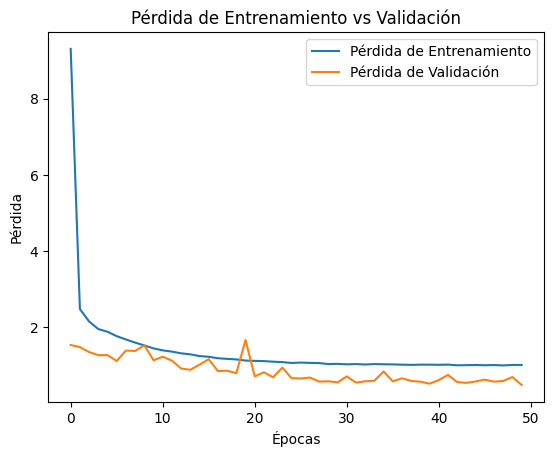

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


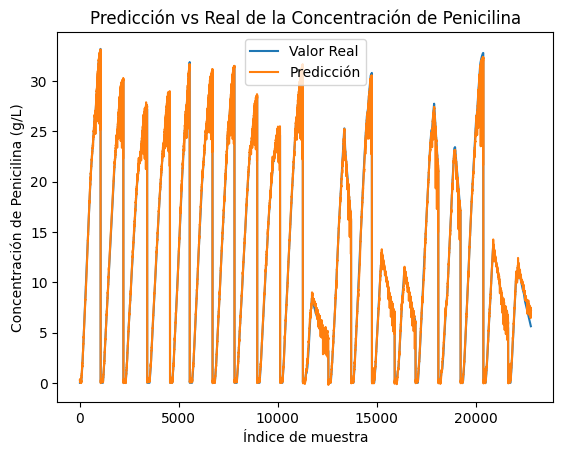

MSE: 0.4761755693623026


In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Seleccionar las características (X) y la variable objetivo (y)
X = df.drop(columns=['Penicillin concentration(P:g/L)'])  # Usamos todas las columnas excepto la variable objetivo
y = df['Penicillin concentration(P:g/L)']  # Variable objetivo (output)



# Normalizar las características, incluida la variable `Time (h)`
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Preprocesar los datos para convertirlos en secuencias de tiempo (ventanas de tiempo)
def create_sequences(X, y, time_steps=1):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

# Usar las últimas 'time_steps' horas como entrada para predecir la siguiente
time_steps = 3  # Por ejemplo, usar 3 horas para predecir la siguiente
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)

# Dividir los datos en entrenamiento y prueba (sin aleatorización, debido a la naturaleza temporal)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# Construir el modelo LSTM
model = Sequential()

# Capa LSTM: 'units' define cuántas unidades de memoria tendrá la capa LSTM
# 'return_sequences=False' ya que estamos solo prediciendo el siguiente valor
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# Capa de Dropout: Para evitar sobreajuste, un valor de 0.2 es común
model.add(Dropout(0.2))

# Capa densa (fully connected): De una sola neurona ya que es una predicción continua
model.add(Dense(units=1))

# Compilación del modelo con el optimizador Adam (uno de los mejores para este tipo de problemas)
model.compile(optimizer='adam', loss='mean_squared_error')

# Resumen del modelo
model.summary()

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Graficar el progreso de la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento vs Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Graficar predicciones vs valor real
plt.plot(y_test, label='Valor Real')
plt.plot(y_pred, label='Predicción')
plt.title('Predicción vs Real de la Concentración de Penicilina')
plt.xlabel('Índice de muestra')
plt.ylabel('Concentración de Penicilina (g/L)')
plt.legend()
plt.show()

# Calcular el Error Cuadrático Medio (MSE) como métrica de evaluación
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')


La gráfica *"Pérdida de Entrenamiento vs Validación"* muestra que la pérdida de entrenamiento disminuye rápidamente en las primeras épocas, estabilizándose alrededor de la época 10, lo que indica que el modelo LSTM aprende a ajustar sus parámetros de manera efectiva. La pérdida de validación es consistentemente más baja y estable que la de entrenamiento, lo que sugiere una buena capacidad de generalización y ausencia de sobreajuste, gracias al uso de técnicas como Dropout. Aunque se observan pequeñas fluctuaciones en la curva de validación, estas son normales y reflejan la variabilidad en los datos de prueba. En general, el modelo demuestra un desempeño equilibrado, indicando que está bien entrenado para predecir la concentración de penicilina de manera confiable.

La gráfica de *"Predicción vs Real de la Concentración de Penicilina"* muestra una buena alineación entre los valores predichos por el modelo de RNN  y los valores reales, lo que indica que el modelo logra capturar de manera precisa las tendencias y variaciones en los datos. La superposición casi completa entre las dos curvas refleja la capacidad del modelo para aprender los patrones temporales de la concentración de penicilina en función de las variables de entrada. Aunque no se observan desviaciones significativas, es importante evaluar métricas adicionales, como el error cuadrático medio (MSE), el error absoluto medio (MAE) y el coeficiente de determinación ($R^2$) para confirmar la precisión y consistencia del modelo en datos no vistos. Esta gráfica valida que el modelo es robusto y confiable para el propósito de predicción en este contexto

A continuación se analizan los resultados de las métricas de evaluación del modelo.

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Realizar predicciones en el conjunto de prueba y_pred = model.predict(X_test) # Calcular el Error Cuadrático Medio (MSE) 
mse = mean_squared_error(y_test, y_pred) # Calcular el Error Absoluto Medio (MAE) 
mae = mean_absolute_error(y_test, y_pred) # Calcular el Coeficiente de Determinación (R²) 
r2 = r2_score(y_test, y_pred) # Imprimir los resultados de las métricas 
print(f'Error Cuadrático Medio (MSE): {mse}') 
print(f'Error Absoluto Medio (MAE): {mae}') 
print(f'Coeficiente de Determinación (R²): {r2}')


Error Cuadrático Medio (MSE): 0.4761755693623026
Error Absoluto Medio (MAE): 0.2614253470958436
Coeficiente de Determinación (R²): 0.9949912801656712


### Análisis de las métricas de evaluación

*Error Cuadrático Medio (MSE): 0.4762*

El MSE mide la magnitud promedio de los errores al cuadrado entre las predicciones y los valores reales. Un valor más bajo indica que el modelo predice con mayor precisión. En este caso, un MSE de 0.4762 sugiere que los errores de predicción son pequeños, lo que indica un buen desempeño general. Sin embargo, debido a que el error está en unidades cuadradas, es menos intuitivo comparado con el MAE.

*Error Absoluto Medio (MAE): 0.2614*

El MAE mide el error promedio en las mismas unidades que la variable objetivo (en este caso, gramos por litro de penicilina). Un valor de 0.2614 significa que, en promedio, el modelo se desvía aproximadamente 0.26 g/L de la concentración real de penicilina. Este es un nivel de error relativamente bajo, mostrando que el modelo tiene un buen nivel de precisión en las predicciones.

*Coeficiente de Determinación (R²): 0.9950*

El R² indica qué tan bien las predicciones del modelo explican la variabilidad de la concentración real de penicilina. Un valor de 0.9950 sugiere que el 99.5% de la variación en la concentración de penicilina está siendo explicada por el modelo. Esto es un excelente ajuste, lo que demuestra que el modelo captura de manera efectiva las dinámicas del proceso.

Conclusión

Los resultados reflejan un modelo muy bien ajustado, que realiza predicciones precisas sobre la concentración de penicilina en función de las variables clave del proceso de fermentación. Sin embargo, es importante evaluar el modelo con datos nuevos o no vistos para confirmar que este nivel de precisión se mantenga y que el modelo no esté sobreajustado a los datos de entrenamiento.


### Cáculo del Baseline para comparar con resultados del modelo

In [38]:
# Crear un modelo base (Baseline) que use los valores anteriores como predicción 
y_baseline_pred = y_test[:-1] # Usamos todos los valores excepto el último 
y_baseline_real = y_test[1:] # Compararemos con todos los valores excepto el primero # Calcular métricas del modelo base 
baseline_mse = mean_squared_error(y_baseline_real, y_baseline_pred) 
baseline_mae = mean_absolute_error(y_baseline_real, y_baseline_pred) 
baseline_r2 = r2_score(y_baseline_real, y_baseline_pred) # Imprimir métricas del modelo base 
print(f'Modelo Base - Error Cuadrático Medio (MSE): {baseline_mse}') 
print(f'Modelo Base - Error Absoluto Medio (MAE): {baseline_mae}') 
print(f'Modelo Base - Coeficiente de Determinación (R²): {baseline_r2}')

Modelo Base - Error Cuadrático Medio (MSE): 0.5302261250635327
Modelo Base - Error Absoluto Medio (MAE): 0.04336186371236724
Modelo Base - Coeficiente de Determinación (R²): 0.9944225475098258


### Comparativo de los resultados de las métricas de evaluación del modelo RNN y el Baseline

El modelo de RNN muestra un mejor desempeño general en comparación con el modelo base, al reducir el Error Cuadrático Medio (MSE) de 0.5302 a 0.4762, lo que representa una mejora del 10.17%, y al incrementar ligeramente el Coeficiente de Determinación (R²) de 0.9944 a 0.9950, indicando que captura más variabilidad en los datos. Sin embargo, el modelo base tiene un Error Absoluto Medio (MAE) más bajo (0.0434 frente a 0.2614), lo que sugiere que, aunque el modelo de RNN predice mejor las tendencias generales y tiene menores errores promedio en términos cuadráticos, el modelo base es más preciso en minimizar los errores absolutos. Esto indica que el modelo de RNN podría beneficiarse de ajustes adicionales para mejorar su capacidad de manejar errores puntuales más grandes.

### **Conclusiones Generales y Trabajos futuros**

**Conclusiones Generales**

- *Manejo de valores nulos y atípicos:*

La presencia de valores faltantes y outliers en variables críticas como NH₃ concentration offline (NH₃_offline: NH₃ (g L⁻¹)) y Dissolved oxygen concentration (DO2:mg/L) representa una limitación en el desempeño del modelo. Aplicar técnicas avanzadas de imputación, como KNN o regresiones multivariadas, mejorará la calidad de los datos y, en consecuencia, podría mejorar el ajuste del modelo.

- *Transformaciones para mejorar la relación predictiva:*

Variables como Base flow rate (Fb:L/h) y Generated heat (Q:kJ) presentan relaciones no lineales con la variable objetivo (Penicillin concentration (P:g/L)). Transformaciones como logaritmos, normalizaciones o expansiones polinómicas pueden mejorar la captación de patrones significativos, optimizando el aprendizaje del modelo.

- *Evaluación robusta mediante múltiples protocolos:*

Hasta ahora, el modelo se evaluó solo en conjuntos de entrenamiento y validación. La implementación de protocolos como validación cruzada y evaluación en un conjunto de prueba separado permitirá estimar de manera más confiable la capacidad de generalización del modelo.

- *Reducción de dimensionalidad para mejorar la eficiencia:*

Con 36 variables predictoras, la dimensionalidad del conjunto de datos es alta. Un método como PCA podría ayudar a reducir el ruido y priorizar las variables más relevantes, disminuyendo el riesgo de sobreajuste y mejorando la eficiencia computacional.

- *Optimización de hiperparámetros del modelo:*

La aplicación de protocolos de evaluación permitirá identificar combinaciones óptimas de hiperparámetros, maximizando el desempeño predictivo.

- *Comparación con otros modelos:*

Aunque el modelo RNN muestra un buen desempeño, es necesario comparar sus resultados con modelos estadísticos clásicos o de Aprendizaje Automático desarrollados previamente y arquitecturas avanzadas de Redes Neuronales, para contextualizar su eficacia en el problema.